# Fooling around with data in a saturday afternoon! :D

In [354]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [355]:
import pandas as pd
import numpy as np
from scipy import stats
import re

# Corruption
## Source: http://www.transparency.org/cpi2014/results#myAnchor1

In [311]:
raw_corruption = pd.read_html("""<table style="display: table;" id="flex1" cellpadding="0" cellspacing="0" border="0"><tbody><tr id="row1"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">1</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Denmark</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">92</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">91</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">90</div></td></tr><tr id="row2" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">2</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">New Zealand</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">91</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">91</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">90</div></td></tr><tr id="row3"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">3</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Finland</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">89</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">89</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">90</div></td></tr><tr id="row4" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">4</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Sweden</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">87</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">89</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">88</div></td></tr><tr id="row5"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">5</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Norway</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">86</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">86</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">85</div></td></tr><tr id="row6" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">5</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Switzerland</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">86</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">85</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">86</div></td></tr><tr id="row7"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">7</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Singapore</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">84</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">86</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">87</div></td></tr><tr id="row8" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">8</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Netherlands</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">83</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">83</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">84</div></td></tr><tr id="row9"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">9</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Luxembourg</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">82</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">80</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">80</div></td></tr><tr id="row10" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">10</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Canada</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">81</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">81</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">84</div></td></tr><tr id="row11"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">11</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Australia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">80</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">81</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">85</div></td></tr><tr id="row12" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">12</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Germany</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">79</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">78</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">79</div></td></tr><tr id="row13"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">12</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Iceland</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">79</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">78</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">82</div></td></tr><tr id="row14" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">14</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">United Kingdom</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">78</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">76</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">74</div></td></tr><tr id="row15"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">15</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Belgium</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">76</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">75</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">75</div></td></tr><tr id="row16" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">15</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Japan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">76</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">74</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">74</div></td></tr><tr id="row17"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">17</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Barbados</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">74</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">75</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">76</div></td></tr><tr id="row18" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">17</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Hong Kong</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">74</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">75</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">77</div></td></tr><tr id="row19"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">17</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Ireland</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">74</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">72</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">69</div></td></tr><tr id="row20" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">17</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">United States</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">74</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">73</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">73</div></td></tr><tr id="row21"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">21</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Chile</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">73</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">71</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">72</div></td></tr><tr id="row22" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">21</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Uruguay</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">73</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">73</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">72</div></td></tr><tr id="row23"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">23</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Austria</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">72</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">69</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">69</div></td></tr><tr id="row24" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">24</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Bahamas</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">71</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">71</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">71</div></td></tr><tr id="row25"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">25</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">United Arab Emirates</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">70</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">69</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">68</div></td></tr><tr id="row26" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">26</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Estonia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">69</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">68</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">64</div></td></tr><tr id="row27"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">26</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">France</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">69</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">71</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">71</div></td></tr><tr id="row28" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">26</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Qatar</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">69</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">68</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">68</div></td></tr><tr id="row29"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">29</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Saint Vincent and the Grenadines</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">67</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">62</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">62</div></td></tr><tr id="row30" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">30</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Bhutan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">65</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">63</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">63</div></td></tr><tr id="row31"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">31</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Botswana</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">63</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">64</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">65</div></td></tr><tr id="row32" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">31</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Cyprus</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">63</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">63</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">66</div></td></tr><tr id="row33"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">31</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Portugal</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">63</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">62</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">63</div></td></tr><tr id="row34" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">31</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Puerto Rico</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">63</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">62</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">63</div></td></tr><tr id="row35"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">35</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Poland</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">61</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">60</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">58</div></td></tr><tr id="row36" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">35</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Taiwan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">61</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">61</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">61</div></td></tr><tr id="row37"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">37</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Israel</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">60</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">61</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">60</div></td></tr><tr id="row38" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">37</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Spain</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">60</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">59</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">65</div></td></tr><tr id="row39"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">39</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Dominica</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">58</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">58</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">58</div></td></tr><tr id="row40" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">39</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Lithuania</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">58</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">57</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">54</div></td></tr><tr id="row41"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">39</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Slovenia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">58</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">57</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">61</div></td></tr><tr id="row42" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">42</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Cape Verde</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">57</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">58</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">60</div></td></tr><tr id="row43"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">43</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Korea (South)</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">55</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">55</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">56</div></td></tr><tr id="row44" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">43</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Latvia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">55</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">53</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td></tr><tr id="row45"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">43</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Malta</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">55</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">56</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">57</div></td></tr><tr id="row46" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">43</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Seychelles</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">55</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">54</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">52</div></td></tr><tr id="row47"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">47</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Costa Rica</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">54</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">53</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">54</div></td></tr><tr id="row48" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">47</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Hungary</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">54</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">54</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">55</div></td></tr><tr id="row49"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">47</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Mauritius</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">54</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">52</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">57</div></td></tr><tr id="row50" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">50</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Georgia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">52</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">52</div></td></tr><tr id="row51"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">50</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Malaysia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">52</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">50</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td></tr><tr id="row52" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">50</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Samoa</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">52</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">#N/A</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">#N/A</div></td></tr><tr id="row53"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">53</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Czech Republic</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">51</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">48</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td></tr><tr id="row54" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">54</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Slovakia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">50</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">47</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">46</div></td></tr><tr id="row55"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">55</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Bahrain</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">48</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">51</div></td></tr><tr id="row56" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">55</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Jordan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">45</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">48</div></td></tr><tr id="row57"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">55</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Lesotho</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">45</div></td></tr><tr id="row58" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">55</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Namibia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">48</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">48</div></td></tr><tr id="row59"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">55</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Rwanda</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">53</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">53</div></td></tr><tr id="row60" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">55</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Saudi Arabia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">46</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">44</div></td></tr><tr id="row61"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">61</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Croatia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">48</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">48</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">46</div></td></tr><tr id="row62" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">61</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Ghana</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">48</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">46</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">45</div></td></tr><tr id="row63"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">63</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Cuba</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">46</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">46</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">48</div></td></tr><tr id="row64" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">64</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Oman</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">45</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">47</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">47</div></td></tr><tr id="row65"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">64</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">The FYR of Macedonia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">45</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">44</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td></tr><tr id="row66" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">64</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Turkey</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">45</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">50</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">49</div></td></tr><tr id="row67"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">67</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Kuwait</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">44</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">44</div></td></tr><tr id="row68" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">67</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">South Africa</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">44</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">42</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td></tr><tr id="row69"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">69</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Brazil</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">42</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td></tr><tr id="row70" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">69</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Bulgaria</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">41</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">41</div></td></tr><tr id="row71"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">69</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Greece</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">40</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td></tr><tr id="row72" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">69</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Italy</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">42</div></td></tr><tr id="row73"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">69</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Romania</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">44</div></td></tr><tr id="row74" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">69</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Senegal</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">41</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td></tr><tr id="row75"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">69</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Swaziland</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">43</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">39</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td></tr><tr id="row76" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">76</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Montenegro</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">42</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">44</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">41</div></td></tr><tr id="row77"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">76</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Sao Tome and Principe</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">42</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">42</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">42</div></td></tr><tr id="row78" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">78</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Serbia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">41</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">42</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">39</div></td></tr><tr id="row79"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">79</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Tunisia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">40</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">41</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">41</div></td></tr><tr id="row80" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">80</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Benin</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">39</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td></tr><tr id="row81"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">80</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Bosnia and Herzegovina</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">39</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">42</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">42</div></td></tr><tr id="row82" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">80</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">El Salvador</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">39</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td></tr><tr id="row83"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">80</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Mongolia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">39</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td></tr><tr id="row84" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">80</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Morocco</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">39</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td></tr><tr id="row85"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">85</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Burkina Faso</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td></tr><tr id="row86" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">85</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">India</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td></tr><tr id="row87"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">85</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Jamaica</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td></tr><tr id="row88" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">85</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Peru</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td></tr><tr id="row89"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">85</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Philippines</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td></tr><tr id="row90" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">85</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Sri Lanka</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">40</div></td></tr><tr id="row91"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">85</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Thailand</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">35</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td></tr><tr id="row92" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">85</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Trinidad and Tobago</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">39</div></td></tr><tr id="row93"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">85</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Zambia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td></tr><tr id="row94" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">94</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Armenia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td></tr><tr id="row95"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">94</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Colombia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td></tr><tr id="row96" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">94</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Egypt</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">32</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">32</div></td></tr><tr id="row97"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">94</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Gabon</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">35</div></td></tr><tr id="row98" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">94</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Liberia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">41</div></td></tr><tr id="row99"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">94</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Panama</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">35</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">38</div></td></tr><tr id="row100" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">100</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Algeria</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td></tr><tr id="row101"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">100</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">China</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">40</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">39</div></td></tr><tr id="row102" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">100</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Suriname</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td></tr><tr id="row103"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">103</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Bolivia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">35</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td></tr><tr id="row104" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">103</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Mexico</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">35</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td></tr><tr id="row105"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">103</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Moldova</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">35</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">35</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td></tr><tr id="row106" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">103</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Niger</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">35</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td></tr><tr id="row107"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">107</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Argentina</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">35</div></td></tr><tr id="row108" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">107</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Djibouti</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">36</div></td></tr><tr id="row109"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">107</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Indonesia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">32</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">32</div></td></tr><tr id="row110" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">110</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Albania</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td></tr><tr id="row111"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">110</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Ecuador</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">35</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">32</div></td></tr><tr id="row112" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">110</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Ethiopia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td></tr><tr id="row113"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">110</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Kosovo</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td></tr><tr id="row114" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">110</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Malawi</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">37</div></td></tr><tr id="row115"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">115</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Côte d´Ivoire</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">32</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td></tr><tr id="row116" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">115</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Dominican Republic</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">32</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">32</div></td></tr><tr id="row117"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">115</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Guatemala</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">32</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td></tr><tr id="row118" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">115</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Mali</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">32</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td></tr><tr id="row119"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">119</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Belarus</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td></tr><tr id="row120" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">119</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Mozambique</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">30</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td></tr><tr id="row121"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">119</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Sierra Leone</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">30</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td></tr><tr id="row122" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">119</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Tanzania</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">35</div></td></tr><tr id="row123"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">119</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Vietnam</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td></tr><tr id="row124" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">124</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Guyana</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">30</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td></tr><tr id="row125"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">124</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Mauritania</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">30</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">30</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td></tr><tr id="row126" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">126</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Azerbaijan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td></tr><tr id="row127"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">126</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Gambia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">34</div></td></tr><tr id="row128" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">126</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Honduras</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td></tr><tr id="row129"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">126</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Kazakhstan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td></tr><tr id="row130" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">126</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Nepal</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">31</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td></tr><tr id="row131"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">126</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Pakistan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td></tr><tr id="row132" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">126</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Togo</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">30</div></td></tr><tr id="row133"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">133</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Madagascar</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">32</div></td></tr><tr id="row134" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">133</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Nicaragua</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td></tr><tr id="row135"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">133</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Timor-Leste</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">30</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">33</div></td></tr><tr id="row136" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">136</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Cameroon</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td></tr><tr id="row137"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">136</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Iran</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td></tr><tr id="row138" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">136</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Kyrgyzstan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">24</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">24</div></td></tr><tr id="row139"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">136</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Lebanon</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">30</div></td></tr><tr id="row140" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">136</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Nigeria</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td></tr><tr id="row141"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">136</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Russia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td></tr><tr id="row142" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">142</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Comoros</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">28</div></td></tr><tr id="row143"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">142</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Uganda</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">29</div></td></tr><tr id="row144" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">142</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Ukraine</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td></tr><tr id="row145"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">145</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Bangladesh</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td></tr><tr id="row146" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">145</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Guinea</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">24</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">24</div></td></tr><tr id="row147"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">145</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Kenya</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">27</div></td></tr><tr id="row148" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">145</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Laos</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">21</div></td></tr><tr id="row149"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">145</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Papua New Guinea</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td></tr><tr id="row150" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">150</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Central African Republic</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">24</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td></tr><tr id="row151"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">150</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Paraguay</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">24</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">24</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td></tr><tr id="row152" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">152</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Congo, Republic of</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">23</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">22</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td></tr><tr id="row153"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">152</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Tajikistan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">23</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">22</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">22</div></td></tr><tr id="row154" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">154</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Chad</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">22</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td></tr><tr id="row155"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">154</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Congo, Democratic Republic of</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">22</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">22</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">21</div></td></tr><tr id="row156" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">156</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Cambodia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">21</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">20</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">22</div></td></tr><tr id="row157"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">156</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Myanmar</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">21</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">21</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">15</div></td></tr><tr id="row158" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">156</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Zimbabwe</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">21</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">21</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">20</div></td></tr><tr id="row159"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">159</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Burundi</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">20</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">21</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td></tr><tr id="row160" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">159</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Syria</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">20</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">17</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">26</div></td></tr><tr id="row161"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">161</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Angola</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">23</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">22</div></td></tr><tr id="row162" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">161</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Guinea-Bissau</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td></tr><tr id="row163"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">161</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Haiti</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td></tr><tr id="row164" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">161</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Venezuela</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">20</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td></tr><tr id="row165"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">161</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Yemen</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">19</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">18</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">23</div></td></tr><tr id="row166" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">166</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Eritrea</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">18</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">20</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">25</div></td></tr><tr id="row167"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">166</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Libya</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">18</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">15</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">21</div></td></tr><tr id="row168" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">166</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Uzbekistan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">18</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">17</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">17</div></td></tr><tr id="row169"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">169</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Turkmenistan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">17</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">17</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">17</div></td></tr><tr id="row170" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">170</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Iraq</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">16</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">16</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">18</div></td></tr><tr id="row171"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">171</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">South Sudan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">15</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">14</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">#N/A</div></td></tr><tr id="row172" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">172</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Afghanistan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">12</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">8</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">8</div></td></tr><tr id="row173"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">173</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Sudan</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">11</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">11</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">13</div></td></tr><tr id="row174" class="erow"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">174</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Korea (North)</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">8</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">8</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">8</div></td></tr><tr id="row175"><td class="sorted" abbr="Rank" align="left"><div style="text-align: left; width: 75px;">174</div></td><td abbr="Country" align="left"><div style="text-align: left; width: 312px;">Somalia</div></td><td abbr="2014 SCORE" align="left"><div style="text-align: left; width: 160px;">8</div></td><td abbr="2013 SCORE" align="left"><div style="text-align: left; width: 160px;">8</div></td><td abbr="2012 SCORE" align="left"><div style="text-align: left; width: 160px;">8</div></td></tr></tbody></table>""")

In [312]:
raw_corruption[0].head()

,0,1,2,3,4
0,1,Denmark,92,91,90
1,2,New Zealand,91,91,90
2,3,Finland,89,89,90
3,4,Sweden,87,89,88
4,5,Norway,86,86,85


In [314]:
corruption = raw_corruption[0][[0,1,2]]
corruption.rename(columns={0: 'Corruption Rank', 1:'Country',2: 'Corruption 2014'}, inplace=True)

print("Mean %s" % corruption['Corruption 2014'].mean())
print("Brasil %s" % corruption[corruption['Country'] == 'Brazil'])

Mean 43.1885714286
Brasil     Corruption Rank Country  Corruption 2014
68               69  Brazil               43


In [315]:
raw_population = pd.read_html("""<table class="wikitable sortable jquery-tablesorter" style="text-align:right">
<thead><tr>
<th title="Sort ascending" role="columnheader button" tabindex="0" class="headerSort" data-sort-type="number">Rank</th>
<th title="Sort ascending" role="columnheader button" tabindex="0" class="headerSort">Country (or dependent territory)</th>
<th title="Sort ascending" role="columnheader button" tabindex="0" class="headerSort">Population</th>
<th title="Sort ascending" role="columnheader button" tabindex="0" class="headerSort">Date</th>
<th title="Sort ascending" role="columnheader button" tabindex="0" class="headerSort">% of world<br>
population</th>
<th title="Sort ascending" role="columnheader button" tabindex="0" class="headerSort">Source</th>
</tr></thead><tbody>
<tr>
<td>1</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/China" title="China">China</a><sup id="cite_ref-8" class="reference"><a href="#cite_note-8"><span>[</span>Note 2<span>]</span></a></sup></td>
<td>1,373,420,000</td>
<td>November 27, 2015</td>
<td>18.9%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://data.stats.gov.cn/">Official population clock</a></td>
</tr>
<tr>
<td>2</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/23px-Flag_of_India.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/35px-Flag_of_India.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/45px-Flag_of_India.svg.png 2x" data-file-width="1350" data-file-height="900" height="15" width="23"></span><a href="/wiki/India" title="India">India</a></td>
<td>1,280,670,000</td>
<td>November 27, 2015</td>
<td>17.6%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.indiastat.com/popclockflash.aspx">Official population clock</a></td>
</tr>
<tr>
<td>3</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" data-file-width="1235" data-file-height="650" height="12" width="23"></span><a href="/wiki/United_States" title="United States">United States</a><sup id="cite_ref-9" class="reference"><a href="#cite_note-9"><span>[</span>Note 3<span>]</span></a></sup></td>
<td>322,317,000</td>
<td>November 27, 2015</td>
<td>4.42%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.census.gov/popclock/">Official population clock</a></td>
</tr>
<tr>
<td>4</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/23px-Flag_of_Indonesia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/45px-Flag_of_Indonesia.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Indonesia" title="Indonesia">Indonesia</a></td>
<td>255,461,700</td>
<td>July 1, 2015</td>
<td>3.51%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.bps.go.id/linkTabelStatis/view/id/1274">Official projection</a></td>
</tr>
<tr>
<td>5</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/22px-Flag_of_Brazil.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/33px-Flag_of_Brazil.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/43px-Flag_of_Brazil.svg.png 2x" data-file-width="720" data-file-height="504" height="15" width="22"></span><a href="/wiki/Brazil" title="Brazil">Brazil</a></td>
<td>205,252,000</td>
<td>November 27, 2015</td>
<td>2.82%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ibge.gov.br/apps/populacao/projecao/index.html">Official population clock</a></td>
</tr>
<tr>
<td>6</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/32/Flag_of_Pakistan.svg/23px-Flag_of_Pakistan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/32/Flag_of_Pakistan.svg/35px-Flag_of_Pakistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/32/Flag_of_Pakistan.svg/45px-Flag_of_Pakistan.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Pakistan" title="Pakistan">Pakistan</a></td>
<td>192,051,912</td>
<td>November 27, 2015</td>
<td>2.64%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.pwd.punjab.gov.pk">Official population clock</a></td>
</tr>
<tr>
<td>7</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/79/Flag_of_Nigeria.svg/23px-Flag_of_Nigeria.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/79/Flag_of_Nigeria.svg/35px-Flag_of_Nigeria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/79/Flag_of_Nigeria.svg/46px-Flag_of_Nigeria.svg.png 2x" data-file-width="2400" data-file-height="1200" height="12" width="23"></span><a href="/wiki/Nigeria" title="Nigeria">Nigeria</a></td>
<td>182,202,000</td>
<td>July 1, 2015</td>
<td>2.5%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>8</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Flag_of_Bangladesh.svg/23px-Flag_of_Bangladesh.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Flag_of_Bangladesh.svg/35px-Flag_of_Bangladesh.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Flag_of_Bangladesh.svg/46px-Flag_of_Bangladesh.svg.png 2x" data-file-width="500" data-file-height="300" height="14" width="23"></span><a href="/wiki/Bangladesh" title="Bangladesh">Bangladesh</a></td>
<td>159,438,000</td>
<td>November 27, 2015</td>
<td>2.19%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.bbs.gov.bd/Home.aspx">Official population clock</a></td>
</tr>
<tr>
<td>9</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/23px-Flag_of_Russia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/35px-Flag_of_Russia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/45px-Flag_of_Russia.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Russia" title="Russia">Russia</a><sup id="cite_ref-10" class="reference"><a href="#cite_note-10"><span>[</span>Note 4<span>]</span></a></sup></td>
<td>146,449,330</td>
<td>November 27, 2015</td>
<td>2.01%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://demoscope.ru/weekly/app/popclock/popclock.php">Official population clock</a></td>
</tr>
<tr>
<td>10</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/23px-Flag_of_Japan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/35px-Flag_of_Japan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/45px-Flag_of_Japan.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Japan" title="Japan">Japan</a></td>
<td>126,890,000</td>
<td>November 1, 2015</td>
<td>1.74%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat.go.jp/english/data/jinsui/tsuki/index.htm">Monthly official estimate</a></td>
</tr>
<tr>
<td>11</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/23px-Flag_of_Mexico.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/35px-Flag_of_Mexico.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/46px-Flag_of_Mexico.svg.png 2x" data-file-width="840" data-file-height="480" height="13" width="23"></span><a href="/wiki/Mexico" title="Mexico">Mexico</a></td>
<td>121,005,000</td>
<td>July 1, 2015</td>
<td>1.66%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.conapo.gob.mx/work/models/CONAPO/Proyecciones/Datos/Estimaciones_y_Proyecciones/2010_2030/RepublicaMexicana_pry.xlsx">Official projection</a></td>
</tr>
<tr>
<td>12</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_the_Philippines.svg/23px-Flag_of_the_Philippines.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_the_Philippines.svg/35px-Flag_of_the_Philippines.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_the_Philippines.svg/46px-Flag_of_the_Philippines.svg.png 2x" data-file-width="900" data-file-height="450" height="12" width="23"></span><a href="/wiki/Philippines" title="Philippines">Philippines</a></td>
<td>102,414,900</td>
<td>November 27, 2015</td>
<td>1.41%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://rpo3.popcom.gov.ph/">Official population clock</a></td>
</tr>
<tr>
<td>13</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Vietnam.svg/23px-Flag_of_Vietnam.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Vietnam.svg/35px-Flag_of_Vietnam.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Vietnam.svg/45px-Flag_of_Vietnam.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Vietnam" title="Vietnam">Vietnam</a></td>
<td>90,730,000</td>
<td>July 1, 2014</td>
<td>1.25%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.gso.gov.vn/default_en.aspx?tabid=622&amp;ItemID=14195">Official estimate</a></td>
</tr>
<tr>
<td>14</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/71/Flag_of_Ethiopia.svg/23px-Flag_of_Ethiopia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/71/Flag_of_Ethiopia.svg/35px-Flag_of_Ethiopia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/71/Flag_of_Ethiopia.svg/46px-Flag_of_Ethiopia.svg.png 2x" data-file-width="720" data-file-height="360" height="12" width="23"></span><a href="/wiki/Ethiopia" title="Ethiopia">Ethiopia</a></td>
<td>90,076,012</td>
<td>July 1, 2015</td>
<td>1.24%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.csa.gov.et/images/general/news/pop_pro_wer_2014-2017">Official Projection</a></td>
</tr>
<tr>
<td>15</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Egypt.svg/23px-Flag_of_Egypt.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Egypt.svg/35px-Flag_of_Egypt.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Egypt.svg/45px-Flag_of_Egypt.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Egypt" title="Egypt">Egypt</a></td>
<td>89,926,700</td>
<td>November 27, 2015</td>
<td>1.23%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.capmas.gov.eg/">Official population clock</a></td>
</tr>
<tr>
<td>16</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/23px-Flag_of_Germany.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/35px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/46px-Flag_of_Germany.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23"></span><a href="/wiki/Germany" title="Germany">Germany</a></td>
<td>81,197,500</td>
<td>December 31, 2014</td>
<td>1.11%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.destatis.de/EN/FactsFigures/SocietyState/Population/CurrentPopulation/Tables/Census_SexAndCitizenship.html">Official estimate</a></td>
</tr>
<tr>
<td>17</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Flag_of_Iran.svg/23px-Flag_of_Iran.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Flag_of_Iran.svg/35px-Flag_of_Iran.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Flag_of_Iran.svg/46px-Flag_of_Iran.svg.png 2x" data-file-width="630" data-file-height="360" height="13" width="23"></span><a href="/wiki/Iran" title="Iran">Iran</a></td>
<td>78,817,800</td>
<td>November 27, 2015</td>
<td>1.08%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.amar.org.ir/Default.aspx?tabid=133">Official population clock</a></td>
</tr>
<tr>
<td>18</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/23px-Flag_of_Turkey.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/35px-Flag_of_Turkey.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/45px-Flag_of_Turkey.svg.png 2x" data-file-width="1200" data-file-height="800" height="15" width="23"></span><a href="/wiki/Turkey" title="Turkey">Turkey</a></td>
<td>77,695,904</td>
<td>December 31, 2014</td>
<td>1.07%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.turkstat.gov.tr/Start.do">Annual official estimate</a></td>
</tr>
<tr>
<td>19</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Democratic_Republic_of_the_Congo.svg/20px-Flag_of_the_Democratic_Republic_of_the_Congo.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Democratic_Republic_of_the_Congo.svg/31px-Flag_of_the_Democratic_Republic_of_the_Congo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Democratic_Republic_of_the_Congo.svg/40px-Flag_of_the_Democratic_Republic_of_the_Congo.svg.png 2x" data-file-width="800" data-file-height="600" height="15" width="20"></span><a href="/wiki/Democratic_Republic_of_the_Congo" title="Democratic Republic of the Congo">Democratic Republic of the Congo</a></td>
<td>77,267,000</td>
<td>July 1, 2015</td>
<td>1.06%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>20</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/23px-Flag_of_France.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/35px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/45px-Flag_of_France.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/France" title="France">France</a><sup id="cite_ref-11" class="reference"><a href="#cite_note-11"><span>[</span>Note 5<span>]</span></a></sup></td>
<td>66,518,000</td>
<td>November 1, 2015</td>
<td>0.91%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insee.fr/fr/bases-de-donnees/bsweb/serie.asp?idbank=001641607">Monthly official estimate</a></td>
</tr>
<tr>
<td>21</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Flag_of_Thailand.svg/23px-Flag_of_Thailand.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Flag_of_Thailand.svg/35px-Flag_of_Thailand.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Flag_of_Thailand.svg/45px-Flag_of_Thailand.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Thailand" title="Thailand">Thailand</a></td>
<td>65,104,000</td>
<td>July 1, 2015</td>
<td>0.89%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ipsr.mahidol.ac.th/ipsrbeta/en/Gazette.aspx">Official annual projection</a></td>
</tr>
<tr>
<td>22</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/23px-Flag_of_the_United_Kingdom.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/35px-Flag_of_the_United_Kingdom.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/46px-Flag_of_the_United_Kingdom.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/United_Kingdom" title="United Kingdom">United Kingdom</a></td>
<td>64,800,000</td>
<td>July 1, 2015</td>
<td>0.89%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ons.gov.uk/ons/rel/pop-estimate/population-estimates-for-uk--england-and-wales--scotland-and-northern-ireland/mid-2014/rft---mid-2014-population-estimates-analysis-tool.zip">Annual official estimate</a></td>
</tr>
<tr>
<td>23</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/0/03/Flag_of_Italy.svg/23px-Flag_of_Italy.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/0/03/Flag_of_Italy.svg/35px-Flag_of_Italy.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/0/03/Flag_of_Italy.svg/45px-Flag_of_Italy.svg.png 2x" data-file-width="1500" data-file-height="1000" height="15" width="23"></span><a href="/wiki/Italy" title="Italy">Italy</a></td>
<td>60,725,000</td>
<td>April 30, 2015</td>
<td>0.83%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://demo.istat.it/bilmens2015gen/index.html">Monthly official estimate</a></td>
</tr>
<tr>
<td>24</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/23px-Flag_of_South_Africa.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/35px-Flag_of_South_Africa.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/45px-Flag_of_South_Africa.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/South_Africa" title="South Africa">South Africa</a></td>
<td>54,956,900</td>
<td>July 1, 2015</td>
<td>0.75%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statssa.gov.za/publications/P0302/P03022015.pdf">Annual official estimate</a></td>
</tr>
<tr>
<td>25</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Flag_of_Myanmar.svg/23px-Flag_of_Myanmar.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Flag_of_Myanmar.svg/35px-Flag_of_Myanmar.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Flag_of_Myanmar.svg/45px-Flag_of_Myanmar.svg.png 2x" data-file-width="1800" data-file-height="1200" height="15" width="23"></span><a href="/wiki/Myanmar" title="Myanmar">Myanmar</a></td>
<td>53,897,000</td>
<td>July 1, 2015</td>
<td>0.74%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>26</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tanzania.svg/23px-Flag_of_Tanzania.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tanzania.svg/35px-Flag_of_Tanzania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tanzania.svg/45px-Flag_of_Tanzania.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Tanzania" title="Tanzania">Tanzania</a></td>
<td>53,470,000</td>
<td>July 1, 2015</td>
<td>0.73%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>27</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_South_Korea.svg/23px-Flag_of_South_Korea.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_South_Korea.svg/35px-Flag_of_South_Korea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_South_Korea.svg/45px-Flag_of_South_Korea.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/South_Korea" title="South Korea">South Korea</a></td>
<td>51,500,986</td>
<td>October 1, 2015</td>
<td>0.71%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://rcps.egov.go.kr:8081/jsp/stat/ppl_stat_jf.jsp">Monthly official estimate</a></td>
</tr>
<tr>
<td>28</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Colombia.svg/23px-Flag_of_Colombia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Colombia.svg/35px-Flag_of_Colombia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Colombia.svg/45px-Flag_of_Colombia.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Colombia" title="Colombia">Colombia</a></td>
<td>48,411,900</td>
<td>November 27, 2015</td>
<td>0.664%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.dane.gov.co/reloj/reloj_animado.php">Official population clock</a></td>
</tr>
<tr>
<td>29</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/9/9a/Flag_of_Spain.svg/23px-Flag_of_Spain.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/9a/Flag_of_Spain.svg/35px-Flag_of_Spain.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/9a/Flag_of_Spain.svg/45px-Flag_of_Spain.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23"></span><a href="/wiki/Spain" title="Spain">Spain</a></td>
<td>46,439,864</td>
<td>January 1, 2015</td>
<td>0.64%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.es/inebaseDYN/cp30321/cp_inicio.htm">Official estimate</a></td>
</tr>
<tr>
<td>30</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Kenya.svg/23px-Flag_of_Kenya.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Kenya.svg/35px-Flag_of_Kenya.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Kenya.svg/45px-Flag_of_Kenya.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Kenya" title="Kenya">Kenya</a></td>
<td>46,050,000</td>
<td>July 1, 2015</td>
<td>0.63%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>31</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/23px-Flag_of_Argentina.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/35px-Flag_of_Argentina.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/46px-Flag_of_Argentina.svg.png 2x" data-file-width="800" data-file-height="500" height="14" width="23"></span><a href="/wiki/Argentina" title="Argentina">Argentina</a></td>
<td>43,131,966</td>
<td>July 1, 2015</td>
<td>0.59%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.indec.mecon.ar/nuevaweb/cuadros/2/proyeccionesyestimaciones_nac_2010_2040.pdf">Official annual projection</a></td>
</tr>
<tr>
<td>32</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Ukraine.svg/23px-Flag_of_Ukraine.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Ukraine.svg/35px-Flag_of_Ukraine.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Ukraine.svg/45px-Flag_of_Ukraine.svg.png 2x" data-file-width="1200" data-file-height="800" height="15" width="23"></span><a href="/wiki/Ukraine" title="Ukraine">Ukraine</a><sup id="cite_ref-12" class="reference"><a href="#cite_note-12"><span>[</span>Note 6<span>]</span></a></sup></td>
<td>42,800,501</td>
<td>October 1, 2015</td>
<td>0.59%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://database.ukrcensus.gov.ua/PXWEB2007/eng/news/op_popul_e.asp">Monthly official estimate</a></td>
</tr>
<tr>
<td>33</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/23px-Flag_of_Algeria.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/35px-Flag_of_Algeria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/45px-Flag_of_Algeria.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Algeria" title="Algeria">Algeria</a></td>
<td>39,500,000</td>
<td>January 1, 2015</td>
<td>0.54%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ons.dz/-Demographie-.html">Official annual projection</a></td>
</tr>
<tr>
<td>34</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/1/12/Flag_of_Poland.svg/23px-Flag_of_Poland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/1/12/Flag_of_Poland.svg/35px-Flag_of_Poland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/1/12/Flag_of_Poland.svg/46px-Flag_of_Poland.svg.png 2x" data-file-width="1280" data-file-height="800" height="14" width="23"></span><a href="/wiki/Poland" title="Poland">Poland</a></td>
<td>38,484,000</td>
<td>December 31, 2014</td>
<td>0.53%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://stat.gov.pl/en/basic-data/">Official estimate</a></td>
</tr>
<tr>
<td>35</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Sudan.svg/23px-Flag_of_Sudan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Sudan.svg/35px-Flag_of_Sudan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Sudan.svg/46px-Flag_of_Sudan.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Sudan" title="Sudan">Sudan</a></td>
<td>38,435,252</td>
<td>July 1, 2015</td>
<td>0.53%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://cbs.gov.sd/en/files.php?id=7#&amp;panel1-1">Official annual projection</a></td>
</tr>
<tr>
<td>36</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Flag_of_Iraq.svg/23px-Flag_of_Iraq.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Flag_of_Iraq.svg/35px-Flag_of_Iraq.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Flag_of_Iraq.svg/45px-Flag_of_Iraq.svg.png 2x" data-file-width="411" data-file-height="274" height="15" width="23"></span><a href="/wiki/Iraq" title="Iraq">Iraq</a></td>
<td>36,004,552</td>
<td>July 1, 2014</td>
<td>0.49%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.mofamission.gov.iq/nld/ab/articledisplay.aspx?gid=1&amp;id=14075">Official annual projection</a></td>
</tr>
<tr>
<td>37</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/c/cf/Flag_of_Canada.svg/23px-Flag_of_Canada.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/c/cf/Flag_of_Canada.svg/35px-Flag_of_Canada.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/c/cf/Flag_of_Canada.svg/46px-Flag_of_Canada.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23"></span><a href="/wiki/Canada" title="Canada">Canada</a></td>
<td>35,851,774</td>
<td>July 1, 2015</td>
<td>0.49%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statcan.gc.ca/start-debut-eng.html">Official estimate</a></td>
</tr>
<tr>
<td>38</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Flag_of_Uganda.svg/23px-Flag_of_Uganda.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Flag_of_Uganda.svg/35px-Flag_of_Uganda.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Flag_of_Uganda.svg/45px-Flag_of_Uganda.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Uganda" title="Uganda">Uganda</a></td>
<td>34,856,813</td>
<td>August 28, 2014</td>
<td>0.48%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ubos.org/onlinefiles/uploads/ubos/NPHC/NPHC%202014%20PROVISIONAL%20RESULTS%20REPORT.pdf">Preliminary 2014 census result</a></td>
</tr>
<tr>
<td>39</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Morocco.svg/23px-Flag_of_Morocco.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Morocco.svg/35px-Flag_of_Morocco.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Morocco.svg/45px-Flag_of_Morocco.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Morocco" title="Morocco">Morocco</a><sup id="cite_ref-13" class="reference"><a href="#cite_note-13"><span>[</span>Note 7<span>]</span></a></sup></td>
<td>33,337,529</td>
<td>September 1, 2014</td>
<td>0.46%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.hcp.ma/downloads/RGPH-2014_t17441.html">Preliminary 2014 census result</a></td>
</tr>
<tr>
<td>40</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Flag_of_Saudi_Arabia.svg/23px-Flag_of_Saudi_Arabia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Flag_of_Saudi_Arabia.svg/35px-Flag_of_Saudi_Arabia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Flag_of_Saudi_Arabia.svg/45px-Flag_of_Saudi_Arabia.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23"></span><a href="/wiki/Saudi_Arabia" title="Saudi Arabia">Saudi Arabia</a></td>
<td>31,521,418</td>
<td>July 1, 2015</td>
<td>0.43%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.cdsi.gov.sa/pdf/PopulationEstimates2010-2025-admareas.pdf">Official annual projection</a></td>
</tr>
<tr>
<td>41</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Flag_of_Peru.svg/23px-Flag_of_Peru.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Flag_of_Peru.svg/35px-Flag_of_Peru.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Flag_of_Peru.svg/45px-Flag_of_Peru.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Peru" title="Peru">Peru</a></td>
<td>31,151,643</td>
<td>July 1, 2015</td>
<td>0.43%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.inei.gob.pe/media/MenuRecursivo/Cap03020.xls">Official annual projection</a></td>
</tr>
<tr>
<td>42</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Uzbekistan.svg/23px-Flag_of_Uzbekistan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Uzbekistan.svg/35px-Flag_of_Uzbekistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Uzbekistan.svg/46px-Flag_of_Uzbekistan.svg.png 2x" data-file-width="500" data-file-height="250" height="12" width="23"></span><a href="/wiki/Uzbekistan" title="Uzbekistan">Uzbekistan</a></td>
<td>31,022,500</td>
<td>January 1, 2015</td>
<td>0.43%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat.uz/">Official estimate</a></td>
</tr>
<tr>
<td>43</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/66/Flag_of_Malaysia.svg/23px-Flag_of_Malaysia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/66/Flag_of_Malaysia.svg/35px-Flag_of_Malaysia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/66/Flag_of_Malaysia.svg/46px-Flag_of_Malaysia.svg.png 2x" data-file-width="2800" data-file-height="1400" height="12" width="23"></span><a href="/wiki/Malaysia" title="Malaysia">Malaysia</a></td>
<td>30,779,300</td>
<td>November 27, 2015</td>
<td>0.422%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statistics.gov.my">Official population clock</a></td>
</tr>
<tr>
<td>44</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Venezuela.svg/23px-Flag_of_Venezuela.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Venezuela.svg/35px-Flag_of_Venezuela.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Venezuela.svg/45px-Flag_of_Venezuela.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Venezuela" title="Venezuela">Venezuela</a></td>
<td>30,620,404</td>
<td>July 1, 2015</td>
<td>0.42%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.gov.ve/documentos/Demografia/SituacionDinamica/Proyecciones/xls/Nacional.xls">Official annual projection</a></td>
</tr>
<tr>
<td>45</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Flag_of_Nepal.svg/16px-Flag_of_Nepal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Flag_of_Nepal.svg/25px-Flag_of_Nepal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Flag_of_Nepal.svg/33px-Flag_of_Nepal.svg.png 2x" data-file-width="726" data-file-height="885" height="20" width="16"></span><a href="/wiki/Nepal" title="Nepal">Nepal</a></td>
<td>28,037,904</td>
<td>July 1, 2015</td>
<td>0.38%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://cbs.gov.np/wp-content/uploads/2014/10/Population-Projection-2011-2031.pdf">Official annual projection</a></td>
</tr>
<tr>
<td>46</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Ghana.svg/23px-Flag_of_Ghana.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Ghana.svg/35px-Flag_of_Ghana.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Ghana.svg/45px-Flag_of_Ghana.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Ghana" title="Ghana">Ghana</a></td>
<td>27,043,093</td>
<td>July 1, 2014</td>
<td>0.37%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statsghana.gov.gh/docfiles/2010phc/National%20Population%20Projection_2010%20to%202014.pdf">Official annual projection</a></td>
</tr>
<tr>
<td>47</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/23px-Flag_of_Afghanistan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/35px-Flag_of_Afghanistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/45px-Flag_of_Afghanistan.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23"></span><a href="/wiki/Afghanistan" title="Afghanistan">Afghanistan</a></td>
<td>26,023,100</td>
<td>2013-2014</td>
<td>0.36%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://cso.gov.af/Content/files/Population(3).pdf">Official estimate</a></td>
</tr>
<tr>
<td>48</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Yemen.svg/23px-Flag_of_Yemen.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Yemen.svg/35px-Flag_of_Yemen.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Yemen.svg/45px-Flag_of_Yemen.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Yemen" title="Yemen">Yemen</a></td>
<td>25,956,000</td>
<td>July 1, 2014</td>
<td>0.36%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.cso-yemen.org/publiction/yearbook2011/population.xls">Official estimate</a></td>
</tr>
<tr>
<td>49</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Mozambique.svg/23px-Flag_of_Mozambique.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Mozambique.svg/35px-Flag_of_Mozambique.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Mozambique.svg/45px-Flag_of_Mozambique.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Mozambique" title="Mozambique">Mozambique</a></td>
<td>25,727,911</td>
<td>July 1, 2015</td>
<td>0.35%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.gov.mz/estatisticas/estatisticas-demograficas-e-indicadores-sociais/projeccoes-da-populacao/populacao-projectada-por-distritos-maputo-cidade-2007_2040.xls/at_download/file">Annual official projection</a></td>
</tr>
<tr>
<td>50</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/51/Flag_of_North_Korea.svg/23px-Flag_of_North_Korea.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/51/Flag_of_North_Korea.svg/35px-Flag_of_North_Korea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/51/Flag_of_North_Korea.svg/46px-Flag_of_North_Korea.svg.png 2x" data-file-width="1600" data-file-height="800" height="12" width="23"></span><a href="/wiki/North_Korea" title="North Korea">North Korea</a></td>
<td>25,155,000</td>
<td>July 1, 2015</td>
<td>0.35%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>51</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/23px-Flag_of_Angola.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/35px-Flag_of_Angola.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/45px-Flag_of_Angola.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Angola" title="Angola">Angola</a></td>
<td>24,383,301</td>
<td>May 16, 2014</td>
<td>0.33%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.gov.ao">Preliminary 2014 census result</a></td>
</tr>
<tr>
<td>52</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/b/b9/Flag_of_Australia.svg/23px-Flag_of_Australia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/b/b9/Flag_of_Australia.svg/35px-Flag_of_Australia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/b/b9/Flag_of_Australia.svg/46px-Flag_of_Australia.svg.png 2x" data-file-width="1280" data-file-height="640" height="12" width="23"></span><a href="/wiki/Australia" title="Australia">Australia</a></td>
<td>23,974,200</td>
<td>November 27, 2015</td>
<td>0.329%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.abs.gov.au/AUSSTATS/abs@.nsf/Web+Pages/Population+Clock?opendocument">Official population clock</a></td>
</tr>
<tr>
<td>53</td>
<td align="left"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Flag_of_Syria.svg/23px-Flag_of_Syria.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Flag_of_Syria.svg/35px-Flag_of_Syria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Flag_of_Syria.svg/45px-Flag_of_Syria.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Syria" title="Syria">Syria</a></td>
<td>23,491,417</td>
<td>November 27, 2015</td>
<td>0.32%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.cbssyr.sy/index-EN.htm">Official population clock</a><sup id="cite_ref-14" class="reference"><a href="#cite_note-14"><span>[</span>Note 8<span>]</span></a></sup></td>
</tr>
<tr>
<td>54</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/72/Flag_of_the_Republic_of_China.svg/23px-Flag_of_the_Republic_of_China.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/72/Flag_of_the_Republic_of_China.svg/35px-Flag_of_the_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/72/Flag_of_the_Republic_of_China.svg/45px-Flag_of_the_Republic_of_China.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Taiwan" title="Taiwan">Taiwan</a><sup id="cite_ref-15" class="reference"><a href="#cite_note-15"><span>[</span>Note 9<span>]</span></a></sup></td>
<td>23,476,640</td>
<td>October 31, 2015</td>
<td>0.32%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://eng.stat.gov.tw/point.asp?index=9">Monthly official estimate</a></td>
</tr>
<tr>
<td>55</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Cameroon.svg/23px-Flag_of_Cameroon.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Cameroon.svg/35px-Flag_of_Cameroon.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Cameroon.svg/45px-Flag_of_Cameroon.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23"></span><a href="/wiki/Cameroon" title="Cameroon">Cameroon</a></td>
<td>23,344,000</td>
<td>July 1, 2015</td>
<td>0.32%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>56</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_C%C3%B4te_d%27Ivoire.svg/23px-Flag_of_C%C3%B4te_d%27Ivoire.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_C%C3%B4te_d%27Ivoire.svg/35px-Flag_of_C%C3%B4te_d%27Ivoire.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_C%C3%B4te_d%27Ivoire.svg/45px-Flag_of_C%C3%B4te_d%27Ivoire.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Ivory_Coast" title="Ivory Coast">Ivory Coast</a></td>
<td>22,671,331</td>
<td>May 15, 2014</td>
<td>0.31%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ins.ci/n/index.php?option=com_content&amp;view=article&amp;id=19&amp;Itemid=27">Preliminary 2014 Census Result</a></td>
</tr>
<tr>
<td>57</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Madagascar.svg/23px-Flag_of_Madagascar.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Madagascar.svg/35px-Flag_of_Madagascar.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Madagascar.svg/45px-Flag_of_Madagascar.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Madagascar" title="Madagascar">Madagascar</a></td>
<td>22,434,363</td>
<td>July 1, 2014</td>
<td>0.31%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://instat.mg/madagascar-en-chiffres/#demographie">Annual official estimate</a></td>
</tr>
<tr>
<td>58</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Sri_Lanka.svg/23px-Flag_of_Sri_Lanka.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Sri_Lanka.svg/35px-Flag_of_Sri_Lanka.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Sri_Lanka.svg/46px-Flag_of_Sri_Lanka.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Sri_Lanka" title="Sri Lanka">Sri Lanka</a></td>
<td>20,675,000</td>
<td>July 1, 2014</td>
<td>0.28%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statistics.gov.lk/PopHouSat/VitalStatistics/MidYearPopulation/Mid-year%20population%20by%20district.pdf">Official Estimate</a></td>
</tr>
<tr>
<td>59</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Romania.svg/23px-Flag_of_Romania.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Romania.svg/35px-Flag_of_Romania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Romania.svg/45px-Flag_of_Romania.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23"></span><a href="/wiki/Romania" title="Romania">Romania</a></td>
<td>19,942,642</td>
<td>January 1, 2014</td>
<td>0.27%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insse.ro/cms/files/statistici/comunicate/com_anuale/populatie/PopRez2014r.pdf">Annual official estimate</a></td>
</tr>
<tr>
<td>60</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Flag_of_Niger.svg/18px-Flag_of_Niger.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Flag_of_Niger.svg/27px-Flag_of_Niger.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Flag_of_Niger.svg/35px-Flag_of_Niger.svg.png 2x" data-file-width="700" data-file-height="600" height="15" width="18"></span><a href="/wiki/Niger" title="Niger">Niger</a></td>
<td>19,899,000</td>
<td>July 1, 2015</td>
<td>0.27%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>61</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Burkina_Faso.svg/23px-Flag_of_Burkina_Faso.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Burkina_Faso.svg/35px-Flag_of_Burkina_Faso.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Burkina_Faso.svg/45px-Flag_of_Burkina_Faso.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Burkina_Faso" title="Burkina Faso">Burkina Faso</a></td>
<td>18,450,494</td>
<td>July 1, 2015</td>
<td>0.25%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insd.bf/n/">Official estimate</a></td>
</tr>
<tr>
<td>62</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/78/Flag_of_Chile.svg/23px-Flag_of_Chile.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/78/Flag_of_Chile.svg/35px-Flag_of_Chile.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/78/Flag_of_Chile.svg/45px-Flag_of_Chile.svg.png 2x" data-file-width="1500" data-file-height="1000" height="15" width="23"></span><a href="/wiki/Chile" title="Chile">Chile</a></td>
<td>18,006,407</td>
<td>July 1, 2015</td>
<td>0.25%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.cl/canales/chile_estadistico/demografia_y_vitales/proyecciones2014/proyecciones-de-poblacion-2014.xlsx">Official annual projection</a></td>
</tr>
<tr>
<td>63</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kazakhstan.svg/23px-Flag_of_Kazakhstan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kazakhstan.svg/35px-Flag_of_Kazakhstan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kazakhstan.svg/46px-Flag_of_Kazakhstan.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Kazakhstan" title="Kazakhstan">Kazakhstan</a></td>
<td>17,608,200</td>
<td>October 1, 2015</td>
<td>0.24%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat.gov.kz/faces/homePag">Monthly official estimate</a></td>
</tr>
<tr>
<td>64</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Mali.svg/23px-Flag_of_Mali.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Mali.svg/35px-Flag_of_Mali.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Mali.svg/45px-Flag_of_Mali.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Mali" title="Mali">Mali</a></td>
<td>17,600,000</td>
<td>July 1, 2015</td>
<td>0.24%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>65</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/23px-Flag_of_the_Netherlands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/35px-Flag_of_the_Netherlands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/45px-Flag_of_the_Netherlands.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Netherlands" title="Netherlands">Netherlands</a></td>
<td>16,930,200</td>
<td>November 27, 2015</td>
<td>0.232%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.cbs.nl/en-GB/menu/themas/bevolking/cijfers/extra/bevolkingsteller.htm">Official Population Clock</a></td>
</tr>
<tr>
<td>66</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Flag_of_Malawi.svg/23px-Flag_of_Malawi.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Flag_of_Malawi.svg/35px-Flag_of_Malawi.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Flag_of_Malawi.svg/45px-Flag_of_Malawi.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Malawi" title="Malawi">Malawi</a></td>
<td>16,310,431</td>
<td>July 1, 2015</td>
<td>0.22%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.nsomalawi.mw/images/stories/data_on_line/demography/census_2008/Main%20Report/ThematicReports/Population%20Projections%20Malawi.pdf">Official annual projection</a></td>
</tr>
<tr>
<td>67</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Flag_of_Ecuador.svg/23px-Flag_of_Ecuador.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Flag_of_Ecuador.svg/35px-Flag_of_Ecuador.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Flag_of_Ecuador.svg/45px-Flag_of_Ecuador.svg.png 2x" data-file-width="1440" data-file-height="960" height="15" width="23"></span><a href="/wiki/Ecuador" title="Ecuador">Ecuador</a></td>
<td>16,278,844</td>
<td>July 1, 2015</td>
<td>0.22%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ecuadorencifras.gob.ec/proyecciones-poblacionales/">Official estimate</a></td>
</tr>
<tr>
<td>68</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Guatemala.svg/23px-Flag_of_Guatemala.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Guatemala.svg/35px-Flag_of_Guatemala.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Guatemala.svg/46px-Flag_of_Guatemala.svg.png 2x" data-file-width="960" data-file-height="600" height="14" width="23"></span><a href="/wiki/Guatemala" title="Guatemala">Guatemala</a></td>
<td>16,176,133</td>
<td>July 1, 2015</td>
<td>0.22%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.gob.gt/index.php/estadisticas/tema-indicadores">Official estimate</a></td>
</tr>
<tr>
<td>69</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Zambia.svg/23px-Flag_of_Zambia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Zambia.svg/35px-Flag_of_Zambia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Zambia.svg/45px-Flag_of_Zambia.svg.png 2x" data-file-width="2100" data-file-height="1400" height="15" width="23"></span><a href="/wiki/Zambia" title="Zambia">Zambia</a></td>
<td>15,473,905</td>
<td>July 1, 2015</td>
<td>0.21%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.zamstats.gov.zm/report/Monthly/Vol%20129%202014%20The%20Monthly%20January.pdf">Official annual projection</a></td>
</tr>
<tr>
<td>70</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_Cambodia.svg/23px-Flag_of_Cambodia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_Cambodia.svg/35px-Flag_of_Cambodia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_Cambodia.svg/46px-Flag_of_Cambodia.svg.png 2x" data-file-width="625" data-file-height="400" height="15" width="23"></span><a href="/wiki/Cambodia" title="Cambodia">Cambodia</a></td>
<td>15,405,157</td>
<td>July 1, 2015</td>
<td>0.21%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat.go.jp/info/meetings/cambodia/pdf/rp12_ch10.pdf">Official annual projection</a></td>
</tr>
<tr>
<td>71</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Flag_of_Chad.svg/23px-Flag_of_Chad.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Flag_of_Chad.svg/35px-Flag_of_Chad.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Flag_of_Chad.svg/45px-Flag_of_Chad.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Chad" title="Chad">Chad</a></td>
<td>14,037,000</td>
<td>July 1, 2015</td>
<td>0.19%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>72</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Senegal.svg/23px-Flag_of_Senegal.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Senegal.svg/35px-Flag_of_Senegal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Senegal.svg/45px-Flag_of_Senegal.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Senegal" title="Senegal">Senegal</a></td>
<td>13,508,715</td>
<td>November 19, 2013</td>
<td>0.19%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ansd.sn/index.php?option=com_content&amp;view=article&amp;id=172:publication-des-resultats-definitifs-du-rgphae&amp;catid=59:evenements&amp;Itemid=267">2013 census result</a></td>
</tr>
<tr>
<td>73</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Flag_of_Zimbabwe.svg/23px-Flag_of_Zimbabwe.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Flag_of_Zimbabwe.svg/35px-Flag_of_Zimbabwe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Flag_of_Zimbabwe.svg/46px-Flag_of_Zimbabwe.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Zimbabwe" title="Zimbabwe">Zimbabwe</a></td>
<td>13,061,239</td>
<td>August 17, 2012</td>
<td>0.18%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.zimstat.co.zw">2012 Census Result</a></td>
</tr>
<tr>
<td>74</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Flag_of_South_Sudan.svg/23px-Flag_of_South_Sudan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Flag_of_South_Sudan.svg/35px-Flag_of_South_Sudan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Flag_of_South_Sudan.svg/46px-Flag_of_South_Sudan.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23"></span><a href="/wiki/South_Sudan" title="South Sudan">South Sudan</a></td>
<td>11,892,934</td>
<td>July 1, 2015</td>
<td>0.16%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://ssnbs.org/storage/South%20Sudan%20Statistical%20Yearbook%202011%20FINAL.pdf">Official annual projection</a></td>
</tr>
<tr>
<td>75</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Bolivia.svg/22px-Flag_of_Bolivia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Bolivia.svg/34px-Flag_of_Bolivia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Bolivia.svg/44px-Flag_of_Bolivia.svg.png 2x" data-file-width="1100" data-file-height="750" height="15" width="22"></span><a href="/wiki/Bolivia" title="Bolivia">Bolivia</a></td>
<td>11,410,651</td>
<td>July 1, 2015</td>
<td>0.16%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.gob.bo/indice/visualizador.aspx?ah=PC20412.HTM">Official projection</a></td>
</tr>
<tr>
<td>76</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Belgium_%28civil%29.svg/23px-Flag_of_Belgium_%28civil%29.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Belgium_%28civil%29.svg/35px-Flag_of_Belgium_%28civil%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Belgium_%28civil%29.svg/45px-Flag_of_Belgium_%28civil%29.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Belgium" title="Belgium">Belgium</a></td>
<td>11,280,134</td>
<td>October 1, 2015</td>
<td>0.15%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ibz.rrn.fgov.be/fileadmin/user_upload/nl/bev/statistieken/stat-1-1_n.pdf">Monthly official estimate</a></td>
</tr>
<tr>
<td>77</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Rwanda.svg/23px-Flag_of_Rwanda.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Rwanda.svg/35px-Flag_of_Rwanda.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Rwanda.svg/45px-Flag_of_Rwanda.svg.png 2x" data-file-width="1080" data-file-height="720" height="15" width="23"></span><a href="/wiki/Rwanda" title="Rwanda">Rwanda</a></td>
<td>11,262,564</td>
<td>July 1, 2015</td>
<td>0.15%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://statistics.gov.rw/">Annual official estimate</a></td>
</tr>
<tr>
<td>78</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Cuba.svg/23px-Flag_of_Cuba.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Cuba.svg/35px-Flag_of_Cuba.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bd/Flag_of_Cuba.svg/46px-Flag_of_Cuba.svg.png 2x" data-file-width="800" data-file-height="400" height="12" width="23"></span><a href="/wiki/Cuba" title="Cuba">Cuba</a></td>
<td>11,238,317</td>
<td>December 31, 2014</td>
<td>0.15%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.one.cu/aec2014/03%20Poblacion.pdf">Annual official estimate</a></td>
</tr>
<tr>
<td>79</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Tunisia.svg/23px-Flag_of_Tunisia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Tunisia.svg/35px-Flag_of_Tunisia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Tunisia.svg/45px-Flag_of_Tunisia.svg.png 2x" data-file-width="1200" data-file-height="800" height="15" width="23"></span><a href="/wiki/Tunisia" title="Tunisia">Tunisia</a></td>
<td>10,982,754</td>
<td>April 23, 2014</td>
<td>0.15%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ins.tn/rgph/depliant-rgph2014_v2.pdf">Preliminary 2014 census result</a></td>
</tr>
<tr>
<td>80</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Haiti.svg/23px-Flag_of_Haiti.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Haiti.svg/35px-Flag_of_Haiti.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Haiti.svg/46px-Flag_of_Haiti.svg.png 2x" data-file-width="500" data-file-height="300" height="14" width="23"></span><a href="/wiki/Haiti" title="Haiti">Haiti</a></td>
<td>10,911,819</td>
<td>July 1, 2015</td>
<td>0.15%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ihsi.ht/pdf/projection/ProjectionsPopulation_Haiti_2007.pdf">Official projection</a></td>
</tr>
<tr>
<td>81</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Greece.svg/23px-Flag_of_Greece.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Greece.svg/35px-Flag_of_Greece.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Greece.svg/45px-Flag_of_Greece.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23"></span><a href="/wiki/Greece" title="Greece">Greece</a></td>
<td>10,846,979</td>
<td>January 1, 2015</td>
<td>0.15%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statistics.gr/portal/page/portal/ESYE/PAGE-themes?p_param=A1605&amp;r_param=SPO18&amp;y_param=2014_00&amp;mytabs=0">Official estimate</a></td>
</tr>
<tr>
<td>82</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Flag_of_Somalia.svg/23px-Flag_of_Somalia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Flag_of_Somalia.svg/35px-Flag_of_Somalia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Flag_of_Somalia.svg/45px-Flag_of_Somalia.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Somalia" title="Somalia">Somalia</a><sup id="cite_ref-16" class="reference"><a href="#cite_note-16"><span>[</span>Note 10<span>]</span></a></sup></td>
<td>10,787,000</td>
<td>July 1, 2015</td>
<td>0.15%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>83</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Flag_of_Guinea.svg/23px-Flag_of_Guinea.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Flag_of_Guinea.svg/35px-Flag_of_Guinea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Flag_of_Guinea.svg/45px-Flag_of_Guinea.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Guinea" title="Guinea">Guinea</a></td>
<td>10,628,972</td>
<td>April 2, 2014</td>
<td>0.15%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat-guinee.org/index.php/res-pre-rgph3#">Preliminary 2014 census result</a></td>
</tr>
<tr>
<td>84</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_Czech_Republic.svg/23px-Flag_of_the_Czech_Republic.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_Czech_Republic.svg/35px-Flag_of_the_Czech_Republic.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_Czech_Republic.svg/45px-Flag_of_the_Czech_Republic.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Czech_Republic" title="Czech Republic">Czech Republic</a></td>
<td>10,541,466</td>
<td>June 30, 2015</td>
<td>0.14%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.czso.cz/csu/czso/population">Official quarterly estimate</a></td>
</tr>
<tr>
<td>85</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_the_Dominican_Republic.svg/23px-Flag_of_the_Dominican_Republic.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_the_Dominican_Republic.svg/35px-Flag_of_the_Dominican_Republic.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_the_Dominican_Republic.svg/45px-Flag_of_the_Dominican_Republic.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23"></span><a href="/wiki/Dominican_Republic" title="Dominican Republic">Dominican Republic</a></td>
<td>10,528,000</td>
<td>July 1, 2015</td>
<td>0.14%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>86</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/23px-Flag_of_Portugal.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/35px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/45px-Flag_of_Portugal.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23"></span><a href="/wiki/Portugal" title="Portugal">Portugal</a></td>
<td>10,374,822</td>
<td>December 31, 2014</td>
<td>0.14%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.pt/xportal/xmain?xpid=INE&amp;xpgid=ine_publicacoes&amp;PUBLICACOESpub_boui=213241170&amp;PUBLICACOESmodo=2">Annual official estimate</a></td>
</tr>
<tr>
<td>87</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Benin.svg/23px-Flag_of_Benin.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Benin.svg/35px-Flag_of_Benin.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Benin.svg/45px-Flag_of_Benin.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Benin" title="Benin">Benin</a></td>
<td>10,315,244</td>
<td>July 1, 2015</td>
<td>0.14%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insae-bj.org/Migration.html?file=files/stats-demographiques/STATISTIQUES%20DEMOGRAPHIQUES.xlsx">Official projection</a></td>
</tr>
<tr>
<td>88</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Flag_of_Hungary.svg/23px-Flag_of_Hungary.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Flag_of_Hungary.svg/35px-Flag_of_Hungary.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Flag_of_Hungary.svg/46px-Flag_of_Hungary.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Hungary" title="Hungary">Hungary</a></td>
<td>9,849,000</td>
<td>December 31, 2014</td>
<td>0.14%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.ksh.hu/docs/eng/xftp/gyor/nep/enep21412.pdf">Annual official estimate</a></td>
</tr>
<tr>
<td>89</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/4/4c/Flag_of_Sweden.svg/23px-Flag_of_Sweden.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/4c/Flag_of_Sweden.svg/35px-Flag_of_Sweden.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/4/4c/Flag_of_Sweden.svg/46px-Flag_of_Sweden.svg.png 2x" data-file-width="1600" data-file-height="1000" height="14" width="23"></span><a href="/wiki/Sweden" title="Sweden">Sweden</a></td>
<td>9,828,655</td>
<td>September 30, 2015</td>
<td>0.13%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.scb.se/en_/Finding-statistics/Statistics-by-subject-area/Population/Population-composition/Population-statistics">Monthly official estimate</a></td>
</tr>
<tr>
<td>90</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/50/Flag_of_Burundi.svg/23px-Flag_of_Burundi.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/50/Flag_of_Burundi.svg/35px-Flag_of_Burundi.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/50/Flag_of_Burundi.svg/46px-Flag_of_Burundi.svg.png 2x" data-file-width="500" data-file-height="300" height="14" width="23"></span><a href="/wiki/Burundi" title="Burundi">Burundi</a></td>
<td>9,823,827</td>
<td>July 1, 2015</td>
<td>0.13%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.isteebu.bi/images/rapports/projection%20de%20la%20population%20bdi%202008-2030.pdf">Official annual projection</a></td>
</tr>
<tr>
<td>91</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Azerbaijan.svg/23px-Flag_of_Azerbaijan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Azerbaijan.svg/35px-Flag_of_Azerbaijan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Azerbaijan.svg/46px-Flag_of_Azerbaijan.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Azerbaijan" title="Azerbaijan">Azerbaijan</a></td>
<td>9,676,500</td>
<td>October 1, 2015</td>
<td>0.13%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://stat.gov.az/news/?id=3008">Official estimate</a></td>
</tr>
<tr>
<td>92</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/85/Flag_of_Belarus.svg/23px-Flag_of_Belarus.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/85/Flag_of_Belarus.svg/35px-Flag_of_Belarus.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/85/Flag_of_Belarus.svg/46px-Flag_of_Belarus.svg.png 2x" data-file-width="900" data-file-height="450" height="12" width="23"></span><a href="/wiki/Belarus" title="Belarus">Belarus</a></td>
<td>9,494,200</td>
<td>October 1, 2015</td>
<td>0.13%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://belstat.gov.by/en/ofitsialnaya-statistika/otrasli-statistiki/naselenie/demografiya_2/current-data/demographic-situation/demographic-situation-in-january-september-2015">Quarterly official estimate</a></td>
</tr>
<tr>
<td>93</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_United_Arab_Emirates.svg/23px-Flag_of_the_United_Arab_Emirates.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_United_Arab_Emirates.svg/35px-Flag_of_the_United_Arab_Emirates.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_United_Arab_Emirates.svg/46px-Flag_of_the_United_Arab_Emirates.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/United_Arab_Emirates" title="United Arab Emirates">United Arab Emirates</a></td>
<td>9,157,000</td>
<td>July 1, 2015</td>
<td>0.13%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>94</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Flag_of_Austria.svg/23px-Flag_of_Austria.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Flag_of_Austria.svg/35px-Flag_of_Austria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/41/Flag_of_Austria.svg/45px-Flag_of_Austria.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Austria" title="Austria">Austria</a></td>
<td>8,623,073</td>
<td>July 1, 2015</td>
<td>0.12%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statistik.at/web_de/statistiken/bevoelkerung/bevoelkerungsstand_und_veraenderung/bevoelkerung_zu_jahres-_quartalsanfang/023582.html">Quarterly provisional figure</a></td>
</tr>
<tr>
<td>95</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/82/Flag_of_Honduras.svg/23px-Flag_of_Honduras.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/82/Flag_of_Honduras.svg/35px-Flag_of_Honduras.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/82/Flag_of_Honduras.svg/46px-Flag_of_Honduras.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23"></span><a href="/wiki/Honduras" title="Honduras">Honduras</a></td>
<td>8,576,532</td>
<td>July 1, 2015</td>
<td>0.12%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.gob.hn/index.php/component/content/article?id=100">Official estimate</a></td>
</tr>
<tr>
<td>96</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Israel.svg/21px-Flag_of_Israel.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Israel.svg/32px-Flag_of_Israel.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Israel.svg/41px-Flag_of_Israel.svg.png 2x" data-file-width="660" data-file-height="480" height="15" width="21"></span><a href="/wiki/Israel" title="Israel">Israel</a></td>
<td>8,419,700</td>
<td>September 30, 2015</td>
<td>0.12%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://cbs.gov.il/reader/?MIval=cw_usr_view_Folder&amp;ID=141">Monthly provisional figure</a></td>
</tr>
<tr>
<td>97</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Tajikistan.svg/23px-Flag_of_Tajikistan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Tajikistan.svg/35px-Flag_of_Tajikistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Tajikistan.svg/46px-Flag_of_Tajikistan.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Tajikistan" title="Tajikistan">Tajikistan</a></td>
<td>8,354,000</td>
<td>January 1, 2015</td>
<td>0.11%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat.tj/en">Official estimate</a></td>
</tr>
<tr>
<td>98</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Switzerland.svg/16px-Flag_of_Switzerland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Switzerland.svg/24px-Flag_of_Switzerland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Switzerland.svg/32px-Flag_of_Switzerland.svg.png 2x" data-file-width="1000" data-file-height="1000" height="16" width="16"></span><a href="/wiki/Switzerland" title="Switzerland">Switzerland</a></td>
<td>8,279,700</td>
<td>June 30, 2015</td>
<td>0.11%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.bfs.admin.ch/bfs/portal/en/index/themen/01/02/blank/key/bevoelkerungsstand/01.html">Quarterly provisional figure</a></td>
</tr>
<tr>
<td>99</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Flag_of_Jordan.svg/23px-Flag_of_Jordan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Flag_of_Jordan.svg/35px-Flag_of_Jordan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Flag_of_Jordan.svg/46px-Flag_of_Jordan.svg.png 2x" data-file-width="840" data-file-height="420" height="12" width="23"></span><a href="/wiki/Jordan" title="Jordan">Jordan</a></td>
<td>7,595,000</td>
<td>July 1, 2015</td>
<td>0.104%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>100</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Flag_of_Papua_New_Guinea.svg/20px-Flag_of_Papua_New_Guinea.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Flag_of_Papua_New_Guinea.svg/31px-Flag_of_Papua_New_Guinea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Flag_of_Papua_New_Guinea.svg/40px-Flag_of_Papua_New_Guinea.svg.png 2x" data-file-width="600" data-file-height="450" height="15" width="20"></span><a href="/wiki/Papua_New_Guinea" title="Papua New Guinea">Papua New Guinea</a></td>
<td>7,398,500</td>
<td>July 1, 2013</td>
<td>0.102%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.spc.int/sdd/index.php/en/downloads/doc_download/736-population-datasheet-jan-2014">Annual official estimate</a></td>
</tr>
<tr>
<td>101</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/68/Flag_of_Togo.svg/23px-Flag_of_Togo.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/68/Flag_of_Togo.svg/35px-Flag_of_Togo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/68/Flag_of_Togo.svg/46px-Flag_of_Togo.svg.png 2x" data-file-width="809" data-file-height="500" height="14" width="23"></span><a href="/wiki/Togo" title="Togo">Togo</a></td>
<td>7,305,000</td>
<td>July 1, 2015</td>
<td>0.1%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Flag_of_Hong_Kong.svg/23px-Flag_of_Hong_Kong.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Flag_of_Hong_Kong.svg/35px-Flag_of_Hong_Kong.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Flag_of_Hong_Kong.svg/45px-Flag_of_Hong_Kong.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Hong_Kong" title="Hong Kong">Hong Kong</a></i> <i>(<a href="/wiki/China" title="China">China</a>)</i></td>
<td>7,298,600</td>
<td>July 1, 2015</td>
<td>0.1%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.censtatd.gov.hk/hong_kong_statistics/statistics_by_subject/index.jsp?subjectID=1&amp;charsetID=2&amp;displayMode=T">Official estimate</a></td>
</tr>
<tr>
<td>102</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Bulgaria.svg/23px-Flag_of_Bulgaria.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Bulgaria.svg/35px-Flag_of_Bulgaria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Bulgaria.svg/46px-Flag_of_Bulgaria.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23"></span><a href="/wiki/Bulgaria" title="Bulgaria">Bulgaria</a></td>
<td>7,202,198</td>
<td>December 31, 2014</td>
<td>0.099%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.nsi.bg/sites/default/files/files/pressreleases/Population2014_en_2Y19BGI.pdf">Official estimate</a></td>
</tr>
<tr>
<td>103</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Flag_of_Serbia.svg/23px-Flag_of_Serbia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Flag_of_Serbia.svg/35px-Flag_of_Serbia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Flag_of_Serbia.svg/45px-Flag_of_Serbia.svg.png 2x" data-file-width="1350" data-file-height="900" height="15" width="23"></span><a href="/wiki/Serbia" title="Serbia">Serbia</a><sup id="cite_ref-17" class="reference"><a href="#cite_note-17"><span>[</span>Note 11<span>]</span></a></sup></td>
<td>7,114,393</td>
<td>January 1, 2015</td>
<td>0.098%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://webrzs.stat.gov.rs/WebSite/Public/PageView.aspx?pKey=2">Annual official estimate</a></td>
</tr>
<tr>
<td>104</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Paraguay.svg/23px-Flag_of_Paraguay.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Paraguay.svg/35px-Flag_of_Paraguay.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Paraguay.svg/46px-Flag_of_Paraguay.svg.png 2x" data-file-width="600" data-file-height="330" height="13" width="23"></span><a href="/wiki/Paraguay" title="Paraguay">Paraguay</a></td>
<td>7,003,406</td>
<td>2015</td>
<td>0.096%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.dgeec.gov.py/Publicaciones/Biblioteca/NACIONAL/Proyeccion_Nacional.pdf">Official estimate</a></td>
</tr>
<tr>
<td>105</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Laos.svg/23px-Flag_of_Laos.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Laos.svg/35px-Flag_of_Laos.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Laos.svg/45px-Flag_of_Laos.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23"></span><a href="/wiki/Laos" title="Laos">Laos</a></td>
<td>6,802,000</td>
<td>July 1, 2015</td>
<td>0.093%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.nsc.gov.la/Statistics/Selected%20Statistics/Population.htm">Annual official projection</a></td>
</tr>
<tr>
<td>106</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Sierra_Leone.svg/23px-Flag_of_Sierra_Leone.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Sierra_Leone.svg/35px-Flag_of_Sierra_Leone.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Sierra_Leone.svg/45px-Flag_of_Sierra_Leone.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Sierra_Leone" title="Sierra Leone">Sierra Leone</a></td>
<td>6,453,000</td>
<td>July 1, 2015</td>
<td>0.089%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>107</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_El_Salvador.svg/23px-Flag_of_El_Salvador.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_El_Salvador.svg/35px-Flag_of_El_Salvador.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_El_Salvador.svg/46px-Flag_of_El_Salvador.svg.png 2x" data-file-width="1064" data-file-height="600" height="13" width="23"></span><a href="/wiki/El_Salvador" title="El Salvador">El Salvador</a></td>
<td>6,401,240</td>
<td>2014</td>
<td>0.088%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.digestyc.gob.sv/index.php/novedades/avisos/540-ya-se-encuentra-disponible-el-boletin-ipc-septiembre-2012.html">Official estimate</a></td>
</tr>
<tr>
<td>108</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/05/Flag_of_Libya.svg/23px-Flag_of_Libya.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/05/Flag_of_Libya.svg/35px-Flag_of_Libya.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/05/Flag_of_Libya.svg/46px-Flag_of_Libya.svg.png 2x" data-file-width="960" data-file-height="480" height="12" width="23"></span><a href="/wiki/Libya" title="Libya">Libya</a></td>
<td>6,278,000</td>
<td>July 1, 2015</td>
<td>0.086%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>109</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Nicaragua.svg/23px-Flag_of_Nicaragua.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Nicaragua.svg/35px-Flag_of_Nicaragua.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Nicaragua.svg/46px-Flag_of_Nicaragua.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23"></span><a href="/wiki/Nicaragua" title="Nicaragua">Nicaragua</a></td>
<td>6,198,154</td>
<td>2014</td>
<td>0.085%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.bcn.gob.ni/publicaciones/periodicidad/anual/nicaragua_cifras/nicaragua_cifras.pdf">Official estimate</a></td>
</tr>
<tr>
<td>110</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Flag_of_Kyrgyzstan.svg/23px-Flag_of_Kyrgyzstan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Flag_of_Kyrgyzstan.svg/35px-Flag_of_Kyrgyzstan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Flag_of_Kyrgyzstan.svg/46px-Flag_of_Kyrgyzstan.svg.png 2x" data-file-width="750" data-file-height="450" height="14" width="23"></span><a href="/wiki/Kyrgyzstan" title="Kyrgyzstan">Kyrgyzstan</a></td>
<td>5,975,000</td>
<td>September 1, 2015</td>
<td>0.082%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://stat.kg/media/monthlyreview/801ec5e5-6dcd-43ff-9f6a-d849303eff2a.pdf">Official estimate</a></td>
</tr>
<tr>
<td>111</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/20px-Flag_of_Denmark.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/31px-Flag_of_Denmark.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/40px-Flag_of_Denmark.svg.png 2x" data-file-width="370" data-file-height="280" height="15" width="20"></span><a href="/wiki/Denmark" title="Denmark">Denmark</a></td>
<td>5,699,220</td>
<td>October 1, 2015</td>
<td>0.078%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.dst.dk/en/Statistik/emner/befolkning-og-befolkningsfremskrivning/folketal.aspx">Quarterly official estimate</a></td>
</tr>
<tr>
<td>112</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/23px-Flag_of_Singapore.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/35px-Flag_of_Singapore.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/45px-Flag_of_Singapore.svg.png 2x" data-file-width="4320" data-file-height="2880" height="15" width="23"></span><a href="/wiki/Singapore" title="Singapore">Singapore</a></td>
<td>5,535,000</td>
<td>July 1, 2015</td>
<td>0.076%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.singstat.gov.sg/statistics/latest-data#14">Official estimate</a></td>
</tr>
<tr>
<td>113</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/23px-Flag_of_Finland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/35px-Flag_of_Finland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/46px-Flag_of_Finland.svg.png 2x" data-file-width="1800" data-file-height="1100" height="14" width="23"></span><a href="/wiki/Finland" title="Finland">Finland</a></td>
<td>5,493,115</td>
<td>November 27, 2015</td>
<td>0.075%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://vrk.fi/default.aspx?site=4&amp;docid=85">Official population clock</a></td>
</tr>
<tr>
<td>114</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Flag_of_Slovakia.svg/23px-Flag_of_Slovakia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Flag_of_Slovakia.svg/35px-Flag_of_Slovakia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Flag_of_Slovakia.svg/45px-Flag_of_Slovakia.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Slovakia" title="Slovakia">Slovakia</a></td>
<td>5,421,349</td>
<td>December 31, 2014</td>
<td>0.074%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://slovak.statistics.sk/wps/wcm/connect/5db07c01-f456-4312-942f-564973bdea4d/Republika_2014.pdf?MOD=AJPERES">Official estimate</a></td>
</tr>
<tr>
<td>115</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/29/Flag_of_Eritrea.svg/23px-Flag_of_Eritrea.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/29/Flag_of_Eritrea.svg/35px-Flag_of_Eritrea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/29/Flag_of_Eritrea.svg/46px-Flag_of_Eritrea.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23"></span><a href="/wiki/Eritrea" title="Eritrea">Eritrea</a></td>
<td>5,228,000</td>
<td>July 1, 2015</td>
<td>0.072%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>116</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Flag_of_Norway.svg/21px-Flag_of_Norway.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Flag_of_Norway.svg/32px-Flag_of_Norway.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Flag_of_Norway.svg/41px-Flag_of_Norway.svg.png 2x" data-file-width="1100" data-file-height="800" height="15" width="21"></span><a href="/wiki/Norway" title="Norway">Norway</a></td>
<td>5,205,434</td>
<td>October 1, 2015</td>
<td>0.071%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ssb.no/en/befolkning/statistikker/folkendrkv/kvartal">Quarterly official estimate</a></td>
</tr>
<tr>
<td>117</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Central_African_Republic.svg/23px-Flag_of_the_Central_African_Republic.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Central_African_Republic.svg/35px-Flag_of_the_Central_African_Republic.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Central_African_Republic.svg/45px-Flag_of_the_Central_African_Republic.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Central_African_Republic" title="Central African Republic">Central African Republic</a></td>
<td>4,900,000</td>
<td>July 1, 2015</td>
<td>0.067%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>118</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Flag_of_Costa_Rica.svg/23px-Flag_of_Costa_Rica.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Flag_of_Costa_Rica.svg/35px-Flag_of_Costa_Rica.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Flag_of_Costa_Rica.svg/46px-Flag_of_Costa_Rica.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23"></span><a href="/wiki/Costa_Rica" title="Costa Rica">Costa Rica</a></td>
<td>4,773,130</td>
<td>June 30, 2014</td>
<td>0.066%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.inec.go.cr/Web/Home/pagPrincipal.aspx">Official estimate</a></td>
</tr>
<tr>
<td>119</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Turkmenistan.svg/23px-Flag_of_Turkmenistan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Turkmenistan.svg/35px-Flag_of_Turkmenistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Turkmenistan.svg/45px-Flag_of_Turkmenistan.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Turkmenistan" title="Turkmenistan">Turkmenistan</a></td>
<td>4,751,120</td>
<td>December 26, 2012</td>
<td>0.065%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.chrono-tm.org/2015/02/rezultatyi-perepisi-naseleniya-v-turkmenistane/">Preliminary 2012 census result</a></td>
</tr>
<tr>
<td>120</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Palestine.svg/23px-Flag_of_Palestine.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Palestine.svg/35px-Flag_of_Palestine.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Palestine.svg/46px-Flag_of_Palestine.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/State_of_Palestine" title="State of Palestine">Palestine</a></td>
<td>4,682,467</td>
<td>July 1, 2015</td>
<td>0.064%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.pcbs.gov.ps/Portals/_Rainbow/Documents/gover_e.htm">Official estimate</a></td>
</tr>
<tr>
<td>121</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/45/Flag_of_Ireland.svg/23px-Flag_of_Ireland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/45/Flag_of_Ireland.svg/35px-Flag_of_Ireland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/45/Flag_of_Ireland.svg/46px-Flag_of_Ireland.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Republic_of_Ireland" title="Republic of Ireland">Ireland</a></td>
<td>4,635,400</td>
<td>April 1, 2015</td>
<td>0.064%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.cso.ie/en/releasesandpublications/er/pme/populationandmigrationestimatesapril2015/">Annual official estimate</a></td>
</tr>
<tr>
<td>122</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Flag_of_New_Zealand.svg/23px-Flag_of_New_Zealand.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Flag_of_New_Zealand.svg/35px-Flag_of_New_Zealand.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Flag_of_New_Zealand.svg/46px-Flag_of_New_Zealand.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/New_Zealand" title="New Zealand">New Zealand</a></td>
<td>4,634,930</td>
<td>November 27, 2015</td>
<td>0.0636%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stats.govt.nz/methods_and_services/population_clock.aspx">Official population clock</a></td>
</tr>
<tr>
<td>123</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_the_Republic_of_the_Congo.svg/23px-Flag_of_the_Republic_of_the_Congo.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_the_Republic_of_the_Congo.svg/35px-Flag_of_the_Republic_of_the_Congo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_the_Republic_of_the_Congo.svg/45px-Flag_of_the_Republic_of_the_Congo.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23"></span><a href="/wiki/Republic_of_the_Congo" title="Republic of the Congo">Republic of the Congo</a></td>
<td>4,620,000</td>
<td>July 1, 2015</td>
<td>0.063%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>124</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Flag_of_Liberia.svg/23px-Flag_of_Liberia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Flag_of_Liberia.svg/35px-Flag_of_Liberia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Flag_of_Liberia.svg/46px-Flag_of_Liberia.svg.png 2x" data-file-width="1140" data-file-height="600" height="12" width="23"></span><a href="/wiki/Liberia" title="Liberia">Liberia</a></td>
<td>4,503,000</td>
<td>July 1, 2015</td>
<td>0.062%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>125</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Oman.svg/23px-Flag_of_Oman.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Oman.svg/35px-Flag_of_Oman.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Oman.svg/46px-Flag_of_Oman.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Oman" title="Oman">Oman</a></td>
<td>4,296,168</td>
<td>November 22, 2015</td>
<td>0.059%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ncsi.gov.om/Pages/NCSI.aspx">Official estimate</a></td>
</tr>
<tr>
<td>126</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Croatia.svg/23px-Flag_of_Croatia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Croatia.svg/35px-Flag_of_Croatia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Croatia.svg/46px-Flag_of_Croatia.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Croatia" title="Croatia">Croatia</a></td>
<td>4,225,316</td>
<td>December 31, 2014</td>
<td>0.058%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.dzs.hr/Eng/system/first_results.htm#MIG">Annual official estimate</a></td>
</tr>
<tr>
<td>127</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Flag_of_Kuwait.svg/23px-Flag_of_Kuwait.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Flag_of_Kuwait.svg/35px-Flag_of_Kuwait.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Flag_of_Kuwait.svg/46px-Flag_of_Kuwait.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Kuwait" title="Kuwait">Kuwait</a></td>
<td>4,183,658</td>
<td>June 30, 2015</td>
<td>0.057%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Kuwait-Cities.html">Official estimate</a></td>
</tr>
<tr>
<td>128</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/59/Flag_of_Lebanon.svg/23px-Flag_of_Lebanon.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/59/Flag_of_Lebanon.svg/35px-Flag_of_Lebanon.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/59/Flag_of_Lebanon.svg/45px-Flag_of_Lebanon.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23"></span><a href="/wiki/Lebanon" title="Lebanon">Lebanon</a></td>
<td>4,168,000</td>
<td>2013</td>
<td>0.057%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.moph.gov.lb/Statistics/Documents/StatisticalBulletin2013.pdf">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Flag_of_Puntland.svg/23px-Flag_of_Puntland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Flag_of_Puntland.svg/35px-Flag_of_Puntland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Flag_of_Puntland.svg/45px-Flag_of_Puntland.svg.png 2x" data-file-width="1200" data-file-height="800" height="15" width="23"></span><a href="/wiki/Puntland" title="Puntland">Puntland</a></i> <i>(<a href="/wiki/Somalia" title="Somalia">Somalia</a>)</i></td>
<td>3,900,000</td>
<td>July 1, 2015</td>
<td>0.15%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>129</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Flag_of_Bosnia_and_Herzegovina.svg/23px-Flag_of_Bosnia_and_Herzegovina.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Flag_of_Bosnia_and_Herzegovina.svg/35px-Flag_of_Bosnia_and_Herzegovina.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Flag_of_Bosnia_and_Herzegovina.svg/46px-Flag_of_Bosnia_and_Herzegovina.svg.png 2x" data-file-width="800" data-file-height="400" height="12" width="23"></span><a href="/wiki/Bosnia_and_Herzegovina" title="Bosnia and Herzegovina">Bosnia and Herzegovina</a></td>
<td>3,791,622</td>
<td>October 15, 2013</td>
<td>0.052%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.bhas.ba/obavjestenja/Preliminarni_rezultati_bos.pdf">Preliminary 2013 census result</a></td>
</tr>
<tr>
<td>130</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Flag_of_Panama.svg/23px-Flag_of_Panama.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Flag_of_Panama.svg/35px-Flag_of_Panama.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Flag_of_Panama.svg/45px-Flag_of_Panama.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Panama" title="Panama">Panama</a></td>
<td>3,764,166</td>
<td>July 1, 2015</td>
<td>0.052%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.contraloria.gob.pa/INEC/Archivos/P2381Boletin9.pdf">Official estimate</a></td>
</tr>
<tr>
<td>131</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Georgia.svg/23px-Flag_of_Georgia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Georgia.svg/35px-Flag_of_Georgia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Georgia.svg/45px-Flag_of_Georgia.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Georgia_(country)" title="Georgia (country)">Georgia</a><sup id="cite_ref-18" class="reference"><a href="#cite_note-18"><span>[</span>Note 12<span>]</span></a></sup></td>
<td>3,729,500</td>
<td>January 1, 2015</td>
<td>0.051%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.geostat.ge/index.php?action=page&amp;p_id=152&amp;lang=eng">Annual official estimate</a></td>
</tr>
<tr>
<td>132</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/43/Flag_of_Mauritania.svg/23px-Flag_of_Mauritania.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/43/Flag_of_Mauritania.svg/35px-Flag_of_Mauritania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/43/Flag_of_Mauritania.svg/45px-Flag_of_Mauritania.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Mauritania" title="Mauritania">Mauritania</a></td>
<td>3,631,775</td>
<td>July 1, 2015</td>
<td>0.05%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ons.mr/doc/publication/Projectionpopulation.pdf">Annual official estimate</a></td>
</tr>
<tr>
<td>133</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Moldova.svg/23px-Flag_of_Moldova.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Moldova.svg/35px-Flag_of_Moldova.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Moldova.svg/46px-Flag_of_Moldova.svg.png 2x" data-file-width="1800" data-file-height="900" height="12" width="23"></span><a href="/wiki/Moldova" title="Moldova">Moldova</a><sup id="cite_ref-19" class="reference"><a href="#cite_note-19"><span>[</span>Note 13<span>]</span></a></sup></td>
<td>3,555,200</td>
<td>January 1, 2015</td>
<td>0.049%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statistica.md/">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/28/Flag_of_Puerto_Rico.svg/23px-Flag_of_Puerto_Rico.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/28/Flag_of_Puerto_Rico.svg/35px-Flag_of_Puerto_Rico.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/28/Flag_of_Puerto_Rico.svg/45px-Flag_of_Puerto_Rico.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Puerto_Rico" title="Puerto Rico">Puerto Rico</a></i> <i>(<a href="/wiki/United_States" title="United States">U.S.</a>)</i></td>
<td>3,548,397</td>
<td>July 1, 2014</td>
<td>0.049%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.census.gov/popest/data/index.html">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Flag_of_Somaliland.svg/23px-Flag_of_Somaliland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Flag_of_Somaliland.svg/35px-Flag_of_Somaliland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4d/Flag_of_Somaliland.svg/46px-Flag_of_Somaliland.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Somaliland" title="Somaliland">Somaliland</a></i> <i>(<a href="/wiki/Somalia" title="Somalia">Somalia</a>)</i></td>
<td>3,500,000</td>
<td>July 1, 2015</td>
<td>0.15%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>134</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Uruguay.svg/23px-Flag_of_Uruguay.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Uruguay.svg/35px-Flag_of_Uruguay.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Uruguay.svg/45px-Flag_of_Uruguay.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Uruguay" title="Uruguay">Uruguay</a></td>
<td>3,415,866</td>
<td>June 30, 2015</td>
<td>0.047%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.gub.uy/banco%20de%20datos/soc_proyecciones/totpais_ambos.xls">Annual official estimate</a></td>
</tr>
<tr>
<td>135</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Flag_of_Mongolia.svg/23px-Flag_of_Mongolia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Flag_of_Mongolia.svg/35px-Flag_of_Mongolia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Flag_of_Mongolia.svg/46px-Flag_of_Mongolia.svg.png 2x" data-file-width="4800" data-file-height="2400" height="12" width="23"></span><a href="/wiki/Mongolia" title="Mongolia">Mongolia</a></td>
<td>3,044,799</td>
<td>November 27, 2015</td>
<td>0.042%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.nso.mn">Official population clock</a></td>
</tr>
<tr>
<td>136</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/23px-Flag_of_Armenia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/35px-Flag_of_Armenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/46px-Flag_of_Armenia.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Armenia" title="Armenia">Armenia</a></td>
<td>3,004,000</td>
<td>September 1, 2015</td>
<td>0.041%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.armstat.am/en/?nid=126&amp;id=19001&amp;submit=Search">Quarterly official estimate</a></td>
</tr>
<tr>
<td>137</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Lithuania.svg/23px-Flag_of_Lithuania.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Lithuania.svg/35px-Flag_of_Lithuania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Lithuania.svg/46px-Flag_of_Lithuania.svg.png 2x" data-file-width="500" data-file-height="300" height="14" width="23"></span><a href="/wiki/Lithuania" title="Lithuania">Lithuania</a></td>
<td>2,893,336</td>
<td>November 1, 2015</td>
<td>0.04%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://osp.stat.gov.lt/en/home">Monthly official estimate</a></td>
</tr>
<tr>
<td>138</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/21px-Flag_of_Albania.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/32px-Flag_of_Albania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/42px-Flag_of_Albania.svg.png 2x" data-file-width="700" data-file-height="500" height="15" width="21"></span><a href="/wiki/Albania" title="Albania">Albania</a></td>
<td>2,893,005</td>
<td>January 1, 2015</td>
<td>0.04%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.instat.gov.al/en/publications/press-releases/press-release-population-of-albania-1-january-2015.aspx">Annual official estimate</a></td>
</tr>
<tr>
<td>139</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Jamaica.svg/23px-Flag_of_Jamaica.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Jamaica.svg/35px-Flag_of_Jamaica.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Jamaica.svg/46px-Flag_of_Jamaica.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Jamaica" title="Jamaica">Jamaica</a></td>
<td>2,717,991</td>
<td>December 31, 2013</td>
<td>0.037%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://statinja.gov.jm/Demo_SocialStats/population.aspx">Annual official estimate</a></td>
</tr>
<tr>
<td>140</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Namibia.svg/23px-Flag_of_Namibia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Namibia.svg/35px-Flag_of_Namibia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Namibia.svg/45px-Flag_of_Namibia.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Namibia" title="Namibia">Namibia</a></td>
<td>2,459,000</td>
<td>July 1, 2015</td>
<td>0.034%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>141</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/23px-Flag_of_Qatar.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/35px-Flag_of_Qatar.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/46px-Flag_of_Qatar.svg.png 2x" data-file-width="1400" data-file-height="550" height="9" width="23"></span><a href="/wiki/Qatar" title="Qatar">Qatar</a></td>
<td>2,412,483</td>
<td>October 31, 2015</td>
<td>0.033%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.gsdp.gov.qa/portal/page/portal/gsdp_en">Monthly official estimate</a></td>
</tr>
<tr>
<td>142</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Flag_of_Lesotho.svg/23px-Flag_of_Lesotho.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Flag_of_Lesotho.svg/35px-Flag_of_Lesotho.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Flag_of_Lesotho.svg/45px-Flag_of_Lesotho.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Lesotho" title="Lesotho">Lesotho</a></td>
<td>2,135,000</td>
<td>July 1, 2015</td>
<td>0.029%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>143</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Botswana.svg/23px-Flag_of_Botswana.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Botswana.svg/35px-Flag_of_Botswana.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Botswana.svg/45px-Flag_of_Botswana.svg.png 2x" data-file-width="1200" data-file-height="800" height="15" width="23"></span><a href="/wiki/Botswana" title="Botswana">Botswana</a></td>
<td>2,070,984</td>
<td>July 1, 2012</td>
<td>0.028%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.cso.gov.bw/images/vital_stats.pdf">Annual official estimate</a></td>
</tr>
<tr>
<td>144</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Flag_of_Macedonia.svg/23px-Flag_of_Macedonia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Flag_of_Macedonia.svg/35px-Flag_of_Macedonia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Flag_of_Macedonia.svg/46px-Flag_of_Macedonia.svg.png 2x" data-file-width="1400" data-file-height="700" height="12" width="23"></span><a href="/wiki/Republic_of_Macedonia" title="Republic of Macedonia">Macedonia</a></td>
<td>2,069,172</td>
<td>December 31, 2014</td>
<td>0.028%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat.gov.mk/OblastOpsto_en.aspx?id=2">Official estimate</a></td>
</tr>
<tr>
<td>145</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/23px-Flag_of_Slovenia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/35px-Flag_of_Slovenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/46px-Flag_of_Slovenia.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Slovenia" title="Slovenia">Slovenia</a></td>
<td>2,068,783</td>
<td>November 27, 2015</td>
<td>0.028%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat.si/eng/tema_demografsko_prebivalstvo.asp">Official population clock</a></td>
</tr>
<tr>
<td>146</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Latvia.svg/23px-Flag_of_Latvia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Latvia.svg/35px-Flag_of_Latvia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Latvia.svg/46px-Flag_of_Latvia.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Latvia" title="Latvia">Latvia</a></td>
<td>1,973,700</td>
<td>November 1, 2015</td>
<td>0.027%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.csb.gov.lv/en/statistikas-temas/population-key-indicators-30624.html">Monthly official estimate</a></td>
</tr>
<tr>
<td>147</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_The_Gambia.svg/23px-Flag_of_The_Gambia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_The_Gambia.svg/35px-Flag_of_The_Gambia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_The_Gambia.svg/45px-Flag_of_The_Gambia.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23"></span><a href="/wiki/The_Gambia" title="The Gambia">The Gambia</a></td>
<td>1,882,450</td>
<td>April 15, 2013</td>
<td>0.026%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Gambia.html">Preliminary 2013 census result</a></td>
</tr>
<tr>
<td>148</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Guinea-Bissau.svg/23px-Flag_of_Guinea-Bissau.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Guinea-Bissau.svg/35px-Flag_of_Guinea-Bissau.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Guinea-Bissau.svg/46px-Flag_of_Guinea-Bissau.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Guinea-Bissau" title="Guinea-Bissau">Guinea-Bissau</a></td>
<td>1,844,000</td>
<td>July 1, 2015</td>
<td>0.025%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>149</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_Kosovo.svg/21px-Flag_of_Kosovo.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_Kosovo.svg/32px-Flag_of_Kosovo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_Kosovo.svg/42px-Flag_of_Kosovo.svg.png 2x" data-file-width="840" data-file-height="600" height="15" width="21"></span><a href="/wiki/Kosovo" title="Kosovo">Kosovo</a><sup id="cite_ref-20" class="reference"><a href="#cite_note-20"><span>[</span>Note 14<span>]</span></a></sup></td>
<td>1,827,231</td>
<td>2015</td>
<td>0.025%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://ask.rks-gov.net/ENG/publikimet/doc_download/1126-kosovo-population-projection-2011-2061">Official annual projection</a></td>
</tr>
<tr>
<td>150</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/04/Flag_of_Gabon.svg/20px-Flag_of_Gabon.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/04/Flag_of_Gabon.svg/31px-Flag_of_Gabon.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/04/Flag_of_Gabon.svg/40px-Flag_of_Gabon.svg.png 2x" data-file-width="400" data-file-height="300" height="15" width="20"></span><a href="/wiki/Gabon" title="Gabon">Gabon</a></td>
<td>1,802,278</td>
<td>May 22, 2013</td>
<td>0.025%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat-gabon.com">Preliminary 2013 census result</a></td>
</tr>
<tr>
<td>151</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Bahrain.svg/23px-Flag_of_Bahrain.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Bahrain.svg/35px-Flag_of_Bahrain.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Bahrain.svg/46px-Flag_of_Bahrain.svg.png 2x" data-file-width="1500" data-file-height="900" height="14" width="23"></span><a href="/wiki/Bahrain" title="Bahrain">Bahrain</a></td>
<td>1,359,800</td>
<td>July 1, 2015</td>
<td>0.019%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.cio.gov.bh/cio_ara/English/Publications/Statistical%20Abstract/ABS2011/CH2/2013%2012%2019%20Bahrain%20%20Population%20Projections.pdf">Official annual projection</a></td>
</tr>
<tr>
<td>152</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Trinidad_and_Tobago.svg/23px-Flag_of_Trinidad_and_Tobago.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Trinidad_and_Tobago.svg/35px-Flag_of_Trinidad_and_Tobago.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Trinidad_and_Tobago.svg/46px-Flag_of_Trinidad_and_Tobago.svg.png 2x" data-file-width="800" data-file-height="480" height="14" width="23"></span><a href="/wiki/Trinidad_and_Tobago" title="Trinidad and Tobago">Trinidad and Tobago</a></td>
<td>1,340,557</td>
<td>July 1, 2013</td>
<td>0.018%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.caricomstats.org/Files/Databases/Demography/TT.pdf">Official estimate</a></td>
</tr>
<tr>
<td>153</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Flag_of_Estonia.svg/23px-Flag_of_Estonia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Flag_of_Estonia.svg/35px-Flag_of_Estonia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Flag_of_Estonia.svg/46px-Flag_of_Estonia.svg.png 2x" data-file-width="990" data-file-height="630" height="15" width="23"></span><a href="/wiki/Estonia" title="Estonia">Estonia</a></td>
<td>1,313,271</td>
<td>January 1, 2015</td>
<td>0.018%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat.ee/main-indicators">Official estimate</a></td>
</tr>
<tr>
<td>154</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Mauritius.svg/23px-Flag_of_Mauritius.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Mauritius.svg/35px-Flag_of_Mauritius.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Mauritius.svg/45px-Flag_of_Mauritius.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Mauritius" title="Mauritius">Mauritius</a></td>
<td>1,261,208</td>
<td>July 1, 2014</td>
<td>0.017%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://statsmauritius.gov.mu/English/StatsbySubj/Pages/Population-Jan-June-2014.aspx">Official estimate</a></td>
</tr>
<tr>
<td>155</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Equatorial_Guinea.svg/23px-Flag_of_Equatorial_Guinea.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Equatorial_Guinea.svg/35px-Flag_of_Equatorial_Guinea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Equatorial_Guinea.svg/45px-Flag_of_Equatorial_Guinea.svg.png 2x" data-file-width="1200" data-file-height="800" height="15" width="23"></span><a href="/wiki/Equatorial_Guinea" title="Equatorial Guinea">Equatorial Guinea</a></td>
<td>1,222,442</td>
<td>July 4, 2015</td>
<td>0.017%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/EquatorialGuinea.html">Preliminary 2015 census result</a></td>
</tr>
<tr>
<td>156</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/26/Flag_of_East_Timor.svg/23px-Flag_of_East_Timor.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/26/Flag_of_East_Timor.svg/35px-Flag_of_East_Timor.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/26/Flag_of_East_Timor.svg/46px-Flag_of_East_Timor.svg.png 2x" data-file-width="900" data-file-height="450" height="12" width="23"></span><a href="/wiki/East_Timor" title="East Timor">East Timor</a></td>
<td>1,212,107</td>
<td>July 1, 2014</td>
<td>0.017%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statistics.gov.tl/">Official estimate</a></td>
</tr>
<tr>
<td>157</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_Swaziland.svg/23px-Flag_of_Swaziland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_Swaziland.svg/35px-Flag_of_Swaziland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_Swaziland.svg/45px-Flag_of_Swaziland.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Swaziland" title="Swaziland">Swaziland</a></td>
<td>1,119,375</td>
<td>July 1, 2015</td>
<td>0.015%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://ccm.org.sz/documents/reports/hiv/Population-Projections-Report-2007-2030.pdf">Official projection</a></td>
</tr>
<tr>
<td>158</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_Djibouti.svg/23px-Flag_of_Djibouti.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_Djibouti.svg/35px-Flag_of_Djibouti.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_Djibouti.svg/45px-Flag_of_Djibouti.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23"></span><a href="/wiki/Djibouti" title="Djibouti">Djibouti</a></td>
<td>888,000</td>
<td>July 1, 2015</td>
<td>0.012%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>159</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Fiji.svg/23px-Flag_of_Fiji.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Fiji.svg/35px-Flag_of_Fiji.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Fiji.svg/46px-Flag_of_Fiji.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Fiji" title="Fiji">Fiji</a></td>
<td>859,178</td>
<td>July 1, 2013</td>
<td>0.0118%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.spc.int/sdp/index.php?option=com_docman&amp;task=doc_download&amp;gid=158&amp;Itemid=42&amp;lang=en">Annual official estimate</a></td>
</tr>
<tr>
<td>160</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Cyprus.svg/23px-Flag_of_Cyprus.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Cyprus.svg/35px-Flag_of_Cyprus.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Cyprus.svg/45px-Flag_of_Cyprus.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Cyprus" title="Cyprus">Cyprus</a><sup id="cite_ref-21" class="reference"><a href="#cite_note-21"><span>[</span>Note 15<span>]</span></a></sup></td>
<td>858,000</td>
<td>December 31, 2013</td>
<td>0.012%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.mof.gov.cy/mof/cystat/statistics.nsf/All/D1D141B22F756140C2257DB3003B1A44?OpenDocument&amp;sub=1&amp;sel=1&amp;e=&amp;print">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><a href="/wiki/File:Proposed_flag_of_R%C3%A9union_(VAR).svg" class="image"><img alt="Proposed flag of Réunion (VAR).svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Proposed_flag_of_R%C3%A9union_%28VAR%29.svg/22px-Proposed_flag_of_R%C3%A9union_%28VAR%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Proposed_flag_of_R%C3%A9union_%28VAR%29.svg/33px-Proposed_flag_of_R%C3%A9union_%28VAR%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Proposed_flag_of_R%C3%A9union_%28VAR%29.svg/44px-Proposed_flag_of_R%C3%A9union_%28VAR%29.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="22"></a></i> <i><a href="/wiki/R%C3%A9union" title="Réunion">Réunion</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>844,994</td>
<td>January 1, 2014</td>
<td>0.012%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insee.fr/fr/themes/tableau.asp?reg_id=24&amp;ref_id=poptc02101">Official annual estimate</a></td>
</tr>
<tr>
<td>161</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/94/Flag_of_the_Comoros.svg/23px-Flag_of_the_Comoros.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/94/Flag_of_the_Comoros.svg/35px-Flag_of_the_Comoros.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/94/Flag_of_the_Comoros.svg/46px-Flag_of_the_Comoros.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23"></span><a href="/wiki/Comoros" title="Comoros">Comoros</a></td>
<td>784,745</td>
<td>July 1, 2015</td>
<td>0.011%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://comoros.africadata.org/fr/DataAnalysis">Official estimate</a></td>
</tr>
<tr>
<td>162</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/91/Flag_of_Bhutan.svg/23px-Flag_of_Bhutan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/91/Flag_of_Bhutan.svg/35px-Flag_of_Bhutan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/91/Flag_of_Bhutan.svg/45px-Flag_of_Bhutan.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Bhutan" title="Bhutan">Bhutan</a></td>
<td>767,520</td>
<td>November 27, 2015</td>
<td>0.0105%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.nsb.gov.bt/main/main.php#&amp;slider1=1">Official population clock</a></td>
</tr>
<tr>
<td>163</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_Guyana.svg/23px-Flag_of_Guyana.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_Guyana.svg/35px-Flag_of_Guyana.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_Guyana.svg/46px-Flag_of_Guyana.svg.png 2x" data-file-width="500" data-file-height="300" height="14" width="23"></span><a href="/wiki/Guyana" title="Guyana">Guyana</a></td>
<td>746,900</td>
<td>July 1, 2013</td>
<td>0.01%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.caricomstats.org/Files/Databases/Demography/GY.pdf">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/63/Flag_of_Macau.svg/23px-Flag_of_Macau.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/63/Flag_of_Macau.svg/35px-Flag_of_Macau.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/63/Flag_of_Macau.svg/45px-Flag_of_Macau.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Macau" title="Macau">Macau</a></i> <i>(<a href="/wiki/China" title="China">China</a>)</i></td>
<td>643,100</td>
<td>September 30, 2015</td>
<td>0.0088%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.dsec.gov.mo/TimeSeriesDatabase.aspx?KeyIndicatorID=12">Official quarterly estimate</a></td>
</tr>
<tr>
<td>164</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Montenegro.svg/23px-Flag_of_Montenegro.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Montenegro.svg/35px-Flag_of_Montenegro.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Montenegro.svg/46px-Flag_of_Montenegro.svg.png 2x" data-file-width="640" data-file-height="320" height="12" width="23"></span><a href="/wiki/Montenegro" title="Montenegro">Montenegro</a></td>
<td>621,207</td>
<td>July 1, 2013</td>
<td>0.009%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.monstat.org/userfiles/file/publikacije/godisnjak%202014/stanovnistvo.pdf">Official estimate</a></td>
</tr>
<tr>
<td>165</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_the_Solomon_Islands.svg/23px-Flag_of_the_Solomon_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_the_Solomon_Islands.svg/35px-Flag_of_the_Solomon_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_the_Solomon_Islands.svg/46px-Flag_of_the_Solomon_Islands.svg.png 2x" data-file-width="800" data-file-height="400" height="12" width="23"></span><a href="/wiki/Solomon_Islands" title="Solomon Islands">Solomon Islands</a></td>
<td>581,344</td>
<td>July 1, 2013</td>
<td>0.008%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.spc.int/sdp/index.php?option=com_docman&amp;task=doc_download&amp;gid=158&amp;Itemid=42&amp;lang=en">Annual official estimate</a></td>
</tr>
<tr>
<td>166</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/23px-Flag_of_Luxembourg.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/35px-Flag_of_Luxembourg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/46px-Flag_of_Luxembourg.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23"></span><a href="/wiki/Luxembourg" title="Luxembourg">Luxembourg</a></td>
<td>562,958</td>
<td>December 31, 2014</td>
<td>0.0077%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statistiques.public.lu/stat/TableViewer/tableViewHTML.aspx?ReportId=383&amp;IF_Language=fra&amp;MainTheme=2&amp;FldrName=1">Annual official estimate</a></td>
</tr>
<tr>
<td>167</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/60/Flag_of_Suriname.svg/23px-Flag_of_Suriname.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/60/Flag_of_Suriname.svg/35px-Flag_of_Suriname.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/60/Flag_of_Suriname.svg/45px-Flag_of_Suriname.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Suriname" title="Suriname">Suriname</a></td>
<td>534,189</td>
<td>August 13, 2012</td>
<td>0.0073%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Suriname.html">Preliminary 2012 census result</a></td>
</tr>
<tr>
<td>168</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Cape_Verde.svg/23px-Flag_of_Cape_Verde.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Cape_Verde.svg/35px-Flag_of_Cape_Verde.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Cape_Verde.svg/46px-Flag_of_Cape_Verde.svg.png 2x" data-file-width="510" data-file-height="300" height="14" width="23"></span><a href="/wiki/Cape_Verde" title="Cape Verde">Cape Verde</a></td>
<td>524,833</td>
<td>July 1, 2015</td>
<td>0.0072%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.cv/actualise/publicacao/files/615430153152013Retro-Projeccao%202000-2010%20e%20Projeccoes%20Demograficas%20%20CABO%20VERDE%202010-2030.pdf">Official annual projection</a></td>
</tr>
<tr>
<td>169</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/26/Flag_of_the_Sahrawi_Arab_Democratic_Republic.svg/23px-Flag_of_the_Sahrawi_Arab_Democratic_Republic.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/26/Flag_of_the_Sahrawi_Arab_Democratic_Republic.svg/35px-Flag_of_the_Sahrawi_Arab_Democratic_Republic.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/26/Flag_of_the_Sahrawi_Arab_Democratic_Republic.svg/46px-Flag_of_the_Sahrawi_Arab_Democratic_Republic.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Western_Sahara" title="Western Sahara">Western Sahara</a><sup id="cite_ref-22" class="reference"><a href="#cite_note-22"><span>[</span>Note 16<span>]</span></a></sup></td>
<td>510,713</td>
<td>September 2, 2014</td>
<td>0.007%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/WesternSahara.html">Preliminary 2014 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Transnistria_%28state%29.svg/23px-Flag_of_Transnistria_%28state%29.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Transnistria_%28state%29.svg/35px-Flag_of_Transnistria_%28state%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Transnistria_%28state%29.svg/46px-Flag_of_Transnistria_%28state%29.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Transnistria" title="Transnistria">Transnistria</a><sup id="cite_ref-23" class="reference"><a href="#cite_note-23"><span>[</span>Note 17<span>]</span></a></sup></td>
<td>505,153</td>
<td>January 1, 2014</td>
<td>0.007%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Moldova.html">Official estimate</a></td>
</tr>
<tr>
<td>170</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Malta.svg/23px-Flag_of_Malta.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Malta.svg/35px-Flag_of_Malta.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Malta.svg/45px-Flag_of_Malta.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Malta" title="Malta">Malta</a></td>
<td>445,426</td>
<td>March 31, 2014</td>
<td>0.0061%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://secure2.gov.mt/localgovernment/file.aspx?f=7810">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/04/Flag_of_Guadeloupe_%28local%29.svg/23px-Flag_of_Guadeloupe_%28local%29.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/04/Flag_of_Guadeloupe_%28local%29.svg/35px-Flag_of_Guadeloupe_%28local%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/04/Flag_of_Guadeloupe_%28local%29.svg/45px-Flag_of_Guadeloupe_%28local%29.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Guadeloupe" title="Guadeloupe">Guadeloupe</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>403,750</td>
<td>January 1, 2014</td>
<td>0.0055%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insee.fr/fr/themes/tableau.asp?reg_id=26&amp;ref_id=poptc02101">Official annual estimate</a></td>
</tr>
<tr>
<td>171</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Brunei.svg/23px-Flag_of_Brunei.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Brunei.svg/35px-Flag_of_Brunei.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Brunei.svg/46px-Flag_of_Brunei.svg.png 2x" data-file-width="1440" data-file-height="720" height="12" width="23"></span><a href="/wiki/Brunei" title="Brunei">Brunei</a></td>
<td>393,372</td>
<td>June 20, 2011</td>
<td>0.0054%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Brunei.html">Preliminary 2011 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/52/Flag_of_Martinique.svg/23px-Flag_of_Martinique.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/52/Flag_of_Martinique.svg/35px-Flag_of_Martinique.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/52/Flag_of_Martinique.svg/45px-Flag_of_Martinique.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23"></span><a href="/wiki/Martinique" title="Martinique">Martinique</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>381,326</td>
<td>January 1, 2014</td>
<td>0.0052%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insee.fr/fr/themes/tableau.asp?reg_id=23&amp;ref_id=poptc02101">Official annual estimate</a></td>
</tr>
<tr>
<td>172</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/93/Flag_of_the_Bahamas.svg/23px-Flag_of_the_Bahamas.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/93/Flag_of_the_Bahamas.svg/35px-Flag_of_the_Bahamas.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/93/Flag_of_the_Bahamas.svg/46px-Flag_of_the_Bahamas.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/The_Bahamas" title="The Bahamas">The Bahamas</a></td>
<td>368,390</td>
<td>July 1, 2013</td>
<td>0.0051%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://statistics.bahamas.gov.bs/download/070842200.pdf">Annual official estimate</a></td>
</tr>
<tr>
<td>173</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Flag_of_Belize.svg/23px-Flag_of_Belize.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Flag_of_Belize.svg/35px-Flag_of_Belize.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Flag_of_Belize.svg/45px-Flag_of_Belize.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23"></span><a href="/wiki/Belize" title="Belize">Belize</a></td>
<td>368,310</td>
<td>June 2015</td>
<td>0.0051%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Belize.html">Official estimate</a></td>
</tr>
<tr>
<td>174</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/23px-Flag_of_Maldives.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/35px-Flag_of_Maldives.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/45px-Flag_of_Maldives.svg.png 2x" data-file-width="720" data-file-height="480" height="15" width="23"></span><a href="/wiki/Maldives" title="Maldives">Maldives</a></td>
<td>341,256</td>
<td>September 20, 2014</td>
<td>0.0047%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.planning.gov.mv/census/census%202014/CensusPreliminary/PreliminaryResults.pdf">Preliminary 2014 census result</a></td>
</tr>
<tr>
<td>175</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Iceland.svg/21px-Flag_of_Iceland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Iceland.svg/32px-Flag_of_Iceland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Iceland.svg/42px-Flag_of_Iceland.svg.png 2x" data-file-width="2500" data-file-height="1800" height="15" width="21"></span><a href="/wiki/Iceland" title="Iceland">Iceland</a></td>
<td>331,310</td>
<td>October 1, 2015</td>
<td>0.0045%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statice.is/Pages/444?NewsID=11796">Quarterly official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_the_Turkish_Republic_of_Northern_Cyprus.svg/23px-Flag_of_the_Turkish_Republic_of_Northern_Cyprus.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_the_Turkish_Republic_of_Northern_Cyprus.svg/35px-Flag_of_the_Turkish_Republic_of_Northern_Cyprus.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_the_Turkish_Republic_of_Northern_Cyprus.svg/45px-Flag_of_the_Turkish_Republic_of_Northern_Cyprus.svg.png 2x" data-file-width="1026" data-file-height="684" height="15" width="23"></span><a href="/wiki/Northern_Cyprus" title="Northern Cyprus">Northern Cyprus</a><sup id="cite_ref-24" class="reference"><a href="#cite_note-24"><span>[</span>Note 18<span>]</span></a></sup></td>
<td>294,396</td>
<td>December 4, 2011</td>
<td>0.004%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.devplan.org/Nufus-2011/nufus%20son_.pdf">Final 2011 census result</a></td>
</tr>
<tr>
<td>176</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Flag_of_Barbados.svg/23px-Flag_of_Barbados.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Flag_of_Barbados.svg/35px-Flag_of_Barbados.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Flag_of_Barbados.svg/45px-Flag_of_Barbados.svg.png 2x" data-file-width="1500" data-file-height="1000" height="15" width="23"></span><a href="/wiki/Barbados" title="Barbados">Barbados</a></td>
<td>285,000</td>
<td>July 1, 2013</td>
<td>0.0039%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Barbados.html">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Pro-Independence_Flag_of_New_Caledonia.svg/23px-Pro-Independence_Flag_of_New_Caledonia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Pro-Independence_Flag_of_New_Caledonia.svg/35px-Pro-Independence_Flag_of_New_Caledonia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/88/Pro-Independence_Flag_of_New_Caledonia.svg/46px-Pro-Independence_Flag_of_New_Caledonia.svg.png 2x" data-file-width="900" data-file-height="450" height="12" width="23"></span><a href="/wiki/New_Caledonia" title="New Caledonia">New Caledonia</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>268,767</td>
<td>August 26, 2014</td>
<td>0.0037%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.isee.nc/population/recensement/structure-de-la-population-et-evolutions">Preliminary 2014 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/db/Flag_of_French_Polynesia.svg/23px-Flag_of_French_Polynesia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/db/Flag_of_French_Polynesia.svg/35px-Flag_of_French_Polynesia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/db/Flag_of_French_Polynesia.svg/45px-Flag_of_French_Polynesia.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23"></span><a href="/wiki/French_Polynesia" title="French Polynesia">French Polynesia</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>268,270</td>
<td>August 22, 2012</td>
<td>0.0037%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ispf.pf/Libraries/RP2012/Premiers_résultats_population_légale.sflb.ashx">Preliminary 2012 census result</a></td>
</tr>
<tr>
<td>177</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Vanuatu.svg/23px-Flag_of_Vanuatu.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Vanuatu.svg/35px-Flag_of_Vanuatu.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Vanuatu.svg/46px-Flag_of_Vanuatu.svg.png 2x" data-file-width="600" data-file-height="360" height="14" width="23"></span><a href="/wiki/Vanuatu" title="Vanuatu">Vanuatu</a></td>
<td>264,652</td>
<td>July 1, 2013</td>
<td>0.0036%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.spc.int/sdp/index.php?option=com_docman&amp;task=doc_download&amp;gid=158&amp;Itemid=42&amp;lang=en">Annual official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Abkhazia.svg/23px-Flag_of_Abkhazia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Abkhazia.svg/35px-Flag_of_Abkhazia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Abkhazia.svg/46px-Flag_of_Abkhazia.svg.png 2x" data-file-width="1674" data-file-height="837" height="12" width="23"></span><a href="/wiki/Abkhazia" title="Abkhazia">Abkhazia</a><sup id="cite_ref-25" class="reference"><a href="#cite_note-25"><span>[</span>Note 19<span>]</span></a></sup></td>
<td>240,705</td>
<td>2011</td>
<td>0.0033%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://apsnypress.info/news/5084.html">Official census</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/29/Flag_of_French_Guiana.svg/23px-Flag_of_French_Guiana.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/29/Flag_of_French_Guiana.svg/35px-Flag_of_French_Guiana.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/29/Flag_of_French_Guiana.svg/45px-Flag_of_French_Guiana.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/French_Guiana" title="French Guiana">French Guiana</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>239,648</td>
<td>January 1, 2012</td>
<td>0.0033%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insee.fr/fr/ppp/bases-de-donnees/recensement/populations-legales/france-regions.asp?annee=2012">Annual official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Flag_of_Mayotte_%28local%29.svg/23px-Flag_of_Mayotte_%28local%29.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Flag_of_Mayotte_%28local%29.svg/35px-Flag_of_Mayotte_%28local%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Flag_of_Mayotte_%28local%29.svg/45px-Flag_of_Mayotte_%28local%29.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23"></span><a href="/wiki/Mayotte" title="Mayotte">Mayotte</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>212,645</td>
<td>August 21, 2012</td>
<td>0.0029%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insee.fr/fr/themes/document.asp?ref_id=19214&amp;reg_id=27">2012 census result</a></td>
</tr>
<tr>
<td>178</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Samoa.svg/23px-Flag_of_Samoa.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Samoa.svg/35px-Flag_of_Samoa.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Samoa.svg/46px-Flag_of_Samoa.svg.png 2x" data-file-width="2880" data-file-height="1440" height="12" width="23"></span><a href="/wiki/Samoa" title="Samoa">Samoa</a></td>
<td>187,820</td>
<td>November 7, 2011</td>
<td>0.0026%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.sbs.gov.ws">Final 2011 census result</a></td>
</tr>
<tr>
<td>179</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Sao_Tome_and_Principe.svg/23px-Flag_of_Sao_Tome_and_Principe.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Sao_Tome_and_Principe.svg/35px-Flag_of_Sao_Tome_and_Principe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Sao_Tome_and_Principe.svg/46px-Flag_of_Sao_Tome_and_Principe.svg.png 2x" data-file-width="2800" data-file-height="1400" height="12" width="23"></span><a href="/wiki/S%C3%A3o_Tom%C3%A9_and_Pr%C3%ADncipe" title="São Tomé and Príncipe">São Tomé and Príncipe</a></td>
<td>187,356</td>
<td>May 13, 2012</td>
<td>0.0026%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.ine.st/Documentacao/InformacoesEstatisticas/Demograficas/22.pdf">2012 census result</a></td>
</tr>
<tr>
<td>180</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Saint_Lucia.svg/23px-Flag_of_Saint_Lucia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Saint_Lucia.svg/35px-Flag_of_Saint_Lucia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Saint_Lucia.svg/46px-Flag_of_Saint_Lucia.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Saint_Lucia" title="Saint Lucia">Saint Lucia</a></td>
<td>185,000</td>
<td>July 1, 2015</td>
<td>0.0025%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/07/Flag_of_Guam.svg/23px-Flag_of_Guam.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/07/Flag_of_Guam.svg/35px-Flag_of_Guam.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/07/Flag_of_Guam.svg/46px-Flag_of_Guam.svg.png 2x" data-file-width="820" data-file-height="440" height="12" width="23"></span><a href="/wiki/Guam" title="Guam">Guam</a></i> <i>(<a href="/wiki/United_States" title="United States">U.S.</a>)</i></td>
<td>159,358</td>
<td>April 1, 2010</td>
<td>0.0022%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.census.gov/newsroom/releases/archives/2010_census/cb11-cn179.html">Final 2010 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Flag_of_Cura%C3%A7ao.svg/23px-Flag_of_Cura%C3%A7ao.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Flag_of_Cura%C3%A7ao.svg/35px-Flag_of_Cura%C3%A7ao.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Flag_of_Cura%C3%A7ao.svg/45px-Flag_of_Cura%C3%A7ao.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Cura%C3%A7ao" title="Curaçao">Curaçao</a></i> <i>(<a href="/wiki/Netherlands" title="Netherlands">Netherlands</a>)</i></td>
<td>154,843</td>
<td>January 1, 2014</td>
<td>0.0021%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Curacao.html?KeyIndicatorID=12">Annual official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><a href="/wiki/File:Flag_of_Nagorno-Karabakh.svg" class="image"><img alt="Flag of Nagorno-Karabakh.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Flag_of_Nagorno-Karabakh.svg/22px-Flag_of_Nagorno-Karabakh.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Flag_of_Nagorno-Karabakh.svg/33px-Flag_of_Nagorno-Karabakh.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8d/Flag_of_Nagorno-Karabakh.svg/44px-Flag_of_Nagorno-Karabakh.svg.png 2x" data-file-width="1080" data-file-height="540" height="11" width="22"></a></i> <a href="/wiki/Nagorno-Karabakh_Republic" title="Nagorno-Karabakh Republic">Nagorno-Karabakh Republic</a></td>
<td>146,573</td>
<td></td>
<td>0.002%</td>
<td style="text-align:left;"></td>
</tr>
<tr>
<td>181</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Flag_of_Saint_Vincent_and_the_Grenadines.svg/23px-Flag_of_Saint_Vincent_and_the_Grenadines.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Flag_of_Saint_Vincent_and_the_Grenadines.svg/35px-Flag_of_Saint_Vincent_and_the_Grenadines.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Flag_of_Saint_Vincent_and_the_Grenadines.svg/45px-Flag_of_Saint_Vincent_and_the_Grenadines.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Saint_Vincent_and_the_Grenadines" title="Saint Vincent and the Grenadines">Saint Vincent and the Grenadines</a></td>
<td>109,991</td>
<td>June 12, 2012</td>
<td>0.0015%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/StVincent.html">Preliminary 2012 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Flag_of_Aruba.svg/23px-Flag_of_Aruba.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Flag_of_Aruba.svg/35px-Flag_of_Aruba.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Flag_of_Aruba.svg/45px-Flag_of_Aruba.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Aruba" title="Aruba">Aruba</a></i> <i>(<a href="/wiki/Netherlands" title="Netherlands">Netherlands</a>)</i></td>
<td>107,394</td>
<td>October 31, 2014</td>
<td>0.0015%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.cbs.aw?KeyIndicatorID=12">Official quarterly estimate</a></td>
</tr>
<tr>
<td>182</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kiribati.svg/23px-Flag_of_Kiribati.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kiribati.svg/35px-Flag_of_Kiribati.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kiribati.svg/46px-Flag_of_Kiribati.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Kiribati" title="Kiribati">Kiribati</a></td>
<td>106,461</td>
<td>July 1, 2013</td>
<td>0.0015%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.spc.int/sdp/index.php?option=com_docman&amp;task=doc_download&amp;gid=158&amp;Itemid=42&amp;lang=en">Annual official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Flag_of_the_United_States_Virgin_Islands.svg/23px-Flag_of_the_United_States_Virgin_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Flag_of_the_United_States_Virgin_Islands.svg/35px-Flag_of_the_United_States_Virgin_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Flag_of_the_United_States_Virgin_Islands.svg/45px-Flag_of_the_United_States_Virgin_Islands.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/United_States_Virgin_Islands" title="United States Virgin Islands">United States Virgin Islands</a></i> <i>(<a href="/wiki/United_States" title="United States">U.S.</a>)</i></td>
<td>106,405</td>
<td>April 1, 2010</td>
<td>0.0015%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.census.gov/newsroom/releases/archives/2010_census/cb11-cn180.html">Final 2010 census result</a></td>
</tr>
<tr>
<td>183</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Grenada.svg/23px-Flag_of_Grenada.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Grenada.svg/35px-Flag_of_Grenada.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Grenada.svg/46px-Flag_of_Grenada.svg.png 2x" data-file-width="600" data-file-height="360" height="14" width="23"></span><a href="/wiki/Grenada" title="Grenada">Grenada</a></td>
<td>103,328</td>
<td>May 12, 2011</td>
<td>0.0014%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.geohive.com/cntry/grenada.aspx">2011 census result</a></td>
</tr>
<tr>
<td>184</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Tonga.svg/23px-Flag_of_Tonga.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Tonga.svg/35px-Flag_of_Tonga.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Tonga.svg/46px-Flag_of_Tonga.svg.png 2x" data-file-width="960" data-file-height="480" height="12" width="23"></span><a href="/wiki/Tonga" title="Tonga">Tonga</a></td>
<td>103,252</td>
<td>November 30, 2011</td>
<td>0.0014%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.spc.int/prism/tonga/index.php?option=com_advlisting&amp;view=download&amp;fileId=304&amp;Itemid=301">2011 census result</a></td>
</tr>
<tr>
<td>185</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Flag_of_the_Federated_States_of_Micronesia.svg/23px-Flag_of_the_Federated_States_of_Micronesia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Flag_of_the_Federated_States_of_Micronesia.svg/35px-Flag_of_the_Federated_States_of_Micronesia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Flag_of_the_Federated_States_of_Micronesia.svg/46px-Flag_of_the_Federated_States_of_Micronesia.svg.png 2x" data-file-width="760" data-file-height="400" height="12" width="23"></span><a href="/wiki/Federated_States_of_Micronesia" title="Federated States of Micronesia">Federated States of Micronesia</a></td>
<td>101,351</td>
<td>July 1, 2013</td>
<td>0.0014%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.spc.int/sdp/index.php?option=com_docman&amp;task=doc_download&amp;gid=158&amp;Itemid=42&amp;lang=en">Annual official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Flag_of_Jersey.svg/23px-Flag_of_Jersey.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Flag_of_Jersey.svg/35px-Flag_of_Jersey.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1c/Flag_of_Jersey.svg/46px-Flag_of_Jersey.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23"></span><a href="/wiki/Jersey" title="Jersey">Jersey</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>100,800</td>
<td>December 31, 2014</td>
<td>0.0014%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.gov.je/SiteCollectionDocuments/Government%20and%20administration/R%20Population%20Estimate%202014%2020150623%20SU.pdf">Annual official estimate</a></td>
</tr>
<tr>
<td>186</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Seychelles.svg/23px-Flag_of_Seychelles.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Seychelles.svg/35px-Flag_of_Seychelles.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Seychelles.svg/46px-Flag_of_Seychelles.svg.png 2x" data-file-width="900" data-file-height="450" height="12" width="23"></span><a href="/wiki/Seychelles" title="Seychelles">Seychelles</a></td>
<td>89,949</td>
<td>July 1, 2013</td>
<td>0.0012%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.nbs.gov.sc/wp-content/uploads/2013/08/Mid-2013-Pop-Bulletin.pdf">Annual official estimate</a></td>
</tr>
<tr>
<td>187</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/23px-Flag_of_Antigua_and_Barbuda.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/35px-Flag_of_Antigua_and_Barbuda.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/45px-Flag_of_Antigua_and_Barbuda.svg.png 2x" data-file-width="690" data-file-height="460" height="15" width="23"></span><a href="/wiki/Antigua_and_Barbuda" title="Antigua and Barbuda">Antigua and Barbuda</a></td>
<td>86,295</td>
<td>May 27, 2011</td>
<td>0.0012%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Antigua.html">Preliminary 2011 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_the_Isle_of_Man.svg/23px-Flag_of_the_Isle_of_Man.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_the_Isle_of_Man.svg/35px-Flag_of_the_Isle_of_Man.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_the_Isle_of_Man.svg/46px-Flag_of_the_Isle_of_Man.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Isle_of_Man" title="Isle of Man">Isle of Man</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>84,497</td>
<td>March 27, 2011</td>
<td>0.0012%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/IsleOfMan.html">2011 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_Ceuta.svg/23px-Flag_Ceuta.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_Ceuta.svg/35px-Flag_Ceuta.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_Ceuta.svg/45px-Flag_Ceuta.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23"></span><a href="/wiki/Ceuta" title="Ceuta">Ceuta</a></i> <i>(<a href="/wiki/Spain" title="Spain">Spain</a>)</i></td>
<td>82,376</td>
<td>2011</td>
<td>0.0011%</td>
<td style="text-align:left;"></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Melilla.svg/23px-Flag_of_Melilla.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Melilla.svg/35px-Flag_of_Melilla.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f7/Flag_of_Melilla.svg/45px-Flag_of_Melilla.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23"></span><a href="/wiki/Melilla" title="Melilla">Melilla</a></i> <i>(<a href="/wiki/Spain" title="Spain">Spain</a>)</i></td>
<td>78,476</td>
<td>2011</td>
<td>0.0011%</td>
<td style="text-align:left;"></td>
</tr>
<tr>
<td>188</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Andorra.svg/22px-Flag_of_Andorra.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Andorra.svg/33px-Flag_of_Andorra.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Andorra.svg/43px-Flag_of_Andorra.svg.png 2x" data-file-width="1000" data-file-height="700" height="15" width="22"></span><a href="/wiki/Andorra" title="Andorra">Andorra</a></td>
<td>76,949</td>
<td>July 1, 2014</td>
<td>0.0011%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.estadistica.ad/serveiestudis/web/banc_dades4.asp?lang=1&amp;codi_tema=2&amp;codi_divisio=8&amp;codi_subtemes=8">Annual official estimate</a></td>
</tr>
<tr>
<td>189</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Flag_of_Dominica.svg/23px-Flag_of_Dominica.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Flag_of_Dominica.svg/35px-Flag_of_Dominica.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Flag_of_Dominica.svg/46px-Flag_of_Dominica.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Dominica" title="Dominica">Dominica</a></td>
<td>71,293</td>
<td>May 14, 2011</td>
<td>0.00098%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.dominica.gov.dm/cms/files/2011_census_report.pdf">Preliminary 2011 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Guernsey.svg/23px-Flag_of_Guernsey.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Guernsey.svg/35px-Flag_of_Guernsey.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Guernsey.svg/45px-Flag_of_Guernsey.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Guernsey" title="Guernsey">Guernsey</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>65,150</td>
<td>March 31, 2014</td>
<td>0.00089%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Guernsey.html">Annual official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Flag_of_Bermuda.svg/23px-Flag_of_Bermuda.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Flag_of_Bermuda.svg/35px-Flag_of_Bermuda.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Flag_of_Bermuda.svg/46px-Flag_of_Bermuda.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Bermuda" title="Bermuda">Bermuda</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>64,237</td>
<td>May 20, 2010</td>
<td>0.00088%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.gov.bm/portal/server.pt/gateway/PTARGS_0_2_980_227_1014_43/http%3B/ptpublisher.gov.bm%3B7087/publishedcontent/publish/cabinet_office/statistics/dept___statistics___additonal_files/2012_facts___figures_0.pdf">Final 2010 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_the_Cayman_Islands.svg/23px-Flag_of_the_Cayman_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_the_Cayman_Islands.svg/35px-Flag_of_the_Cayman_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_the_Cayman_Islands.svg/46px-Flag_of_the_Cayman_Islands.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Cayman_Islands" title="Cayman Islands">Cayman Islands</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>58,238</td>
<td>December 31, 2014</td>
<td>0.0008%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.eso.ky/populationandvitalstatistics.html#1">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_Greenland.svg/23px-Flag_of_Greenland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_Greenland.svg/35px-Flag_of_Greenland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_Greenland.svg/45px-Flag_of_Greenland.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Greenland" title="Greenland">Greenland</a></i> <i>(<a href="/wiki/Denmark" title="Denmark">Denmark</a>)</i></td>
<td>56,114</td>
<td>July 1, 2015</td>
<td>0.00077%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat.gl/?lang=en">Annual official estimate</a></td>
</tr>
<tr>
<td>190</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Flag_of_the_Marshall_Islands.svg/23px-Flag_of_the_Marshall_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Flag_of_the_Marshall_Islands.svg/35px-Flag_of_the_Marshall_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Flag_of_the_Marshall_Islands.svg/46px-Flag_of_the_Marshall_Islands.svg.png 2x" data-file-width="570" data-file-height="300" height="12" width="23"></span><a href="/wiki/Marshall_Islands" title="Marshall Islands">Marshall Islands</a></td>
<td>56,086</td>
<td>July 1, 2013</td>
<td>0.00077%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.spc.int/sdp/index.php?option=com_docman&amp;task=doc_download&amp;gid=158&amp;Itemid=42&amp;lang=en">Annual official estimate</a></td>
</tr>
<tr>
<td>191</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Saint_Kitts_and_Nevis.svg/23px-Flag_of_Saint_Kitts_and_Nevis.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Saint_Kitts_and_Nevis.svg/35px-Flag_of_Saint_Kitts_and_Nevis.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Saint_Kitts_and_Nevis.svg/45px-Flag_of_Saint_Kitts_and_Nevis.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23"></span><a href="/wiki/Saint_Kitts_and_Nevis" title="Saint Kitts and Nevis">Saint Kitts and Nevis</a></td>
<td>56,000</td>
<td>July 1, 2015</td>
<td>0.00077%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Flag_of_American_Samoa.svg/23px-Flag_of_American_Samoa.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/87/Flag_of_American_Samoa.svg/35px-Flag_of_American_Samoa.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/87/Flag_of_American_Samoa.svg/46px-Flag_of_American_Samoa.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23"></span><a href="/wiki/American_Samoa" title="American Samoa">American Samoa</a></i> <i>(<a href="/wiki/United_States" title="United States">U.S.</a>)</i></td>
<td>55,519</td>
<td>April 1, 2010</td>
<td>0.00076%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.census.gov/newsroom/releases/archives/2010_census/cb11-cn177.html">Final 2010 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Flag_of_the_Northern_Mariana_Islands.svg/23px-Flag_of_the_Northern_Mariana_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Flag_of_the_Northern_Mariana_Islands.svg/35px-Flag_of_the_Northern_Mariana_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Flag_of_the_Northern_Mariana_Islands.svg/46px-Flag_of_the_Northern_Mariana_Islands.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23"></span><a href="/wiki/Northern_Mariana_Islands" title="Northern Mariana Islands">Northern Mariana Islands</a></i> <i>(<a href="/wiki/United_States" title="United States">U.S.</a>)</i></td>
<td>53,883</td>
<td>April 1, 2010</td>
<td>0.00074%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.census.gov/newsroom/releases/archives/2010_census/cb11-cn178.html">Final 2010 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/12/Flag_of_South_Ossetia.svg/23px-Flag_of_South_Ossetia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/12/Flag_of_South_Ossetia.svg/35px-Flag_of_South_Ossetia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/12/Flag_of_South_Ossetia.svg/46px-Flag_of_South_Ossetia.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/South_Ossetia" title="South Ossetia">South Ossetia</a><sup id="cite_ref-26" class="reference"><a href="#cite_note-26"><span>[</span>Note 20<span>]</span></a></sup></td>
<td>51,547</td>
<td>January, 2013</td>
<td>0.00071%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.mid.ru/bdomp/ns-reuro.nsf/348bd0da1d5a7185432569e700419c7a/be2d70933881fb75c32579270040e8a1!OpenDocument">Estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Flag_of_the_Faroe_Islands.svg/21px-Flag_of_the_Faroe_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Flag_of_the_Faroe_Islands.svg/32px-Flag_of_the_Faroe_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/3c/Flag_of_the_Faroe_Islands.svg/41px-Flag_of_the_Faroe_Islands.svg.png 2x" data-file-width="1100" data-file-height="800" height="15" width="21"></span><a href="/wiki/Faroe_Islands" title="Faroe Islands">Faroe Islands</a></i> <i>(<a href="/wiki/Denmark" title="Denmark">Denmark</a>)</i></td>
<td>49,179</td>
<td>August 1, 2015</td>
<td>0.00067%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.hagstova.fo/en">Monthly official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Sint_Maarten.svg/23px-Flag_of_Sint_Maarten.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Sint_Maarten.svg/35px-Flag_of_Sint_Maarten.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Sint_Maarten.svg/45px-Flag_of_Sint_Maarten.svg.png 2x" data-file-width="675" data-file-height="450" height="15" width="23"></span><a href="/wiki/Sint_Maarten" title="Sint Maarten">Sint Maarten</a></i> <i>(<a href="/wiki/Netherlands" title="Netherlands">Netherlands</a>)</i></td>
<td>38,247</td>
<td>January 1, 2015</td>
<td>0.00052%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://stat.gov.sx/">Official estimate</a></td>
</tr>
<tr>
<td>192</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/19px-Flag_of_Monaco.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/29px-Flag_of_Monaco.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/38px-Flag_of_Monaco.svg.png 2x" data-file-width="750" data-file-height="600" height="15" width="19"></span><a href="/wiki/Monaco" title="Monaco">Monaco</a></td>
<td>37,800</td>
<td>December 31, 2014</td>
<td>0.00052%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.monacostatistics.mc/Population-and-employment">Annual official estimate</a></td>
</tr>
<tr>
<td>193</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/47/Flag_of_Liechtenstein.svg/23px-Flag_of_Liechtenstein.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/47/Flag_of_Liechtenstein.svg/35px-Flag_of_Liechtenstein.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/47/Flag_of_Liechtenstein.svg/46px-Flag_of_Liechtenstein.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23"></span><a href="/wiki/Liechtenstein" title="Liechtenstein">Liechtenstein</a></td>
<td>37,370</td>
<td>December 31, 2014</td>
<td>0.00051%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.volksblatt.li/medienarchiv/bevolkerungsstatistik-vorlaufige-ergebnisse-31-dezember-2014-1.pdf">Semi annual official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><a href="/wiki/File:Flag_of_Saint-Martin_(fictional).svg" class="image"><img alt="Flag of Saint-Martin (fictional).svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Saint-Martin_%28fictional%29.svg/22px-Flag_of_Saint-Martin_%28fictional%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Saint-Martin_%28fictional%29.svg/33px-Flag_of_Saint-Martin_%28fictional%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Saint-Martin_%28fictional%29.svg/44px-Flag_of_Saint-Martin_%28fictional%29.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="22"></a></i> <i><a href="/wiki/Saint-Martin" title="Saint-Martin" class="mw-redirect">Saint-Martin</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>36,522</td>
<td>January 1, 2015</td>
<td>0.0005%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insee.fr/fr/ppp/bases-de-donnees/recensement/populations-legales/com.asp?dep=978">Annual official estimate</a></td>
</tr>
<tr>
<td>194</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Flag_of_San_Marino.svg/20px-Flag_of_San_Marino.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Flag_of_San_Marino.svg/31px-Flag_of_San_Marino.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Flag_of_San_Marino.svg/40px-Flag_of_San_Marino.svg.png 2x" data-file-width="800" data-file-height="600" height="15" width="20"></span><a href="/wiki/San_Marino" title="San Marino">San Marino</a></td>
<td>32,831</td>
<td>June 30, 2015</td>
<td>0.00045%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.statistica.sm/on-line/en/home/statistics/population.html#">Monthly official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Flag_of_Gibraltar.svg/23px-Flag_of_Gibraltar.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/02/Flag_of_Gibraltar.svg/35px-Flag_of_Gibraltar.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/02/Flag_of_Gibraltar.svg/46px-Flag_of_Gibraltar.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23"></span><a href="/wiki/Gibraltar" title="Gibraltar">Gibraltar</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>32,734</td>
<td>December 31, 2013</td>
<td>0.00045%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Gibraltar.html">Annual official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Flag_of_the_Turks_and_Caicos_Islands.svg/23px-Flag_of_the_Turks_and_Caicos_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Flag_of_the_Turks_and_Caicos_Islands.svg/35px-Flag_of_the_Turks_and_Caicos_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a0/Flag_of_the_Turks_and_Caicos_Islands.svg/46px-Flag_of_the_Turks_and_Caicos_Islands.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Turks_and_Caicos_Islands" title="Turks and Caicos Islands">Turks and Caicos Islands</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>31,458</td>
<td>January 25, 2012</td>
<td>0.00043%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/TurksCaicos.html">2012 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/52/Flag_of_%C3%85land.svg/23px-Flag_of_%C3%85land.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/52/Flag_of_%C3%85land.svg/35px-Flag_of_%C3%85land.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/52/Flag_of_%C3%85land.svg/46px-Flag_of_%C3%85land.svg.png 2x" data-file-width="520" data-file-height="340" height="15" width="23"></span><a href="/wiki/%C3%85land_Islands" title="Åland Islands">Åland Islands</a></i> <i>(<a href="/wiki/Finland" title="Finland">Finland</a>)</i></td>
<td>28,875</td>
<td>September 30, 2014</td>
<td>0.0004%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.stat.fi/til/vamuu/2014/08/vamuu_2014_08_2014-09-18_tie_001_en.html">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/42/Flag_of_the_British_Virgin_Islands.svg/23px-Flag_of_the_British_Virgin_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/42/Flag_of_the_British_Virgin_Islands.svg/35px-Flag_of_the_British_Virgin_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/42/Flag_of_the_British_Virgin_Islands.svg/46px-Flag_of_the_British_Virgin_Islands.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/British_Virgin_Islands" title="British Virgin Islands">British Virgin Islands</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>28,054</td>
<td>July 12, 2010</td>
<td>0.00039%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/BritVirgins.html">2010 census result</a></td>
</tr>
<tr>
<td>195</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Palau.svg/23px-Flag_of_Palau.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Palau.svg/35px-Flag_of_Palau.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Palau.svg/46px-Flag_of_Palau.svg.png 2x" data-file-width="800" data-file-height="500" height="14" width="23"></span><a href="/wiki/Palau" title="Palau">Palau</a></td>
<td>20,901</td>
<td>July 1, 2013</td>
<td>0.00029%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.spc.int/sdp/index.php?option=com_docman&amp;task=doc_download&amp;gid=158&amp;Itemid=42&amp;lang=en">Annual official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><a href="/wiki/File:Flag_of_Bonaire.svg" class="image"><img alt="Flag of Bonaire.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_Bonaire.svg/22px-Flag_of_Bonaire.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_Bonaire.svg/33px-Flag_of_Bonaire.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_Bonaire.svg/44px-Flag_of_Bonaire.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="22"></a></i> <i><a href="/wiki/Bonaire" title="Bonaire">Bonaire</a></i> <i>(<a href="/wiki/Netherlands" title="Netherlands">Netherlands</a>)</i></td>
<td>17,408</td>
<td>January 1, 2013</td>
<td>0.00024%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/NedAntillen.html">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/35/Flag_of_the_Cook_Islands.svg/23px-Flag_of_the_Cook_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/35/Flag_of_the_Cook_Islands.svg/35px-Flag_of_the_Cook_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/35/Flag_of_the_Cook_Islands.svg/46px-Flag_of_the_Cook_Islands.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Cook_Islands" title="Cook Islands">Cook Islands</a></td>
<td>14,974</td>
<td>December 1, 2011</td>
<td>0.00021%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.mfem.gov.ck/docs/Stats/2012/Census/2011%20Cook%20Islands%20Population%20Census%20Report.pdf">Final 2011 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Anguilla.svg/23px-Flag_of_Anguilla.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Anguilla.svg/35px-Flag_of_Anguilla.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Anguilla.svg/46px-Flag_of_Anguilla.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Anguilla" title="Anguilla">Anguilla</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>13,452</td>
<td>May 11, 2011</td>
<td>0.00018%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Anguilla.html">Preliminary 2011 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Flag_of_Wallis_and_Futuna.svg/23px-Flag_of_Wallis_and_Futuna.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Flag_of_Wallis_and_Futuna.svg/35px-Flag_of_Wallis_and_Futuna.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d2/Flag_of_Wallis_and_Futuna.svg/45px-Flag_of_Wallis_and_Futuna.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23"></span><a href="/wiki/Wallis_and_Futuna" title="Wallis and Futuna">Wallis and Futuna</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>13,135</td>
<td>July 1, 2013</td>
<td>0.00018%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.spc.int/sdp/index.php?option=com_docman&amp;task=doc_download&amp;gid=158&amp;Itemid=42&amp;lang=en">Annual official estimate</a></td>
</tr>
<tr>
<td>196</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tuvalu.svg/23px-Flag_of_Tuvalu.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tuvalu.svg/35px-Flag_of_Tuvalu.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tuvalu.svg/46px-Flag_of_Tuvalu.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Tuvalu" title="Tuvalu">Tuvalu</a></td>
<td>10,640</td>
<td>November 4, 2012</td>
<td>0.00015%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Tuvalu.html">2012 census result</a></td>
</tr>
<tr>
<td>197</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/23px-Flag_of_Nauru.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/35px-Flag_of_Nauru.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/30/Flag_of_Nauru.svg/46px-Flag_of_Nauru.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Nauru" title="Nauru">Nauru</a></td>
<td>10,084</td>
<td>October 30, 2011</td>
<td>0.00014%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.spc.int/prism/nauru/PublicDocuments/Census/Nauru_2011_Census_Report_FINAL.pdf">2011 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Flag_of_Saint_Barthelemy_%28local%29.svg/23px-Flag_of_Saint_Barthelemy_%28local%29.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/df/Flag_of_Saint_Barthelemy_%28local%29.svg/35px-Flag_of_Saint_Barthelemy_%28local%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/df/Flag_of_Saint_Barthelemy_%28local%29.svg/45px-Flag_of_Saint_Barthelemy_%28local%29.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Saint_Barth%C3%A9lemy" title="Saint Barthélemy">Saint Barthélemy</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>9,269</td>
<td>January 1, 2012</td>
<td>0.00013%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insee.fr/fr/ppp/bases-de-donnees/recensement/populations-legales/com.asp?dep=977">Annual official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_Saint-Pierre_and_Miquelon.svg/23px-Flag_of_Saint-Pierre_and_Miquelon.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_Saint-Pierre_and_Miquelon.svg/35px-Flag_of_Saint-Pierre_and_Miquelon.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_Saint-Pierre_and_Miquelon.svg/45px-Flag_of_Saint-Pierre_and_Miquelon.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23"></span><a href="/wiki/Saint_Pierre_and_Miquelon" title="Saint Pierre and Miquelon">Saint Pierre and Miquelon</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>6,069</td>
<td>January 1, 2012</td>
<td>0.000083%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.insee.fr/fr/ppp/bases-de-donnees/recensement/populations-legales/france-departements.asp?annee=2012">Annual official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Montserrat.svg/23px-Flag_of_Montserrat.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Montserrat.svg/35px-Flag_of_Montserrat.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Montserrat.svg/46px-Flag_of_Montserrat.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Montserrat" title="Montserrat">Montserrat</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>4,922</td>
<td>May 12, 2011</td>
<td>0.000068%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.gov.ms/wp-content/uploads/2011/02/Montserrat-At-A-Glance.pdf">2011 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><a href="/wiki/File:Flag_of_Sint_Eustatius.svg" class="image"><img alt="Flag of Sint Eustatius.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/08/Flag_of_Sint_Eustatius.svg/22px-Flag_of_Sint_Eustatius.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/08/Flag_of_Sint_Eustatius.svg/33px-Flag_of_Sint_Eustatius.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/08/Flag_of_Sint_Eustatius.svg/44px-Flag_of_Sint_Eustatius.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="22"></a></i> <i><a href="/wiki/Sint_Eustatius" title="Sint Eustatius">Sint Eustatius</a></i> <i>(<a href="/wiki/Netherlands" title="Netherlands">Netherlands</a>)</i></td>
<td>4,020</td>
<td>January 1, 2013</td>
<td>0.000055%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/NedAntillen.html">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><a href="/wiki/File:Flag_of_Saint_Helena.svg" class="image"><img alt="Flag of Saint Helena.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Saint_Helena.svg/22px-Flag_of_Saint_Helena.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Saint_Helena.svg/33px-Flag_of_Saint_Helena.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Saint_Helena.svg/44px-Flag_of_Saint_Helena.svg.png 2x" data-file-width="1200" data-file-height="600" height="11" width="22"></a></i> <i><a href="/wiki/Saint_Helena,_Ascension_and_Tristan_da_Cunha" title="Saint Helena, Ascension and Tristan da Cunha">Saint Helena, Ascension and Tristan da Cunha</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>4,000</td>
<td>July 1, 2015</td>
<td>0.000055%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_the_Falkland_Islands.svg/23px-Flag_of_the_Falkland_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_the_Falkland_Islands.svg/35px-Flag_of_the_Falkland_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_the_Falkland_Islands.svg/46px-Flag_of_the_Falkland_Islands.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Falkland_Islands" title="Falkland Islands">Falkland Islands</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>3,000</td>
<td>July 1, 2015</td>
<td>0.000041%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://esa.un.org/unpd/wpp/Publications/Files/Key_Findings_WPP_2015.pdf">UN projection</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Flag_of_Norway.svg/21px-Flag_of_Norway.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Flag_of_Norway.svg/32px-Flag_of_Norway.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Flag_of_Norway.svg/41px-Flag_of_Norway.svg.png 2x" data-file-width="1100" data-file-height="800" height="15" width="21"></span><a href="/wiki/Svalbard_and_Jan_Mayen" title="Svalbard and Jan Mayen">Svalbard and Jan Mayen</a></i> <i>(<a href="/wiki/Norway" title="Norway">Norway</a>)</i></td>
<td>2,562</td>
<td>July 1, 2014</td>
<td>0.000036%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Svalbard.html">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Norfolk_Island.svg/23px-Flag_of_Norfolk_Island.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Norfolk_Island.svg/35px-Flag_of_Norfolk_Island.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Norfolk_Island.svg/46px-Flag_of_Norfolk_Island.svg.png 2x" data-file-width="920" data-file-height="460" height="12" width="23"></span><a href="/wiki/Norfolk_Island" title="Norfolk Island">Norfolk Island</a></i> <i>(<a href="/wiki/Australia" title="Australia">Australia</a>)</i></td>
<td>2,302</td>
<td>August 9, 2011</td>
<td>0.000032%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://unstats.un.org/unsd/demographic/sources/census/2010_PHC/Norfolk_Island/report.pdf">2011 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/67/Flag_of_Christmas_Island.svg/23px-Flag_of_Christmas_Island.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/67/Flag_of_Christmas_Island.svg/35px-Flag_of_Christmas_Island.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/67/Flag_of_Christmas_Island.svg/46px-Flag_of_Christmas_Island.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23"></span><a href="/wiki/Christmas_Island" title="Christmas Island">Christmas Island</a></i> <i>(<a href="/wiki/Australia" title="Australia">Australia</a>)</i></td>
<td>2,072</td>
<td>August 9, 2011</td>
<td>0.000028%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Australia-Agglo.html">2011 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><a href="/wiki/File:Flag_of_Saba.svg" class="image"><img alt="Flag of Saba.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Flag_of_Saba.svg/22px-Flag_of_Saba.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Flag_of_Saba.svg/33px-Flag_of_Saba.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Flag_of_Saba.svg/44px-Flag_of_Saba.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="22"></a></i> <i><a href="/wiki/Saba" title="Saba">Saba</a></i> <i>(<a href="/wiki/Netherlands" title="Netherlands">Netherlands</a>)</i></td>
<td>1,991</td>
<td>January 1, 2013</td>
<td>0.000027%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/NedAntillen.html">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Niue.svg/23px-Flag_of_Niue.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Niue.svg/35px-Flag_of_Niue.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Niue.svg/46px-Flag_of_Niue.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Niue" title="Niue">Niue</a></td>
<td>1,490</td>
<td>July, 2014</td>
<td>0.000022%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="https://www.cia.gov/library/publications/the-world-factbook/geos/ne.html">CIA World Factbook</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Flag_of_Tokelau.svg/23px-Flag_of_Tokelau.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Flag_of_Tokelau.svg/35px-Flag_of_Tokelau.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8e/Flag_of_Tokelau.svg/46px-Flag_of_Tokelau.svg.png 2x" data-file-width="1800" data-file-height="900" height="12" width="23"></span><a href="/wiki/Tokelau" title="Tokelau">Tokelau</a></i> <i>(<a href="/wiki/New_Zealand" title="New Zealand">NZ</a>)</i></td>
<td>1,411</td>
<td>October 18, 2011</td>
<td>0.000019%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://unstats.un.org/unsd/demographic/sources/census/2010_PHC/Tokelau/report.pdf">Final 2011 census result</a></td>
</tr>
<tr>
<td>198</td>
<td style="text-align:left;"><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_the_Vatican_City.svg/16px-Flag_of_the_Vatican_City.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_the_Vatican_City.svg/24px-Flag_of_the_Vatican_City.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_the_Vatican_City.svg/32px-Flag_of_the_Vatican_City.svg.png 2x" data-file-width="500" data-file-height="500" height="16" width="16"></span><a href="/wiki/Vatican_City" title="Vatican City">Vatican City</a></td>
<td>839</td>
<td>July 1, 2012</td>
<td>0.000012%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.vaticanstate.va/content/vaticanstate/es/stato-e-governo/note-generali/popolazione.html">Official estimate</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_the_Cocos_%28Keeling%29_Islands.svg/23px-Flag_of_the_Cocos_%28Keeling%29_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_the_Cocos_%28Keeling%29_Islands.svg/35px-Flag_of_the_Cocos_%28Keeling%29_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_the_Cocos_%28Keeling%29_Islands.svg/46px-Flag_of_the_Cocos_%28Keeling%29_Islands.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23"></span><a href="/wiki/Cocos_(Keeling)_Islands" title="Cocos (Keeling) Islands">Cocos (Keeling) Islands</a></i> <i>(<a href="/wiki/Australia" title="Australia">Australia</a>)</i></td>
<td>550</td>
<td>August 9, 2011</td>
<td>0.0000075%</td>
<td style="text-align:left;"><a rel="nofollow" class="external text" href="http://www.citypopulation.de/Australia-Agglo.html">2011 census result</a></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><a href="/wiki/File:Flag_of_Wake_Island.svg" class="image"><img alt="Flag of Wake Island.svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/47/Flag_of_Wake_Island.svg/22px-Flag_of_Wake_Island.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/47/Flag_of_Wake_Island.svg/33px-Flag_of_Wake_Island.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/47/Flag_of_Wake_Island.svg/44px-Flag_of_Wake_Island.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="22"></a></i> <i><a href="/wiki/Wake_Island" title="Wake Island">Wake Island</a></i> <i>(<a href="/wiki/United_States" title="United States">U.S.</a>)</i></td>
<td>188</td>
<td>2005</td>
<td>0.000000258%</td>
<td style="text-align:left;"></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Flag_of_the_French_Southern_and_Antarctic_Lands.svg/23px-Flag_of_the_French_Southern_and_Antarctic_Lands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Flag_of_the_French_Southern_and_Antarctic_Lands.svg/35px-Flag_of_the_French_Southern_and_Antarctic_Lands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a7/Flag_of_the_French_Southern_and_Antarctic_Lands.svg/45px-Flag_of_the_French_Southern_and_Antarctic_Lands.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23"></span><a href="/wiki/French_Southern_and_Antarctic_Lands" title="French Southern and Antarctic Lands">French Southern and Antarctic Lands</a></i> <i>(<a href="/wiki/France" title="France">France</a>)</i></td>
<td>140</td>
<td>2013</td>
<td>0.000000192%</td>
<td style="text-align:left;"></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><a href="/wiki/File:Flag_of_the_Midway_Islands_(local).svg" class="image"><img alt="Flag of the Midway Islands (local).svg" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Flag_of_the_Midway_Islands_%28local%29.svg/22px-Flag_of_the_Midway_Islands_%28local%29.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Flag_of_the_Midway_Islands_%28local%29.svg/33px-Flag_of_the_Midway_Islands_%28local%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2a/Flag_of_the_Midway_Islands_%28local%29.svg/44px-Flag_of_the_Midway_Islands_%28local%29.svg.png 2x" data-file-width="800" data-file-height="480" height="13" width="22"></a></i> <i><a href="/wiki/Midway_Atoll" title="Midway Atoll">Midway Atoll</a></i> <i>(<a href="/wiki/United_States" title="United States">U.S.</a>)</i></td>
<td>60</td>
<td>2009</td>
<td>0.00000082%</td>
<td style="text-align:left;"></td>
</tr>
<tr>
<td>--</td>
<td style="text-align:left;"><i><span class="flagicon" style="display:inline-block;width:30px;"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_the_Pitcairn_Islands.svg/23px-Flag_of_the_Pitcairn_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_the_Pitcairn_Islands.svg/35px-Flag_of_the_Pitcairn_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/88/Flag_of_the_Pitcairn_Islands.svg/46px-Flag_of_the_Pitcairn_Islands.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23"></span><a href="/wiki/Pitcairn_Islands" title="Pitcairn Islands">Pitcairn Islands</a></i> <i>(<a href="/wiki/United_Kingdom" title="United Kingdom">UK</a>)</i></td>
<td>56</td>
<td>2014</td>
<td>0.00000077%</td>
<td style="text-align:left;"><a href="/wiki/Pitcairn_Islands#Historical_population" title="Pitcairn Islands">Official estimate</a></td>
</tr>
</tbody><tfoot></tfoot></table>""")

# Population
## Source: https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population

In [316]:
population = raw_population[0][['Country (or dependent territory)', 'Population']]
population.rename(columns={'Country (or dependent territory)': 'Country'}, inplace=True)
#Removing notes from names
population.loc[:,'Country'] = population['Country'].apply(lambda x: re.sub('\[Note \d\]', '',x))
population.head()

,Country,Population
0,China,1373420000
1,India,1280670000
2,United States,322317000
3,Indonesia,255461700
4,Brazil,205252000


# GDP (PPP)
### Source: https://en.wikipedia.org/wiki/List_of_countries_by_GDP_%28PPP%29

In [317]:
raw_gdp = pd.read_html("""<table class="wikitable sortable jquery-tablesorter" style="margin-left:auto;margin-right:auto">
<thead><tr style="background:#ececec;">
<th title="Sort ascending" role="columnheader button" tabindex="0" class="headerSort">Rank</th>
<th title="Sort ascending" role="columnheader button" tabindex="0" class="headerSort">Country</th>
<th title="Sort ascending" role="columnheader button" tabindex="0" class="headerSort">GDP (Millions of Int$)</th>
</tr></thead><tbody>
<tr style="font-weight:bold;background:#f0f0f0">
<td></td>
<td><span class="flagicon" style="padding-left:25px;">&nbsp;</span><i><a href="/wiki/Gross_world_product" title="Gross world product">World</a></i></td>
<td align="right">108,777,213</td>
</tr>
<tr style="background:#EBFFEB;">
<td><span style="display:none;">9999999</span></td>
<td><i><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/23px-Flag_of_Europe.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/35px-Flag_of_Europe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b7/Flag_of_Europe.svg/45px-Flag_of_Europe.svg.png 2x" data-file-width="810" data-file-height="540" height="15" width="23">&nbsp;</span><a href="/wiki/European_Union" title="European Union">European Union</a></i><sup id="cite_ref-EU_note_6-0" class="reference"><a href="#cite_note-EU_note-6"><span>[</span>n 1<span>]</span></a></sup></td>
<td align="right">18,640,411</td>
</tr>
<tr>
<td>1</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/23px-Flag_of_the_People%27s_Republic_of_China.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/35px-Flag_of_the_People%27s_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_the_People%27s_Republic_of_China.svg/45px-Flag_of_the_People%27s_Republic_of_China.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/China" title="China">China</a></td>
<td align="right">18,088,054</td>
</tr>
<tr>
<td>2</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/23px-Flag_of_the_United_States.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/35px-Flag_of_the_United_States.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/a4/Flag_of_the_United_States.svg/46px-Flag_of_the_United_States.svg.png 2x" data-file-width="1235" data-file-height="650" height="12" width="23">&nbsp;</span><a href="/wiki/United_States" title="United States">United States</a></td>
<td align="right">17,348,075</td>
</tr>
<tr>
<td>3</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/23px-Flag_of_India.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/35px-Flag_of_India.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/4/41/Flag_of_India.svg/45px-Flag_of_India.svg.png 2x" data-file-width="1350" data-file-height="900" height="15" width="23">&nbsp;</span><a href="/wiki/India" title="India">India</a></td>
<td align="right">7,411,093</td>
</tr>
<tr>
<td>4</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/23px-Flag_of_Japan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/35px-Flag_of_Japan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/9e/Flag_of_Japan.svg/45px-Flag_of_Japan.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Japan" title="Japan">Japan</a></td>
<td align="right">4,767,157</td>
</tr>
<tr>
<td>5</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/23px-Flag_of_Germany.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/35px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/b/ba/Flag_of_Germany.svg/46px-Flag_of_Germany.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23">&nbsp;</span><a href="/wiki/Germany" title="Germany">Germany</a></td>
<td align="right">3,748,094</td>
</tr>
<tr>
<td>6</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/23px-Flag_of_Russia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/35px-Flag_of_Russia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/f/f3/Flag_of_Russia.svg/45px-Flag_of_Russia.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Russia" title="Russia">Russia</a></td>
<td align="right">3,576,841</td>
</tr>
<tr>
<td>7</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/22px-Flag_of_Brazil.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/33px-Flag_of_Brazil.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/0/05/Flag_of_Brazil.svg/43px-Flag_of_Brazil.svg.png 2x" data-file-width="720" data-file-height="504" height="15" width="22">&nbsp;</span><a href="/wiki/Brazil" title="Brazil">Brazil</a></td>
<td align="right">3,275,799</td>
</tr>
<tr>
<td>8</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/23px-Flag_of_Indonesia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/35px-Flag_of_Indonesia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Indonesia.svg/45px-Flag_of_Indonesia.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Indonesia" title="Indonesia">Indonesia</a></td>
<td align="right">2,685,893</td>
</tr>
<tr>
<td>9</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/23px-Flag_of_France.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/35px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/c/c3/Flag_of_France.svg/45px-Flag_of_France.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/France" title="France">France</a></td>
<td align="right">2,591,170</td>
</tr>
<tr>
<td>10</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/23px-Flag_of_the_United_Kingdom.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/35px-Flag_of_the_United_Kingdom.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/46px-Flag_of_the_United_Kingdom.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/United_Kingdom" title="United Kingdom">United Kingdom</a></td>
<td align="right">2,569,218</td>
</tr>
<tr>
<td>11</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/23px-Flag_of_Mexico.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/35px-Flag_of_Mexico.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Mexico.svg/46px-Flag_of_Mexico.svg.png 2x" data-file-width="840" data-file-height="480" height="13" width="23">&nbsp;</span><a href="/wiki/Mexico" title="Mexico">Mexico</a></td>
<td align="right">2,148,884</td>
</tr>
<tr>
<td>12</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/0/03/Flag_of_Italy.svg/23px-Flag_of_Italy.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/0/03/Flag_of_Italy.svg/35px-Flag_of_Italy.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/0/03/Flag_of_Italy.svg/45px-Flag_of_Italy.svg.png 2x" data-file-width="1500" data-file-height="1000" height="15" width="23">&nbsp;</span><a href="/wiki/Italy" title="Italy">Italy</a></td>
<td align="right">2,135,359</td>
</tr>
<tr>
<td>13</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_South_Korea.svg/23px-Flag_of_South_Korea.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_South_Korea.svg/35px-Flag_of_South_Korea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/09/Flag_of_South_Korea.svg/45px-Flag_of_South_Korea.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/South_Korea" title="South Korea">South Korea</a></td>
<td align="right">1,783,950</td>
</tr>
<tr>
<td>14</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Flag_of_Saudi_Arabia.svg/23px-Flag_of_Saudi_Arabia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Flag_of_Saudi_Arabia.svg/35px-Flag_of_Saudi_Arabia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Flag_of_Saudi_Arabia.svg/45px-Flag_of_Saudi_Arabia.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23">&nbsp;</span><a href="/wiki/Saudi_Arabia" title="Saudi Arabia">Saudi Arabia</a></td>
<td align="right">1,609,628</td>
</tr>
<tr>
<td>15</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/c/cf/Flag_of_Canada.svg/23px-Flag_of_Canada.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/c/cf/Flag_of_Canada.svg/35px-Flag_of_Canada.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/c/cf/Flag_of_Canada.svg/46px-Flag_of_Canada.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23">&nbsp;</span><a href="/wiki/Canada" title="Canada">Canada</a></td>
<td align="right">1,595,975</td>
</tr>
<tr>
<td>16</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/9/9a/Flag_of_Spain.svg/23px-Flag_of_Spain.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/9a/Flag_of_Spain.svg/35px-Flag_of_Spain.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/9a/Flag_of_Spain.svg/45px-Flag_of_Spain.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23">&nbsp;</span><a href="/wiki/Spain" title="Spain">Spain</a></td>
<td align="right">1,572,112</td>
</tr>
<tr>
<td>17</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/23px-Flag_of_Turkey.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/35px-Flag_of_Turkey.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b4/Flag_of_Turkey.svg/45px-Flag_of_Turkey.svg.png 2x" data-file-width="1200" data-file-height="800" height="15" width="23">&nbsp;</span><a href="/wiki/Turkey" title="Turkey">Turkey</a></td>
<td align="right">1,514,859</td>
</tr>
<tr>
<td>18</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Flag_of_Iran.svg/23px-Flag_of_Iran.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Flag_of_Iran.svg/35px-Flag_of_Iran.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Flag_of_Iran.svg/46px-Flag_of_Iran.svg.png 2x" data-file-width="630" data-file-height="360" height="13" width="23">&nbsp;</span><a href="/wiki/Iran" title="Iran">Iran</a></td>
<td align="right">1,357,028</td>
</tr>
<tr>
<td>19</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/b/b9/Flag_of_Australia.svg/23px-Flag_of_Australia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/b/b9/Flag_of_Australia.svg/35px-Flag_of_Australia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/b/b9/Flag_of_Australia.svg/46px-Flag_of_Australia.svg.png 2x" data-file-width="1280" data-file-height="640" height="12" width="23">&nbsp;</span><a href="/wiki/Australia" title="Australia">Australia</a></td>
<td align="right">1,099,771</td>
</tr>
<tr>
<td>20</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/72/Flag_of_the_Republic_of_China.svg/23px-Flag_of_the_Republic_of_China.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/72/Flag_of_the_Republic_of_China.svg/35px-Flag_of_the_Republic_of_China.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/72/Flag_of_the_Republic_of_China.svg/45px-Flag_of_the_Republic_of_China.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Taiwan" title="Taiwan">Taiwan</a></td>
<td align="right">1,078,792</td>
</tr>
<tr>
<td>21</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Flag_of_Thailand.svg/23px-Flag_of_Thailand.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Flag_of_Thailand.svg/35px-Flag_of_Thailand.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Flag_of_Thailand.svg/45px-Flag_of_Thailand.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Thailand" title="Thailand">Thailand</a></td>
<td align="right">1,069,569</td>
</tr>
<tr>
<td>22</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/79/Flag_of_Nigeria.svg/23px-Flag_of_Nigeria.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/79/Flag_of_Nigeria.svg/35px-Flag_of_Nigeria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/79/Flag_of_Nigeria.svg/46px-Flag_of_Nigeria.svg.png 2x" data-file-width="2400" data-file-height="1200" height="12" width="23">&nbsp;</span><a href="/wiki/Nigeria" title="Nigeria">Nigeria</a></td>
<td align="right">1,052,937</td>
</tr>
<tr>
<td>23</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/1/12/Flag_of_Poland.svg/23px-Flag_of_Poland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/1/12/Flag_of_Poland.svg/35px-Flag_of_Poland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/1/12/Flag_of_Poland.svg/46px-Flag_of_Poland.svg.png 2x" data-file-width="1280" data-file-height="800" height="14" width="23">&nbsp;</span><a href="/wiki/Poland" title="Poland">Poland</a></td>
<td align="right">959,845</td>
</tr>
<tr>
<td>24</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/23px-Flag_of_Argentina.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/35px-Flag_of_Argentina.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Flag_of_Argentina.svg/46px-Flag_of_Argentina.svg.png 2x" data-file-width="800" data-file-height="500" height="14" width="23">&nbsp;</span><a href="/wiki/Argentina" title="Argentina">Argentina</a></td>
<td align="right">951,001</td>
</tr>
<tr>
<td>25</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Egypt.svg/23px-Flag_of_Egypt.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Egypt.svg/35px-Flag_of_Egypt.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Egypt.svg/45px-Flag_of_Egypt.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Egypt" title="Egypt">Egypt</a></td>
<td align="right">946,591</td>
</tr>
<tr>
<td>26</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/32/Flag_of_Pakistan.svg/23px-Flag_of_Pakistan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/32/Flag_of_Pakistan.svg/35px-Flag_of_Pakistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/32/Flag_of_Pakistan.svg/45px-Flag_of_Pakistan.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Pakistan" title="Pakistan">Pakistan</a></td>
<td align="right">884,231</td>
</tr>
<tr>
<td>27</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/23px-Flag_of_the_Netherlands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/35px-Flag_of_the_Netherlands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/45px-Flag_of_the_Netherlands.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Netherlands" title="Netherlands">Netherlands</a></td>
<td align="right">808,796</td>
</tr>
<tr>
<td>28</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/66/Flag_of_Malaysia.svg/23px-Flag_of_Malaysia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/66/Flag_of_Malaysia.svg/35px-Flag_of_Malaysia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/66/Flag_of_Malaysia.svg/46px-Flag_of_Malaysia.svg.png 2x" data-file-width="2800" data-file-height="1400" height="12" width="23">&nbsp;</span><a href="/wiki/Malaysia" title="Malaysia">Malaysia</a></td>
<td align="right">769,448</td>
</tr>
<tr>
<td>29</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/23px-Flag_of_South_Africa.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/35px-Flag_of_South_Africa.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/af/Flag_of_South_Africa.svg/45px-Flag_of_South_Africa.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/South_Africa" title="South Africa">South Africa</a></td>
<td align="right">707,097</td>
</tr>
<tr>
<td>30</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_the_Philippines.svg/23px-Flag_of_the_Philippines.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_the_Philippines.svg/35px-Flag_of_the_Philippines.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_the_Philippines.svg/46px-Flag_of_the_Philippines.svg.png 2x" data-file-width="900" data-file-height="450" height="12" width="23">&nbsp;</span><a href="/wiki/Philippines" title="Philippines">Philippines</a></td>
<td align="right">693,420</td>
</tr>
<tr>
<td>31</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Colombia.svg/23px-Flag_of_Colombia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Colombia.svg/35px-Flag_of_Colombia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Colombia.svg/45px-Flag_of_Colombia.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Colombia" title="Colombia">Colombia</a></td>
<td align="right">642,469</td>
</tr>
<tr>
<td>32</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_United_Arab_Emirates.svg/23px-Flag_of_the_United_Arab_Emirates.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_United_Arab_Emirates.svg/35px-Flag_of_the_United_Arab_Emirates.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_United_Arab_Emirates.svg/46px-Flag_of_the_United_Arab_Emirates.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/United_Arab_Emirates" title="United Arab Emirates">United Arab Emirates</a></td>
<td align="right">617,138</td>
</tr>
<tr>
<td>33</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/23px-Flag_of_Algeria.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/35px-Flag_of_Algeria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Algeria.svg/45px-Flag_of_Algeria.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Algeria" title="Algeria">Algeria</a></td>
<td align="right">548,577</td>
</tr>
<tr>
<td>34</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Venezuela.svg/23px-Flag_of_Venezuela.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Venezuela.svg/35px-Flag_of_Venezuela.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Venezuela.svg/45px-Flag_of_Venezuela.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Venezuela" title="Venezuela">Venezuela</a></td>
<td align="right">540,898</td>
</tr>
<tr>
<td>35</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Flag_of_Bangladesh.svg/23px-Flag_of_Bangladesh.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Flag_of_Bangladesh.svg/35px-Flag_of_Bangladesh.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Flag_of_Bangladesh.svg/46px-Flag_of_Bangladesh.svg.png 2x" data-file-width="500" data-file-height="300" height="14" width="23">&nbsp;</span><a href="/wiki/Bangladesh" title="Bangladesh">Bangladesh</a></td>
<td align="right">536,482</td>
</tr>
<tr>
<td>36</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Flag_of_Iraq.svg/23px-Flag_of_Iraq.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Flag_of_Iraq.svg/35px-Flag_of_Iraq.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f6/Flag_of_Iraq.svg/45px-Flag_of_Iraq.svg.png 2x" data-file-width="411" data-file-height="274" height="15" width="23">&nbsp;</span><a href="/wiki/Iraq" title="Iraq">Iraq</a></td>
<td align="right">526,090</td>
</tr>
<tr>
<td>37</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Vietnam.svg/23px-Flag_of_Vietnam.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Vietnam.svg/35px-Flag_of_Vietnam.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/21/Flag_of_Vietnam.svg/45px-Flag_of_Vietnam.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Vietnam" title="Vietnam">Vietnam</a></td>
<td align="right">512,582</td>
</tr>
<tr>
<td>38</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Belgium_%28civil%29.svg/23px-Flag_of_Belgium_%28civil%29.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Belgium_%28civil%29.svg/35px-Flag_of_Belgium_%28civil%29.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Belgium_%28civil%29.svg/45px-Flag_of_Belgium_%28civil%29.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Belgium" title="Belgium">Belgium</a></td>
<td align="right">483,331</td>
</tr>
<tr>
<td>39</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Switzerland.svg/16px-Flag_of_Switzerland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Switzerland.svg/24px-Flag_of_Switzerland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Flag_of_Switzerland.svg/32px-Flag_of_Switzerland.svg.png 2x" data-file-width="1000" data-file-height="1000" height="16" width="16">&nbsp;&nbsp;</span><a href="/wiki/Switzerland" title="Switzerland">Switzerland</a></td>
<td align="right">473,331</td>
</tr>
<tr>
<td>40</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/23px-Flag_of_Singapore.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/35px-Flag_of_Singapore.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Singapore.svg/45px-Flag_of_Singapore.svg.png 2x" data-file-width="4320" data-file-height="2880" height="15" width="23">&nbsp;</span><a href="/wiki/Singapore" title="Singapore">Singapore</a></td>
<td align="right">454,346</td>
</tr>
<tr>
<td>41</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/4/4c/Flag_of_Sweden.svg/23px-Flag_of_Sweden.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/4/4c/Flag_of_Sweden.svg/35px-Flag_of_Sweden.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/4/4c/Flag_of_Sweden.svg/46px-Flag_of_Sweden.svg.png 2x" data-file-width="1600" data-file-height="1000" height="14" width="23">&nbsp;</span><a href="/wiki/Sweden" title="Sweden">Sweden</a></td>
<td align="right">450,517</td>
</tr>
<tr>
<td>42</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kazakhstan.svg/23px-Flag_of_Kazakhstan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kazakhstan.svg/35px-Flag_of_Kazakhstan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kazakhstan.svg/46px-Flag_of_Kazakhstan.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23">&nbsp;</span><a href="/wiki/Kazakhstan" title="Kazakhstan">Kazakhstan</a></td>
<td align="right">420,007</td>
</tr>
<tr>
<td>43</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/78/Flag_of_Chile.svg/23px-Flag_of_Chile.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/78/Flag_of_Chile.svg/35px-Flag_of_Chile.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/78/Flag_of_Chile.svg/45px-Flag_of_Chile.svg.png 2x" data-file-width="1500" data-file-height="1000" height="15" width="23">&nbsp;</span><a href="/wiki/Chile" title="Chile">Chile</a></td>
<td align="right">410,853</td>
</tr>
<tr>
<td></td>
<td><i><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Flag_of_Hong_Kong.svg/23px-Flag_of_Hong_Kong.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Flag_of_Hong_Kong.svg/35px-Flag_of_Hong_Kong.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5b/Flag_of_Hong_Kong.svg/45px-Flag_of_Hong_Kong.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Hong_Kong" title="Hong Kong">Hong Kong</a></i></td>
<td align="right">400,362</td>
</tr>
<tr>
<td>44</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Flag_of_Austria.svg/23px-Flag_of_Austria.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/41/Flag_of_Austria.svg/35px-Flag_of_Austria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/41/Flag_of_Austria.svg/45px-Flag_of_Austria.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Austria" title="Austria">Austria</a></td>
<td align="right">396,806</td>
</tr>
<tr>
<td>45</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Romania.svg/23px-Flag_of_Romania.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Romania.svg/35px-Flag_of_Romania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Romania.svg/45px-Flag_of_Romania.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23">&nbsp;</span><a href="/wiki/Romania" title="Romania">Romania</a></td>
<td align="right">393,830</td>
</tr>
<tr>
<td>46</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Flag_of_Peru.svg/23px-Flag_of_Peru.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Flag_of_Peru.svg/35px-Flag_of_Peru.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Flag_of_Peru.svg/45px-Flag_of_Peru.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Peru" title="Peru">Peru</a></td>
<td align="right">372,694</td>
</tr>
<tr>
<td>47</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Ukraine.svg/23px-Flag_of_Ukraine.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Ukraine.svg/35px-Flag_of_Ukraine.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Ukraine.svg/45px-Flag_of_Ukraine.svg.png 2x" data-file-width="1200" data-file-height="800" height="15" width="23">&nbsp;</span><a href="/wiki/Ukraine" title="Ukraine">Ukraine</a></td>
<td align="right">371,812</td>
</tr>
<tr>
<td>48</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Flag_of_Norway.svg/21px-Flag_of_Norway.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Flag_of_Norway.svg/32px-Flag_of_Norway.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d9/Flag_of_Norway.svg/41px-Flag_of_Norway.svg.png 2x" data-file-width="1100" data-file-height="800" height="15" width="21">&nbsp;</span><a href="/wiki/Norway" title="Norway">Norway</a></td>
<td align="right">346,337</td>
</tr>
<tr>
<td>49</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_Czech_Republic.svg/23px-Flag_of_the_Czech_Republic.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_Czech_Republic.svg/35px-Flag_of_the_Czech_Republic.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Flag_of_the_Czech_Republic.svg/45px-Flag_of_the_Czech_Republic.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Czech_Republic" title="Czech Republic">Czech Republic</a></td>
<td align="right">315,864</td>
</tr>
<tr>
<td>50</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/23px-Flag_of_Qatar.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/35px-Flag_of_Qatar.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/65/Flag_of_Qatar.svg/46px-Flag_of_Qatar.svg.png 2x" data-file-width="1400" data-file-height="550" height="9" width="23">&nbsp;</span><a href="/wiki/Qatar" title="Qatar">Qatar</a></td>
<td align="right">306,616</td>
</tr>
<tr>
<td>51</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Greece.svg/23px-Flag_of_Greece.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Greece.svg/35px-Flag_of_Greece.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Greece.svg/45px-Flag_of_Greece.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23">&nbsp;</span><a href="/wiki/Greece" title="Greece">Greece</a></td>
<td align="right">285,297</td>
</tr>
<tr>
<td>52</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Flag_of_Kuwait.svg/23px-Flag_of_Kuwait.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Flag_of_Kuwait.svg/35px-Flag_of_Kuwait.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Flag_of_Kuwait.svg/46px-Flag_of_Kuwait.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Kuwait" title="Kuwait">Kuwait</a></td>
<td align="right">282,638</td>
</tr>
<tr>
<td>53</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/23px-Flag_of_Portugal.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/35px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/45px-Flag_of_Portugal.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23">&nbsp;</span><a href="/wiki/Portugal" title="Portugal">Portugal</a></td>
<td align="right">281,357</td>
</tr>
<tr>
<td>54</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Israel.svg/21px-Flag_of_Israel.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Israel.svg/32px-Flag_of_Israel.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Israel.svg/41px-Flag_of_Israel.svg.png 2x" data-file-width="660" data-file-height="480" height="15" width="21">&nbsp;</span><a href="/wiki/Israel" title="Israel">Israel</a></td>
<td align="right">272,112</td>
</tr>
<tr>
<td>55</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Morocco.svg/23px-Flag_of_Morocco.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Morocco.svg/35px-Flag_of_Morocco.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Morocco.svg/45px-Flag_of_Morocco.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Morocco" title="Morocco">Morocco</a></td>
<td align="right">259,240</td>
</tr>
<tr>
<td>56</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/20px-Flag_of_Denmark.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/31px-Flag_of_Denmark.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Denmark.svg/40px-Flag_of_Denmark.svg.png 2x" data-file-width="370" data-file-height="280" height="15" width="20">&nbsp;</span><a href="/wiki/Denmark" title="Denmark">Denmark</a></td>
<td align="right">250,676</td>
</tr>
<tr>
<td>57</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Flag_of_Hungary.svg/23px-Flag_of_Hungary.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Flag_of_Hungary.svg/35px-Flag_of_Hungary.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c1/Flag_of_Hungary.svg/46px-Flag_of_Hungary.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Hungary" title="Hungary">Hungary</a></td>
<td align="right">247,113</td>
</tr>
<tr>
<td>58</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Flag_of_Myanmar.svg/23px-Flag_of_Myanmar.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Flag_of_Myanmar.svg/35px-Flag_of_Myanmar.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8c/Flag_of_Myanmar.svg/45px-Flag_of_Myanmar.svg.png 2x" data-file-width="1800" data-file-height="1200" height="15" width="23">&nbsp;</span><a href="/wiki/Myanmar" title="Myanmar">Myanmar</a></td>
<td align="right">244,365</td>
</tr>
<tr>
<td>59</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/45/Flag_of_Ireland.svg/23px-Flag_of_Ireland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/45/Flag_of_Ireland.svg/35px-Flag_of_Ireland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/45/Flag_of_Ireland.svg/46px-Flag_of_Ireland.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23">&nbsp;</span><a href="/wiki/Republic_of_Ireland" title="Republic of Ireland">Ireland</a></td>
<td align="right">236,398</td>
</tr>
<tr>
<td>60</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/23px-Flag_of_Finland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/35px-Flag_of_Finland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Finland.svg/46px-Flag_of_Finland.svg.png 2x" data-file-width="1800" data-file-height="1100" height="14" width="23">&nbsp;</span><a href="/wiki/Finland" title="Finland">Finland</a></td>
<td align="right">221,653</td>
</tr>
<tr>
<td>61</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Sri_Lanka.svg/23px-Flag_of_Sri_Lanka.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Sri_Lanka.svg/35px-Flag_of_Sri_Lanka.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Sri_Lanka.svg/46px-Flag_of_Sri_Lanka.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Sri_Lanka" title="Sri Lanka">Sri Lanka</a></td>
<td align="right">218,242</td>
</tr>
<tr>
<td>62</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Flag_of_Ecuador.svg/23px-Flag_of_Ecuador.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Flag_of_Ecuador.svg/35px-Flag_of_Ecuador.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e8/Flag_of_Ecuador.svg/45px-Flag_of_Ecuador.svg.png 2x" data-file-width="1440" data-file-height="960" height="15" width="23">&nbsp;</span><a href="/wiki/Ecuador" title="Ecuador">Ecuador</a></td>
<td align="right">181,153</td>
</tr>
<tr>
<td>63</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/23px-Flag_of_Angola.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/35px-Flag_of_Angola.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9d/Flag_of_Angola.svg/45px-Flag_of_Angola.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Angola" title="Angola">Angola</a></td>
<td align="right">177,264</td>
</tr>
<tr>
<td>64</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/85/Flag_of_Belarus.svg/23px-Flag_of_Belarus.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/85/Flag_of_Belarus.svg/35px-Flag_of_Belarus.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/85/Flag_of_Belarus.svg/46px-Flag_of_Belarus.svg.png 2x" data-file-width="900" data-file-height="450" height="12" width="23">&nbsp;</span><a href="/wiki/Belarus" title="Belarus">Belarus</a></td>
<td align="right">172,755</td>
</tr>
<tr>
<td>65</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Uzbekistan.svg/23px-Flag_of_Uzbekistan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Uzbekistan.svg/35px-Flag_of_Uzbekistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Uzbekistan.svg/46px-Flag_of_Uzbekistan.svg.png 2x" data-file-width="500" data-file-height="250" height="12" width="23">&nbsp;</span><a href="/wiki/Uzbekistan" title="Uzbekistan">Uzbekistan</a></td>
<td align="right">172,298</td>
</tr>
<tr>
<td>66</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Azerbaijan.svg/23px-Flag_of_Azerbaijan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Azerbaijan.svg/35px-Flag_of_Azerbaijan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Azerbaijan.svg/46px-Flag_of_Azerbaijan.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Azerbaijan" title="Azerbaijan">Azerbaijan</a></td>
<td align="right">165,926</td>
</tr>
<tr>
<td>67</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Oman.svg/23px-Flag_of_Oman.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Oman.svg/35px-Flag_of_Oman.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/dd/Flag_of_Oman.svg/46px-Flag_of_Oman.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23">&nbsp;</span><a href="/wiki/Oman" title="Oman">Oman</a></td>
<td align="right">162,967</td>
</tr>
<tr>
<td>68</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Flag_of_New_Zealand.svg/23px-Flag_of_New_Zealand.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Flag_of_New_Zealand.svg/35px-Flag_of_New_Zealand.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/3e/Flag_of_New_Zealand.svg/46px-Flag_of_New_Zealand.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/New_Zealand" title="New Zealand">New Zealand</a></td>
<td align="right">160,801</td>
</tr>
<tr>
<td>69</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Sudan.svg/23px-Flag_of_Sudan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Sudan.svg/35px-Flag_of_Sudan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Sudan.svg/46px-Flag_of_Sudan.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23">&nbsp;</span><a href="/wiki/Sudan" title="Sudan">Sudan</a></td>
<td align="right">160,189</td>
</tr>
<tr>
<td>70</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Flag_of_Slovakia.svg/23px-Flag_of_Slovakia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Flag_of_Slovakia.svg/35px-Flag_of_Slovakia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Flag_of_Slovakia.svg/45px-Flag_of_Slovakia.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Slovakia" title="Slovakia">Slovak Republic</a></td>
<td align="right">153,195</td>
</tr>
<tr>
<td>71</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/71/Flag_of_Ethiopia.svg/23px-Flag_of_Ethiopia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/71/Flag_of_Ethiopia.svg/35px-Flag_of_Ethiopia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/71/Flag_of_Ethiopia.svg/46px-Flag_of_Ethiopia.svg.png 2x" data-file-width="720" data-file-height="360" height="12" width="23">&nbsp;</span><a href="/wiki/Ethiopia" title="Ethiopia">Ethiopia</a></td>
<td align="right">145,100</td>
</tr>
<tr>
<td>72</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_the_Dominican_Republic.svg/23px-Flag_of_the_Dominican_Republic.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_the_Dominican_Republic.svg/35px-Flag_of_the_Dominican_Republic.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_the_Dominican_Republic.svg/45px-Flag_of_the_Dominican_Republic.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23">&nbsp;</span><a href="/wiki/Dominican_Republic" title="Dominican Republic">Dominican Republic</a></td>
<td align="right">138,511</td>
</tr>
<tr>
<td>73</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Kenya.svg/23px-Flag_of_Kenya.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Kenya.svg/35px-Flag_of_Kenya.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/49/Flag_of_Kenya.svg/45px-Flag_of_Kenya.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Kenya" title="Kenya">Kenya</a></td>
<td align="right">133,015</td>
</tr>
<tr>
<td>74</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Bulgaria.svg/23px-Flag_of_Bulgaria.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Bulgaria.svg/35px-Flag_of_Bulgaria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Bulgaria.svg/46px-Flag_of_Bulgaria.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23">&nbsp;</span><a href="/wiki/Bulgaria" title="Bulgaria">Bulgaria</a></td>
<td align="right">129,104</td>
</tr>
<tr>
<td>75</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tanzania.svg/23px-Flag_of_Tanzania.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tanzania.svg/35px-Flag_of_Tanzania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tanzania.svg/45px-Flag_of_Tanzania.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Tanzania" title="Tanzania">Tanzania</a></td>
<td align="right">128,158</td>
</tr>
<tr>
<td>76</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Tunisia.svg/23px-Flag_of_Tunisia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Tunisia.svg/35px-Flag_of_Tunisia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Tunisia.svg/45px-Flag_of_Tunisia.svg.png 2x" data-file-width="1200" data-file-height="800" height="15" width="23">&nbsp;</span><a href="/wiki/Tunisia" title="Tunisia">Tunisia</a></td>
<td align="right">124,729</td>
</tr>
<tr>
<td>77</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Flag_of_Syria.svg/23px-Flag_of_Syria.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/53/Flag_of_Syria.svg/35px-Flag_of_Syria.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/53/Flag_of_Syria.svg/45px-Flag_of_Syria.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Syria" title="Syria">Syria</a><sup id="cite_ref-7" class="reference"><a href="#cite_note-7"><span>[</span>n 2<span>]</span></a></sup></td>
<td align="right">121,397</td>
</tr>
<tr>
<td>78</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Guatemala.svg/23px-Flag_of_Guatemala.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Guatemala.svg/35px-Flag_of_Guatemala.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Flag_of_Guatemala.svg/46px-Flag_of_Guatemala.svg.png 2x" data-file-width="960" data-file-height="600" height="14" width="23">&nbsp;</span><a href="/wiki/Guatemala" title="Guatemala">Guatemala</a></td>
<td align="right">119,811</td>
</tr>
<tr>
<td>79</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Ghana.svg/23px-Flag_of_Ghana.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Ghana.svg/35px-Flag_of_Ghana.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Ghana.svg/45px-Flag_of_Ghana.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Ghana" title="Ghana">Ghana</a></td>
<td align="right">108,458</td>
</tr>
<tr>
<td>80</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Yemen.svg/23px-Flag_of_Yemen.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Yemen.svg/35px-Flag_of_Yemen.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Yemen.svg/45px-Flag_of_Yemen.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Yemen" title="Yemen">Yemen</a></td>
<td align="right">104,008</td>
</tr>
<tr>
<td>81</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/05/Flag_of_Libya.svg/23px-Flag_of_Libya.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/05/Flag_of_Libya.svg/35px-Flag_of_Libya.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/05/Flag_of_Libya.svg/46px-Flag_of_Libya.svg.png 2x" data-file-width="960" data-file-height="480" height="12" width="23">&nbsp;</span><a href="/wiki/Libya" title="Libya">Libya</a></td>
<td align="right">97,938</td>
</tr>
<tr>
<td>82</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Flag_of_Serbia.svg/23px-Flag_of_Serbia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Flag_of_Serbia.svg/35px-Flag_of_Serbia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/ff/Flag_of_Serbia.svg/45px-Flag_of_Serbia.svg.png 2x" data-file-width="1350" data-file-height="900" height="15" width="23">&nbsp;</span><a href="/wiki/Serbia" title="Serbia">Serbia</a></td>
<td align="right">95,842</td>
</tr>
<tr>
<td>83</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Croatia.svg/23px-Flag_of_Croatia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Croatia.svg/35px-Flag_of_Croatia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Croatia.svg/46px-Flag_of_Croatia.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Croatia" title="Croatia">Croatia</a></td>
<td align="right">88,733</td>
</tr>
<tr>
<td>84</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Turkmenistan.svg/23px-Flag_of_Turkmenistan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Turkmenistan.svg/35px-Flag_of_Turkmenistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1b/Flag_of_Turkmenistan.svg/45px-Flag_of_Turkmenistan.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Turkmenistan" title="Turkmenistan">Turkmenistan</a></td>
<td align="right">82,395</td>
</tr>
<tr>
<td>85</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/59/Flag_of_Lebanon.svg/23px-Flag_of_Lebanon.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/59/Flag_of_Lebanon.svg/35px-Flag_of_Lebanon.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/59/Flag_of_Lebanon.svg/45px-Flag_of_Lebanon.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23">&nbsp;</span><a href="/wiki/Lebanon" title="Lebanon">Lebanon</a></td>
<td align="right">81,419</td>
</tr>
<tr>
<td>86</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Lithuania.svg/23px-Flag_of_Lithuania.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Lithuania.svg/35px-Flag_of_Lithuania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/11/Flag_of_Lithuania.svg/46px-Flag_of_Lithuania.svg.png 2x" data-file-width="500" data-file-height="300" height="14" width="23">&nbsp;</span><a href="/wiki/Lithuania" title="Lithuania">Lithuania</a></td>
<td align="right">79,933</td>
</tr>
<tr>
<td>87</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Flag_of_Jordan.svg/23px-Flag_of_Jordan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Flag_of_Jordan.svg/35px-Flag_of_Jordan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c0/Flag_of_Jordan.svg/46px-Flag_of_Jordan.svg.png 2x" data-file-width="840" data-file-height="420" height="12" width="23">&nbsp;</span><a href="/wiki/Jordan" title="Jordan">Jordan</a></td>
<td align="right">79,907</td>
</tr>
<tr>
<td>88</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Flag_of_Panama.svg/23px-Flag_of_Panama.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Flag_of_Panama.svg/35px-Flag_of_Panama.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/a/ab/Flag_of_Panama.svg/45px-Flag_of_Panama.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Panama" title="Panama">Panama</a></td>
<td align="right">76,770</td>
</tr>
<tr>
<td>89</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Flag_of_Uganda.svg/23px-Flag_of_Uganda.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Flag_of_Uganda.svg/35px-Flag_of_Uganda.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4e/Flag_of_Uganda.svg/45px-Flag_of_Uganda.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Uganda" title="Uganda">Uganda</a></td>
<td align="right">75,077</td>
</tr>
<tr>
<td>90</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Uruguay.svg/23px-Flag_of_Uruguay.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Uruguay.svg/35px-Flag_of_Uruguay.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Uruguay.svg/45px-Flag_of_Uruguay.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Uruguay" title="Uruguay">Uruguay</a></td>
<td align="right">71,675</td>
</tr>
<tr>
<td>91</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_C%C3%B4te_d%27Ivoire.svg/23px-Flag_of_C%C3%B4te_d%27Ivoire.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_C%C3%B4te_d%27Ivoire.svg/35px-Flag_of_C%C3%B4te_d%27Ivoire.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_C%C3%B4te_d%27Ivoire.svg/45px-Flag_of_C%C3%B4te_d%27Ivoire.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Ivory_Coast" title="Ivory Coast">Côte d'Ivoire</a></td>
<td align="right">71,672</td>
</tr>
<tr>
<td>92</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Flag_of_Costa_Rica.svg/23px-Flag_of_Costa_Rica.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Flag_of_Costa_Rica.svg/35px-Flag_of_Costa_Rica.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f2/Flag_of_Costa_Rica.svg/46px-Flag_of_Costa_Rica.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23">&nbsp;</span><a href="/wiki/Costa_Rica" title="Costa Rica">Costa Rica</a></td>
<td align="right">71,234</td>
</tr>
<tr>
<td>93</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Bolivia.svg/22px-Flag_of_Bolivia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Bolivia.svg/34px-Flag_of_Bolivia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Bolivia.svg/44px-Flag_of_Bolivia.svg.png 2x" data-file-width="1100" data-file-height="750" height="15" width="22">&nbsp;</span><a href="/wiki/Bolivia" title="Bolivia">Bolivia</a></td>
<td align="right">70,279</td>
</tr>
<tr>
<td>94</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Cameroon.svg/23px-Flag_of_Cameroon.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Cameroon.svg/35px-Flag_of_Cameroon.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Cameroon.svg/45px-Flag_of_Cameroon.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23">&nbsp;</span><a href="/wiki/Cameroon" title="Cameroon">Cameroon</a></td>
<td align="right">67,783</td>
</tr>
<tr>
<td>95</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Flag_of_Nepal.svg/16px-Flag_of_Nepal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Flag_of_Nepal.svg/25px-Flag_of_Nepal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9b/Flag_of_Nepal.svg/33px-Flag_of_Nepal.svg.png 2x" data-file-width="726" data-file-height="885" height="20" width="16">&nbsp;&nbsp;&nbsp;</span><a href="/wiki/Nepal" title="Nepal">Nepal</a></td>
<td align="right">67,137</td>
</tr>
<tr>
<td>96</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Bahrain.svg/23px-Flag_of_Bahrain.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Bahrain.svg/35px-Flag_of_Bahrain.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2c/Flag_of_Bahrain.svg/46px-Flag_of_Bahrain.svg.png 2x" data-file-width="1500" data-file-height="900" height="14" width="23">&nbsp;</span><a href="/wiki/Bahrain" title="Bahrain">Bahrain</a></td>
<td align="right">62,166</td>
</tr>
<tr>
<td>97</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/23px-Flag_of_Slovenia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/35px-Flag_of_Slovenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/46px-Flag_of_Slovenia.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Slovenia" title="Slovenia">Slovenia</a></td>
<td align="right">61,557</td>
</tr>
<tr>
<td>98</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Zambia.svg/23px-Flag_of_Zambia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Zambia.svg/35px-Flag_of_Zambia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/06/Flag_of_Zambia.svg/45px-Flag_of_Zambia.svg.png 2x" data-file-width="2100" data-file-height="1400" height="15" width="23">&nbsp;</span><a href="/wiki/Zambia" title="Zambia">Zambia</a></td>
<td align="right">61,392</td>
</tr>
<tr>
<td>99</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/23px-Flag_of_Afghanistan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/35px-Flag_of_Afghanistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Afghanistan.svg/45px-Flag_of_Afghanistan.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23">&nbsp;</span><a href="/wiki/Afghanistan" title="Afghanistan">Afghanistan</a></td>
<td align="right">60,808</td>
</tr>
<tr>
<td>100</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Paraguay.svg/23px-Flag_of_Paraguay.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Paraguay.svg/35px-Flag_of_Paraguay.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Paraguay.svg/46px-Flag_of_Paraguay.svg.png 2x" data-file-width="600" data-file-height="330" height="13" width="23">&nbsp;</span><a href="/wiki/Paraguay" title="Paraguay">Paraguay</a></td>
<td align="right">58,493</td>
</tr>
<tr>
<td>101</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Democratic_Republic_of_the_Congo.svg/20px-Flag_of_the_Democratic_Republic_of_the_Congo.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Democratic_Republic_of_the_Congo.svg/31px-Flag_of_the_Democratic_Republic_of_the_Congo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Democratic_Republic_of_the_Congo.svg/40px-Flag_of_the_Democratic_Republic_of_the_Congo.svg.png 2x" data-file-width="800" data-file-height="600" height="15" width="20">&nbsp;</span><a href="/wiki/Democratic_Republic_of_the_Congo" title="Democratic Republic of the Congo">Democratic Republic of the Congo</a></td>
<td align="right">57,775</td>
</tr>
<tr>
<td>102</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/23px-Flag_of_Luxembourg.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/35px-Flag_of_Luxembourg.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/da/Flag_of_Luxembourg.svg/46px-Flag_of_Luxembourg.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23">&nbsp;</span><a href="/wiki/Luxembourg" title="Luxembourg">Luxembourg</a></td>
<td align="right">53,672</td>
</tr>
<tr>
<td>103</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_El_Salvador.svg/23px-Flag_of_El_Salvador.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_El_Salvador.svg/35px-Flag_of_El_Salvador.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_El_Salvador.svg/46px-Flag_of_El_Salvador.svg.png 2x" data-file-width="1064" data-file-height="600" height="13" width="23">&nbsp;</span><a href="/wiki/El_Salvador" title="El Salvador">El Salvador</a></td>
<td align="right">51,193</td>
</tr>
<tr>
<td>104</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_Cambodia.svg/23px-Flag_of_Cambodia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_Cambodia.svg/35px-Flag_of_Cambodia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/83/Flag_of_Cambodia.svg/46px-Flag_of_Cambodia.svg.png 2x" data-file-width="625" data-file-height="400" height="15" width="23">&nbsp;</span><a href="/wiki/Cambodia" title="Cambodia">Cambodia</a></td>
<td align="right">50,161</td>
</tr>
<tr>
<td>105</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Latvia.svg/23px-Flag_of_Latvia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Latvia.svg/35px-Flag_of_Latvia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/84/Flag_of_Latvia.svg/46px-Flag_of_Latvia.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Latvia" title="Latvia">Latvia</a></td>
<td align="right">48,362</td>
</tr>
<tr>
<td>106</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Trinidad_and_Tobago.svg/23px-Flag_of_Trinidad_and_Tobago.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Trinidad_and_Tobago.svg/35px-Flag_of_Trinidad_and_Tobago.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Trinidad_and_Tobago.svg/46px-Flag_of_Trinidad_and_Tobago.svg.png 2x" data-file-width="800" data-file-height="480" height="14" width="23">&nbsp;</span><a href="/wiki/Trinidad_and_Tobago" title="Trinidad and Tobago">Trinidad and Tobago</a></td>
<td align="right">43,457</td>
</tr>
<tr>
<td>107</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/82/Flag_of_Honduras.svg/23px-Flag_of_Honduras.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/82/Flag_of_Honduras.svg/35px-Flag_of_Honduras.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/82/Flag_of_Honduras.svg/46px-Flag_of_Honduras.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23">&nbsp;</span><a href="/wiki/Honduras" title="Honduras">Honduras</a></td>
<td align="right">39,224</td>
</tr>
<tr>
<td>108</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Flag_of_Bosnia_and_Herzegovina.svg/23px-Flag_of_Bosnia_and_Herzegovina.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Flag_of_Bosnia_and_Herzegovina.svg/35px-Flag_of_Bosnia_and_Herzegovina.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Flag_of_Bosnia_and_Herzegovina.svg/46px-Flag_of_Bosnia_and_Herzegovina.svg.png 2x" data-file-width="800" data-file-height="400" height="12" width="23">&nbsp;</span><a href="/wiki/Bosnia_and_Herzegovina" title="Bosnia and Herzegovina">Bosnia and Herzegovina</a></td>
<td align="right">38,292</td>
</tr>
<tr>
<td>109</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Flag_of_Estonia.svg/23px-Flag_of_Estonia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Flag_of_Estonia.svg/35px-Flag_of_Estonia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Flag_of_Estonia.svg/46px-Flag_of_Estonia.svg.png 2x" data-file-width="990" data-file-height="630" height="15" width="23">&nbsp;</span><a href="/wiki/Estonia" title="Estonia">Estonia</a></td>
<td align="right">36,784</td>
</tr>
<tr>
<td>110</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Botswana.svg/23px-Flag_of_Botswana.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Botswana.svg/35px-Flag_of_Botswana.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fa/Flag_of_Botswana.svg/45px-Flag_of_Botswana.svg.png 2x" data-file-width="1200" data-file-height="800" height="15" width="23">&nbsp;</span><a href="/wiki/Botswana" title="Botswana">Botswana</a></td>
<td align="right">35,870</td>
</tr>
<tr>
<td>111</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Flag_of_Mongolia.svg/23px-Flag_of_Mongolia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Flag_of_Mongolia.svg/35px-Flag_of_Mongolia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4c/Flag_of_Mongolia.svg/46px-Flag_of_Mongolia.svg.png 2x" data-file-width="4800" data-file-height="2400" height="12" width="23">&nbsp;</span><a href="/wiki/Mongolia" title="Mongolia">Mongolia</a></td>
<td align="right">34,869</td>
</tr>
<tr>
<td>112</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Laos.svg/23px-Flag_of_Laos.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Laos.svg/35px-Flag_of_Laos.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Laos.svg/45px-Flag_of_Laos.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23">&nbsp;</span><a href="/wiki/Laos" title="Laos">Laos</a></td>
<td align="right">34,532</td>
</tr>
<tr>
<td>113</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Georgia.svg/23px-Flag_of_Georgia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Georgia.svg/35px-Flag_of_Georgia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Georgia.svg/45px-Flag_of_Georgia.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Georgia_(country)" title="Georgia (country)">Georgia</a></td>
<td align="right">34,345</td>
</tr>
<tr>
<td>114</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Senegal.svg/23px-Flag_of_Senegal.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Senegal.svg/35px-Flag_of_Senegal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fd/Flag_of_Senegal.svg/45px-Flag_of_Senegal.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Senegal" title="Senegal">Senegal</a></td>
<td align="right">34,201</td>
</tr>
<tr>
<td>115</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Madagascar.svg/23px-Flag_of_Madagascar.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Madagascar.svg/35px-Flag_of_Madagascar.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Madagascar.svg/45px-Flag_of_Madagascar.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Madagascar" title="Madagascar">Madagascar</a></td>
<td align="right">34,052</td>
</tr>
<tr>
<td>116</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Brunei.svg/23px-Flag_of_Brunei.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Brunei.svg/35px-Flag_of_Brunei.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Flag_of_Brunei.svg/46px-Flag_of_Brunei.svg.png 2x" data-file-width="1440" data-file-height="720" height="12" width="23">&nbsp;</span><a href="/wiki/Brunei" title="Brunei">Brunei Darussalam</a></td>
<td align="right">32,958</td>
</tr>
<tr>
<td>117</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/04/Flag_of_Gabon.svg/20px-Flag_of_Gabon.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/04/Flag_of_Gabon.svg/31px-Flag_of_Gabon.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/04/Flag_of_Gabon.svg/40px-Flag_of_Gabon.svg.png 2x" data-file-width="400" data-file-height="300" height="15" width="20">&nbsp;</span><a href="/wiki/Gabon" title="Gabon">Gabon</a></td>
<td align="right">32,912</td>
</tr>
<tr>
<td>118</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/21px-Flag_of_Albania.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/32px-Flag_of_Albania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/36/Flag_of_Albania.svg/42px-Flag_of_Albania.svg.png 2x" data-file-width="700" data-file-height="500" height="15" width="21">&nbsp;</span><a href="/wiki/Albania" title="Albania">Albania</a></td>
<td align="right">31,594</td>
</tr>
<tr>
<td>119</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Mozambique.svg/23px-Flag_of_Mozambique.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Mozambique.svg/35px-Flag_of_Mozambique.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Mozambique.svg/45px-Flag_of_Mozambique.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Mozambique" title="Mozambique">Mozambique</a></td>
<td align="right">31,213</td>
</tr>
<tr>
<td>120</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Nicaragua.svg/23px-Flag_of_Nicaragua.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Nicaragua.svg/35px-Flag_of_Nicaragua.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/19/Flag_of_Nicaragua.svg/46px-Flag_of_Nicaragua.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23">&nbsp;</span><a href="/wiki/Nicaragua" title="Nicaragua">Nicaragua</a></td>
<td align="right">29,686</td>
</tr>
<tr>
<td>121</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Flag_of_Chad.svg/23px-Flag_of_Chad.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Flag_of_Chad.svg/35px-Flag_of_Chad.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4b/Flag_of_Chad.svg/45px-Flag_of_Chad.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Chad" title="Chad">Chad</a></td>
<td align="right">29,641</td>
</tr>
<tr>
<td>122</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Burkina_Faso.svg/23px-Flag_of_Burkina_Faso.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Burkina_Faso.svg/35px-Flag_of_Burkina_Faso.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Burkina_Faso.svg/45px-Flag_of_Burkina_Faso.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Burkina_Faso" title="Burkina Faso">Burkina Faso</a></td>
<td align="right">29,417</td>
</tr>
<tr>
<td>123</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Equatorial_Guinea.svg/23px-Flag_of_Equatorial_Guinea.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Equatorial_Guinea.svg/35px-Flag_of_Equatorial_Guinea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Equatorial_Guinea.svg/45px-Flag_of_Equatorial_Guinea.svg.png 2x" data-file-width="1200" data-file-height="800" height="15" width="23">&nbsp;</span><a href="/wiki/Equatorial_Guinea" title="Equatorial Guinea">Equatorial Guinea</a></td>
<td align="right">28,621</td>
</tr>
<tr>
<td>124</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_the_Republic_of_the_Congo.svg/23px-Flag_of_the_Republic_of_the_Congo.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_the_Republic_of_the_Congo.svg/35px-Flag_of_the_Republic_of_the_Congo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_the_Republic_of_the_Congo.svg/45px-Flag_of_the_Republic_of_the_Congo.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23">&nbsp;</span><a href="/wiki/Republic_of_the_Congo" title="Republic of the Congo">Republic of Congo</a></td>
<td align="right">28,358</td>
</tr>
<tr>
<td>125</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Flag_of_Macedonia.svg/23px-Flag_of_Macedonia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Flag_of_Macedonia.svg/35px-Flag_of_Macedonia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Flag_of_Macedonia.svg/46px-Flag_of_Macedonia.svg.png 2x" data-file-width="1400" data-file-height="700" height="12" width="23">&nbsp;</span><a href="/wiki/Republic_of_Macedonia" title="Republic of Macedonia">Macedonia</a></td>
<td align="right">27,723</td>
</tr>
<tr>
<td>126</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Cyprus.svg/23px-Flag_of_Cyprus.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Cyprus.svg/35px-Flag_of_Cyprus.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Flag_of_Cyprus.svg/45px-Flag_of_Cyprus.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Cyprus" title="Cyprus">Cyprus</a></td>
<td align="right">27,516</td>
</tr>
<tr>
<td>127</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Mali.svg/23px-Flag_of_Mali.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Mali.svg/35px-Flag_of_Mali.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/92/Flag_of_Mali.svg/45px-Flag_of_Mali.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Mali" title="Mali">Mali</a></td>
<td align="right">27,500</td>
</tr>
<tr>
<td>128</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Flag_of_Zimbabwe.svg/23px-Flag_of_Zimbabwe.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Flag_of_Zimbabwe.svg/35px-Flag_of_Zimbabwe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6a/Flag_of_Zimbabwe.svg/46px-Flag_of_Zimbabwe.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Zimbabwe" title="Zimbabwe">Zimbabwe</a></td>
<td align="right">27,256</td>
</tr>
<tr>
<td>129</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/23px-Flag_of_Armenia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/35px-Flag_of_Armenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/46px-Flag_of_Armenia.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Armenia" title="Armenia">Armenia</a></td>
<td align="right">24,371</td>
</tr>
<tr>
<td>130</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Jamaica.svg/23px-Flag_of_Jamaica.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Jamaica.svg/35px-Flag_of_Jamaica.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Jamaica.svg/46px-Flag_of_Jamaica.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23">&nbsp;</span><a href="/wiki/Jamaica" title="Jamaica">Jamaica</a></td>
<td align="right">24,099</td>
</tr>
<tr>
<td>131</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Mauritius.svg/23px-Flag_of_Mauritius.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Mauritius.svg/35px-Flag_of_Mauritius.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_Mauritius.svg/45px-Flag_of_Mauritius.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Mauritius" title="Mauritius">Mauritius</a></td>
<td align="right">23,528</td>
</tr>
<tr>
<td>132</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Flag_of_South_Sudan.svg/23px-Flag_of_South_Sudan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Flag_of_South_Sudan.svg/35px-Flag_of_South_Sudan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/7a/Flag_of_South_Sudan.svg/46px-Flag_of_South_Sudan.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23">&nbsp;</span><a href="/wiki/South_Sudan" title="South Sudan">South Sudan</a></td>
<td align="right">23,496</td>
</tr>
<tr>
<td>133</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Namibia.svg/23px-Flag_of_Namibia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Namibia.svg/35px-Flag_of_Namibia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/00/Flag_of_Namibia.svg/45px-Flag_of_Namibia.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Namibia" title="Namibia">Namibia</a></td>
<td align="right">23,476</td>
</tr>
<tr>
<td>134</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Tajikistan.svg/23px-Flag_of_Tajikistan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Tajikistan.svg/35px-Flag_of_Tajikistan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d0/Flag_of_Tajikistan.svg/46px-Flag_of_Tajikistan.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Tajikistan" title="Tajikistan">Tajikistan</a></td>
<td align="right">22,402</td>
</tr>
<tr>
<td>135</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Benin.svg/23px-Flag_of_Benin.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Benin.svg/35px-Flag_of_Benin.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0a/Flag_of_Benin.svg/45px-Flag_of_Benin.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Benin" title="Benin">Benin</a></td>
<td align="right">19,862</td>
</tr>
<tr>
<td>136</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Flag_of_Malawi.svg/23px-Flag_of_Malawi.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Flag_of_Malawi.svg/35px-Flag_of_Malawi.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d1/Flag_of_Malawi.svg/45px-Flag_of_Malawi.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Malawi" title="Malawi">Malawi</a></td>
<td align="right">19,580</td>
</tr>
<tr>
<td>137</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Flag_of_Kyrgyzstan.svg/23px-Flag_of_Kyrgyzstan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Flag_of_Kyrgyzstan.svg/35px-Flag_of_Kyrgyzstan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c7/Flag_of_Kyrgyzstan.svg/46px-Flag_of_Kyrgyzstan.svg.png 2x" data-file-width="750" data-file-height="450" height="14" width="23">&nbsp;</span><a href="/wiki/Kyrgyzstan" title="Kyrgyzstan">Kyrgyz Republic</a></td>
<td align="right">19,229</td>
</tr>
<tr>
<td>138</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Rwanda.svg/23px-Flag_of_Rwanda.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Rwanda.svg/35px-Flag_of_Rwanda.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Rwanda.svg/45px-Flag_of_Rwanda.svg.png 2x" data-file-width="1080" data-file-height="720" height="15" width="23">&nbsp;</span><a href="/wiki/Rwanda" title="Rwanda">Rwanda</a></td>
<td align="right">18,901</td>
</tr>
<tr>
<td>139</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Flag_of_Papua_New_Guinea.svg/20px-Flag_of_Papua_New_Guinea.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Flag_of_Papua_New_Guinea.svg/31px-Flag_of_Papua_New_Guinea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e3/Flag_of_Papua_New_Guinea.svg/40px-Flag_of_Papua_New_Guinea.svg.png 2x" data-file-width="600" data-file-height="450" height="15" width="20">&nbsp;</span><a href="/wiki/Papua_New_Guinea" title="Papua New Guinea">Papua New Guinea</a></td>
<td align="right">18,595</td>
</tr>
<tr>
<td>140</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Haiti.svg/23px-Flag_of_Haiti.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Haiti.svg/35px-Flag_of_Haiti.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/56/Flag_of_Haiti.svg/46px-Flag_of_Haiti.svg.png 2x" data-file-width="500" data-file-height="300" height="14" width="23">&nbsp;</span><a href="/wiki/Haiti" title="Haiti">Haiti</a></td>
<td align="right">18,376</td>
</tr>
<tr>
<td>141</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Flag_of_Niger.svg/18px-Flag_of_Niger.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Flag_of_Niger.svg/27px-Flag_of_Niger.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f4/Flag_of_Niger.svg/35px-Flag_of_Niger.svg.png 2x" data-file-width="700" data-file-height="600" height="15" width="18">&nbsp;</span><a href="/wiki/Niger" title="Niger">Niger</a></td>
<td align="right">18,003</td>
</tr>
<tr>
<td>142</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Moldova.svg/23px-Flag_of_Moldova.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Moldova.svg/35px-Flag_of_Moldova.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/27/Flag_of_Moldova.svg/46px-Flag_of_Moldova.svg.png 2x" data-file-width="1800" data-file-height="900" height="12" width="23">&nbsp;</span><a href="/wiki/Moldova" title="Moldova">Moldova</a></td>
<td align="right">17,780</td>
</tr>
<tr>
<td>143</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_Kosovo.svg/21px-Flag_of_Kosovo.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_Kosovo.svg/32px-Flag_of_Kosovo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Flag_of_Kosovo.svg/42px-Flag_of_Kosovo.svg.png 2x" data-file-width="840" data-file-height="600" height="15" width="21">&nbsp;</span><a href="/wiki/Kosovo" title="Kosovo">Kosovo</a></td>
<td align="right">16,920</td>
</tr>
<tr>
<td>144</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/43/Flag_of_Mauritania.svg/23px-Flag_of_Mauritania.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/43/Flag_of_Mauritania.svg/35px-Flag_of_Mauritania.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/43/Flag_of_Mauritania.svg/45px-Flag_of_Mauritania.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Mauritania" title="Mauritania">Mauritania</a></td>
<td align="right">15,622</td>
</tr>
<tr>
<td>145</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Flag_of_Guinea.svg/23px-Flag_of_Guinea.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Flag_of_Guinea.svg/35px-Flag_of_Guinea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Flag_of_Guinea.svg/45px-Flag_of_Guinea.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Guinea" title="Guinea">Guinea</a></td>
<td align="right">15,128</td>
</tr>
<tr>
<td>146</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Iceland.svg/21px-Flag_of_Iceland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Iceland.svg/32px-Flag_of_Iceland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/ce/Flag_of_Iceland.svg/42px-Flag_of_Iceland.svg.png 2x" data-file-width="2500" data-file-height="1800" height="15" width="21">&nbsp;</span><a href="/wiki/Iceland" title="Iceland">Iceland</a></td>
<td align="right">14,338</td>
</tr>
<tr>
<td>147</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Malta.svg/23px-Flag_of_Malta.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Malta.svg/35px-Flag_of_Malta.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/73/Flag_of_Malta.svg/45px-Flag_of_Malta.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Malta" title="Malta">Malta</a></td>
<td align="right">14,122</td>
</tr>
<tr>
<td>148</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Sierra_Leone.svg/23px-Flag_of_Sierra_Leone.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Sierra_Leone.svg/35px-Flag_of_Sierra_Leone.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/17/Flag_of_Sierra_Leone.svg/45px-Flag_of_Sierra_Leone.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Sierra_Leone" title="Sierra Leone">Sierra Leone</a></td>
<td align="right">12,799</td>
</tr>
<tr>
<td>149</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_Swaziland.svg/23px-Flag_of_Swaziland.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_Swaziland.svg/35px-Flag_of_Swaziland.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/1/1e/Flag_of_Swaziland.svg/45px-Flag_of_Swaziland.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Swaziland" title="Swaziland">Swaziland</a></td>
<td align="right">10,562</td>
</tr>
<tr>
<td>150</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/68/Flag_of_Togo.svg/23px-Flag_of_Togo.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/68/Flag_of_Togo.svg/35px-Flag_of_Togo.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/68/Flag_of_Togo.svg/46px-Flag_of_Togo.svg.png 2x" data-file-width="809" data-file-height="500" height="14" width="23">&nbsp;</span><a href="/wiki/Togo" title="Togo">Togo</a></td>
<td align="right">10,162</td>
</tr>
<tr>
<td>151</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Montenegro.svg/23px-Flag_of_Montenegro.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Montenegro.svg/35px-Flag_of_Montenegro.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/64/Flag_of_Montenegro.svg/46px-Flag_of_Montenegro.svg.png 2x" data-file-width="640" data-file-height="320" height="12" width="23">&nbsp;</span><a href="/wiki/Montenegro" title="Montenegro">Montenegro</a></td>
<td align="right">9,428</td>
</tr>
<tr>
<td>152</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/93/Flag_of_the_Bahamas.svg/23px-Flag_of_the_Bahamas.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/93/Flag_of_the_Bahamas.svg/35px-Flag_of_the_Bahamas.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/93/Flag_of_the_Bahamas.svg/46px-Flag_of_the_Bahamas.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23">&nbsp;</span><a href="/wiki/The_Bahamas" title="The Bahamas">Bahamas</a></td>
<td align="right">9,031</td>
</tr>
<tr>
<td>153</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/60/Flag_of_Suriname.svg/23px-Flag_of_Suriname.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/60/Flag_of_Suriname.svg/35px-Flag_of_Suriname.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/60/Flag_of_Suriname.svg/45px-Flag_of_Suriname.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Suriname" title="Suriname">Suriname</a></td>
<td align="right">8,987</td>
</tr>
<tr>
<td>154</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/50/Flag_of_Burundi.svg/23px-Flag_of_Burundi.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/50/Flag_of_Burundi.svg/35px-Flag_of_Burundi.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/50/Flag_of_Burundi.svg/46px-Flag_of_Burundi.svg.png 2x" data-file-width="500" data-file-height="300" height="14" width="23">&nbsp;</span><a href="/wiki/Burundi" title="Burundi">Burundi</a></td>
<td align="right">8,409</td>
</tr>
<tr>
<td>155</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/29/Flag_of_Eritrea.svg/23px-Flag_of_Eritrea.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/29/Flag_of_Eritrea.svg/35px-Flag_of_Eritrea.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/29/Flag_of_Eritrea.svg/46px-Flag_of_Eritrea.svg.png 2x" data-file-width="1000" data-file-height="500" height="12" width="23">&nbsp;</span><a href="/wiki/Eritrea" title="Eritrea">Eritrea</a></td>
<td align="right">7,842</td>
</tr>
<tr>
<td>156</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Fiji.svg/23px-Flag_of_Fiji.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Fiji.svg/35px-Flag_of_Fiji.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Fiji.svg/46px-Flag_of_Fiji.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Fiji" title="Fiji">Fiji</a></td>
<td align="right">7,404</td>
</tr>
<tr>
<td>157</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/26/Flag_of_East_Timor.svg/23px-Flag_of_East_Timor.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/26/Flag_of_East_Timor.svg/35px-Flag_of_East_Timor.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/26/Flag_of_East_Timor.svg/46px-Flag_of_East_Timor.svg.png 2x" data-file-width="900" data-file-height="450" height="12" width="23">&nbsp;</span><a href="/wiki/East_Timor" title="East Timor">Timor-Leste</a></td>
<td align="right">6,745</td>
</tr>
<tr>
<td>158</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/91/Flag_of_Bhutan.svg/23px-Flag_of_Bhutan.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/91/Flag_of_Bhutan.svg/35px-Flag_of_Bhutan.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/91/Flag_of_Bhutan.svg/45px-Flag_of_Bhutan.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Bhutan" title="Bhutan">Bhutan</a></td>
<td align="right">5,871</td>
</tr>
<tr>
<td>159</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Flag_of_Lesotho.svg/23px-Flag_of_Lesotho.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Flag_of_Lesotho.svg/35px-Flag_of_Lesotho.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Flag_of_Lesotho.svg/45px-Flag_of_Lesotho.svg.png 2x" data-file-width="900" data-file-height="600" height="15" width="23">&nbsp;</span><a href="/wiki/Lesotho" title="Lesotho">Lesotho</a></td>
<td align="right">5,575</td>
</tr>
<tr>
<td>160</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_Guyana.svg/23px-Flag_of_Guyana.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_Guyana.svg/35px-Flag_of_Guyana.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/99/Flag_of_Guyana.svg/46px-Flag_of_Guyana.svg.png 2x" data-file-width="500" data-file-height="300" height="14" width="23">&nbsp;</span><a href="/wiki/Guyana" title="Guyana">Guyana</a></td>
<td align="right">5,534</td>
</tr>
<tr>
<td>161</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Flag_of_Barbados.svg/23px-Flag_of_Barbados.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Flag_of_Barbados.svg/35px-Flag_of_Barbados.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ef/Flag_of_Barbados.svg/45px-Flag_of_Barbados.svg.png 2x" data-file-width="1500" data-file-height="1000" height="15" width="23">&nbsp;</span><a href="/wiki/Barbados" title="Barbados">Barbados</a></td>
<td align="right">4,567</td>
</tr>
<tr>
<td>162</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/23px-Flag_of_Maldives.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/35px-Flag_of_Maldives.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Flag_of_Maldives.svg/45px-Flag_of_Maldives.svg.png 2x" data-file-width="720" data-file-height="480" height="15" width="23">&nbsp;</span><a href="/wiki/Maldives" title="Maldives">Maldives</a></td>
<td align="right">4,554</td>
</tr>
<tr>
<td>163</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Flag_of_Liberia.svg/23px-Flag_of_Liberia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Flag_of_Liberia.svg/35px-Flag_of_Liberia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Flag_of_Liberia.svg/46px-Flag_of_Liberia.svg.png 2x" data-file-width="1140" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Liberia" title="Liberia">Liberia</a></td>
<td align="right">3,711</td>
</tr>
<tr>
<td>164</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Cape_Verde.svg/23px-Flag_of_Cape_Verde.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Cape_Verde.svg/35px-Flag_of_Cape_Verde.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Cape_Verde.svg/46px-Flag_of_Cape_Verde.svg.png 2x" data-file-width="510" data-file-height="300" height="14" width="23">&nbsp;</span><a href="/wiki/Cape_Verde" title="Cape Verde">Cabo Verde</a></td>
<td align="right">3,330</td>
</tr>
<tr>
<td>165</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_The_Gambia.svg/23px-Flag_of_The_Gambia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_The_Gambia.svg/35px-Flag_of_The_Gambia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/77/Flag_of_The_Gambia.svg/45px-Flag_of_The_Gambia.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23">&nbsp;</span><a href="/wiki/The_Gambia" title="The Gambia">The Gambia</a></td>
<td align="right">3,093</td>
</tr>
<tr>
<td>166</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Flag_of_Belize.svg/23px-Flag_of_Belize.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Flag_of_Belize.svg/35px-Flag_of_Belize.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e7/Flag_of_Belize.svg/45px-Flag_of_Belize.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23">&nbsp;</span><a href="/wiki/Belize" title="Belize">Belize</a></td>
<td align="right">2,975</td>
</tr>
<tr>
<td>167</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_Djibouti.svg/23px-Flag_of_Djibouti.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_Djibouti.svg/35px-Flag_of_Djibouti.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/34/Flag_of_Djibouti.svg/45px-Flag_of_Djibouti.svg.png 2x" data-file-width="600" data-file-height="400" height="15" width="23">&nbsp;</span><a href="/wiki/Djibouti" title="Djibouti">Djibouti</a></td>
<td align="right">2,876</td>
</tr>
<tr>
<td>168</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Central_African_Republic.svg/23px-Flag_of_the_Central_African_Republic.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Central_African_Republic.svg/35px-Flag_of_the_Central_African_Republic.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6f/Flag_of_the_Central_African_Republic.svg/45px-Flag_of_the_Central_African_Republic.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Central_African_Republic" title="Central African Republic">Central African Republic</a></td>
<td align="right">2,865</td>
</tr>
<tr>
<td>169</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Guinea-Bissau.svg/23px-Flag_of_Guinea-Bissau.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Guinea-Bissau.svg/35px-Flag_of_Guinea-Bissau.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/0/01/Flag_of_Guinea-Bissau.svg/46px-Flag_of_Guinea-Bissau.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Guinea-Bissau" title="Guinea-Bissau">Guinea-Bissau</a></td>
<td align="right">2,532</td>
</tr>
<tr>
<td>170</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Seychelles.svg/23px-Flag_of_Seychelles.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Seychelles.svg/35px-Flag_of_Seychelles.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fc/Flag_of_Seychelles.svg/46px-Flag_of_Seychelles.svg.png 2x" data-file-width="900" data-file-height="450" height="12" width="23">&nbsp;</span><a href="/wiki/Seychelles" title="Seychelles">Seychelles</a></td>
<td align="right">2,424</td>
</tr>
<tr>
<td>171</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/23px-Flag_of_Antigua_and_Barbuda.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/35px-Flag_of_Antigua_and_Barbuda.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/89/Flag_of_Antigua_and_Barbuda.svg/45px-Flag_of_Antigua_and_Barbuda.svg.png 2x" data-file-width="690" data-file-height="460" height="15" width="23">&nbsp;</span><a href="/wiki/Antigua_and_Barbuda" title="Antigua and Barbuda">Antigua and Barbuda</a></td>
<td align="right">2,032</td>
</tr>
<tr>
<td>172</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Saint_Lucia.svg/23px-Flag_of_Saint_Lucia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Saint_Lucia.svg/35px-Flag_of_Saint_Lucia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Flag_of_Saint_Lucia.svg/46px-Flag_of_Saint_Lucia.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Saint_Lucia" title="Saint Lucia">St. Lucia</a></td>
<td align="right">1,978</td>
</tr>
<tr>
<td>173</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Flag_of_San_Marino.svg/20px-Flag_of_San_Marino.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Flag_of_San_Marino.svg/31px-Flag_of_San_Marino.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b1/Flag_of_San_Marino.svg/40px-Flag_of_San_Marino.svg.png 2x" data-file-width="800" data-file-height="600" height="15" width="20">&nbsp;</span><a href="/wiki/San_Marino" title="San Marino">San Marino</a></td>
<td align="right">1,914</td>
</tr>
<tr>
<td>174</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Grenada.svg/23px-Flag_of_Grenada.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Grenada.svg/35px-Flag_of_Grenada.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Grenada.svg/46px-Flag_of_Grenada.svg.png 2x" data-file-width="600" data-file-height="360" height="14" width="23">&nbsp;</span><a href="/wiki/Grenada" title="Grenada">Grenada</a></td>
<td align="right">1,326</td>
</tr>
<tr>
<td>175</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Saint_Kitts_and_Nevis.svg/23px-Flag_of_Saint_Kitts_and_Nevis.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Saint_Kitts_and_Nevis.svg/35px-Flag_of_Saint_Kitts_and_Nevis.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/fe/Flag_of_Saint_Kitts_and_Nevis.svg/45px-Flag_of_Saint_Kitts_and_Nevis.svg.png 2x" data-file-width="750" data-file-height="500" height="15" width="23">&nbsp;</span><a href="/wiki/Saint_Kitts_and_Nevis" title="Saint Kitts and Nevis">St. Kitts and Nevis</a></td>
<td align="right">1,281</td>
</tr>
<tr>
<td>176</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/94/Flag_of_the_Comoros.svg/23px-Flag_of_the_Comoros.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/94/Flag_of_the_Comoros.svg/35px-Flag_of_the_Comoros.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/94/Flag_of_the_Comoros.svg/46px-Flag_of_the_Comoros.svg.png 2x" data-file-width="1000" data-file-height="600" height="14" width="23">&nbsp;</span><a href="/wiki/Comoros" title="Comoros">Comoros</a></td>
<td align="right">1,190</td>
</tr>
<tr>
<td>177</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Flag_of_Saint_Vincent_and_the_Grenadines.svg/23px-Flag_of_Saint_Vincent_and_the_Grenadines.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Flag_of_Saint_Vincent_and_the_Grenadines.svg/35px-Flag_of_Saint_Vincent_and_the_Grenadines.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/6/6d/Flag_of_Saint_Vincent_and_the_Grenadines.svg/45px-Flag_of_Saint_Vincent_and_the_Grenadines.svg.png 2x" data-file-width="450" data-file-height="300" height="15" width="23">&nbsp;</span><a href="/wiki/Saint_Vincent_and_the_Grenadines" title="Saint Vincent and the Grenadines">St. Vincent and the Grenadines</a></td>
<td align="right">1,174</td>
</tr>
<tr>
<td>178</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_the_Solomon_Islands.svg/23px-Flag_of_the_Solomon_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_the_Solomon_Islands.svg/35px-Flag_of_the_Solomon_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/7/74/Flag_of_the_Solomon_Islands.svg/46px-Flag_of_the_Solomon_Islands.svg.png 2x" data-file-width="800" data-file-height="400" height="12" width="23">&nbsp;</span><a href="/wiki/Solomon_Islands" title="Solomon Islands">Solomon Islands</a></td>
<td align="right">1,094</td>
</tr>
<tr>
<td>179</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Samoa.svg/23px-Flag_of_Samoa.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Samoa.svg/35px-Flag_of_Samoa.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/31/Flag_of_Samoa.svg/46px-Flag_of_Samoa.svg.png 2x" data-file-width="2880" data-file-height="1440" height="12" width="23">&nbsp;</span><a href="/wiki/Samoa" title="Samoa">Samoa</a></td>
<td align="right">997</td>
</tr>
<tr>
<td>180</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Flag_of_Dominica.svg/23px-Flag_of_Dominica.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Flag_of_Dominica.svg/35px-Flag_of_Dominica.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c4/Flag_of_Dominica.svg/46px-Flag_of_Dominica.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Dominica" title="Dominica">Dominica</a></td>
<td align="right">790</td>
</tr>
<tr>
<td>181</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Vanuatu.svg/23px-Flag_of_Vanuatu.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Vanuatu.svg/35px-Flag_of_Vanuatu.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/bc/Flag_of_Vanuatu.svg/46px-Flag_of_Vanuatu.svg.png 2x" data-file-width="600" data-file-height="360" height="14" width="23">&nbsp;</span><a href="/wiki/Vanuatu" title="Vanuatu">Vanuatu</a></td>
<td align="right">683</td>
</tr>
<tr>
<td>182</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Sao_Tome_and_Principe.svg/23px-Flag_of_Sao_Tome_and_Principe.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Sao_Tome_and_Principe.svg/35px-Flag_of_Sao_Tome_and_Principe.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/4f/Flag_of_Sao_Tome_and_Principe.svg/46px-Flag_of_Sao_Tome_and_Principe.svg.png 2x" data-file-width="2800" data-file-height="1400" height="12" width="23">&nbsp;</span><a href="/wiki/S%C3%A3o_Tom%C3%A9_and_Pr%C3%ADncipe" title="São Tomé and Príncipe">São Tomé and Príncipe</a></td>
<td align="right">626</td>
</tr>
<tr>
<td>183</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Tonga.svg/23px-Flag_of_Tonga.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Tonga.svg/35px-Flag_of_Tonga.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Tonga.svg/46px-Flag_of_Tonga.svg.png 2x" data-file-width="960" data-file-height="480" height="12" width="23">&nbsp;</span><a href="/wiki/Tonga" title="Tonga">Tonga</a></td>
<td align="right">502</td>
</tr>
<tr>
<td>184</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Flag_of_the_Federated_States_of_Micronesia.svg/23px-Flag_of_the_Federated_States_of_Micronesia.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Flag_of_the_Federated_States_of_Micronesia.svg/35px-Flag_of_the_Federated_States_of_Micronesia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Flag_of_the_Federated_States_of_Micronesia.svg/46px-Flag_of_the_Federated_States_of_Micronesia.svg.png 2x" data-file-width="760" data-file-height="400" height="12" width="23">&nbsp;</span><a href="/wiki/Federated_States_of_Micronesia" title="Federated States of Micronesia">Micronesia</a></td>
<td align="right">308</td>
</tr>
<tr>
<td>185</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Palau.svg/23px-Flag_of_Palau.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Palau.svg/35px-Flag_of_Palau.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/4/48/Flag_of_Palau.svg/46px-Flag_of_Palau.svg.png 2x" data-file-width="800" data-file-height="500" height="14" width="23">&nbsp;</span><a href="/wiki/Palau" title="Palau">Palau</a></td>
<td align="right">250</td>
</tr>
<tr>
<td>186</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kiribati.svg/23px-Flag_of_Kiribati.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kiribati.svg/35px-Flag_of_Kiribati.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/d/d3/Flag_of_Kiribati.svg/46px-Flag_of_Kiribati.svg.png 2x" data-file-width="600" data-file-height="300" height="12" width="23">&nbsp;</span><a href="/wiki/Kiribati" title="Kiribati">Kiribati</a></td>
<td align="right">189</td>
</tr>
<tr>
<td>187</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Flag_of_the_Marshall_Islands.svg/23px-Flag_of_the_Marshall_Islands.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Flag_of_the_Marshall_Islands.svg/35px-Flag_of_the_Marshall_Islands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2e/Flag_of_the_Marshall_Islands.svg/46px-Flag_of_the_Marshall_Islands.svg.png 2x" data-file-width="570" data-file-height="300" height="12" width="23">&nbsp;</span><a href="/wiki/Marshall_Islands" title="Marshall Islands">Marshall Islands</a></td>
<td align="right">182</td>
</tr>
<tr>
<td>188</td>
<td><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tuvalu.svg/23px-Flag_of_Tuvalu.svg.png" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tuvalu.svg/35px-Flag_of_Tuvalu.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/3/38/Flag_of_Tuvalu.svg/46px-Flag_of_Tuvalu.svg.png 2x" data-file-width="1200" data-file-height="600" height="12" width="23">&nbsp;</span><a href="/wiki/Tuvalu" title="Tuvalu">Tuvalu</a></td>
<td align="right">35</td>
</tr>
</tbody><tfoot></tfoot></table>""")

In [318]:
gdp = raw_gdp[0][['Country', 'GDP (Millions of Int$)']]
gdp.rename(columns={'GDP (Millions of Int$)': 'GDP'}, inplace=True)
gdp.head()

,Country,GDP
0,World,108777213
1,European Union[n 1],18640411
2,China,18088054
3,United States,17348075
4,India,7411093


# Combining data

In [343]:
data = corruption.merge(population, on='Country', how='outer').merge(gdp, on='Country', how='outer')

# Dropping unusable data
data = data.dropna()

#Calculating GDP/Capita
data.insert(5,'GDP/Capita',(data['GDP']*1000000.0)/data['Population'])
data.head()

,Corruption Rank,Country,Corruption 2014,Population,GDP,GDP/Capita
0,1,Denmark,92,5699220,250676,43984.264513
1,2,New Zealand,91,4634930,160801,34693.296339
2,3,Finland,89,5493115,221653,40351.057642
3,4,Sweden,87,9828655,450517,45837.095717
4,5,Norway,86,5205434,346337,66533.741471


# Linear Regression

In [352]:
corruption_2014_list = data['Corruption 2014'].tolist()
gdp_capita_list = data['GDP/Capita'].tolist()
result = stats.linregress(corruption_2014_list, gdp_capita_list)
result

LinregressResult(slope=735.88259924313684, intercept=-13049.761415850022, rvalue=0.72874436799084941, pvalue=2.8002699264013733e-26, stderr=56.649353672804281)

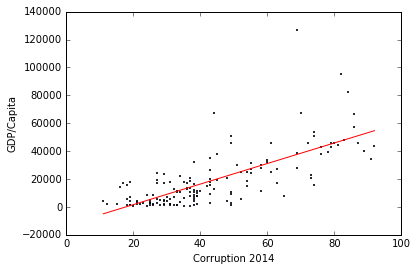

In [353]:
ax = data.plot.scatter(x='Corruption 2014', y='GDP/Capita', s=1)
ax.plot(corruption_2014_list, [x*result.slope+result.intercept for x in corruption_2014_list], 'r')

In [356]:
data.to_csv('corruption_clean_data.csv')

# Conclusions

* Brazil corruption level is average.

* Corruption explains:

In [363]:
"%.2f" % ((result.rvalue**2)*100) + "%"

'53.11%'

* Of the variability in the GDP according to this linear model and the given data